# Compute matrix profiles

## Introduction to matrix profiles
The matrix profile is a rather simple method to detect motifs and anomalies in time series data. 

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import os
import matrixprofile as mp
import glob as glob
import matplotlib.gridspec as gridspec

%matplotlib notebook



In [2]:
"""Functions from B_series_functions"""

"""Create a time array from B series indexes"""
def time_array(start,end):
    time_s = np.linspace(0,end-start,end-start)/100#convert to seconds
    return time_s

"""find index of time in video of a given drifter deployment"""
def index_finder(cp_times,time_s,start_n):
    length = len(cp_times)
    indexes = np.zeros(length)
    for i in range(length):#find indexes in time_s of the features
        indexes[i] = (next(j for j, _ in enumerate(time_s) if np.isclose(_, cp_times[i], 0.01)))    
    indexes = indexes.astype(int) + start_n
    return indexes

def read_B_series_subfolders(path):
    # create a list of file and sub directories 
    # names in the given directory 
    subfolders = os.listdir(path)
    file_list = []

    # Iterate over all the entries
    for names in subfolders:
        # Create full path
        fullPath = os.path.join(path, names)
        # If entry is a directory then get the list of files in this directory 
        temp_path = fullPath#for glob
        if os.path.isdir(fullPath):
            file_list = file_list + read_B_series_subfolders(fullPath)   
        else:
            txt_files = glob.glob(path + "/*.csv")#only read txt files
            if (txt_files != []):
                file_list.append(txt_files)
    return file_list

# Load data for mp

In [3]:
""""""
####################
#Cross section A14
####################
A14_path = "/Users/georgecowie/Documents/Master/Masteroppgave/data/2020/processed_drifter_data/A14"
A14B13 = pd.read_csv(A14_path+"/B13.csv",names = ["time s/100","pressure"],header = 0)
A14B17 = pd.read_csv(A14_path+"/B17.csv",names = ["time s/100","pressure"],header = 0)
A14B56 = pd.read_csv(A14_path+"/B56.csv",names = ["time s/100","pressure"],header = 0)
A14B78 = pd.read_csv(A14_path+"/B78.csv",names = ["time s/100","pressure"],header = 0)
A14B82 = pd.read_csv(A14_path+"/B82.csv",names = ["time s/100","pressure"],header = 0)
A14B84 = pd.read_csv(A14_path+"/B84.csv",names = ["time s/100","pressure"],header = 0)
A14B85 = pd.read_csv(A14_path+"/B85.csv",names = ["time s/100","pressure"],header = 0)

#cut out when drifter lying still
A14B13 = A14B13.iloc[6000:18050]
A14B17 = A14B17.iloc[10350:23800]
A14B56 = A14B56.iloc[12500:26500]
A14B78 = A14B78.iloc[20250:33500]
A14B82 = A14B82.iloc[23000:36500]
A14B84 = A14B84.iloc[26400:-1]
A14B85 = A14B85.iloc[26600:40200]
#A14B85['pressure'].plot(figsize = (10,7))

#load exel sheet of drifter observations
B56_A14_excel_sheet_path = "/Users/georgecowie/Documents/Master/Masteroppgave/data/drifter_videos/2020/Video_features_A14_B56_reanalysed.xlsx"
B56_A14_SS = pd.read_excel(B56_A14_excel_sheet_path,header = 8)
B56_A14_SS["Middle_t"] = B56_A14_SS["Stop_corr"]-(B56_A14_SS["Stop_corr"]-B56_A14_SS["Start_corr"])/2
A14steps = B56_A14_SS[B56_A14_SS["Feature id"] == 1].reset_index(drop=True)
A14other = B56_A14_SS[B56_A14_SS["Feature id"] == 2].reset_index(drop=True)
time_A14 = time_array(12500,26500)
A14_HF_idx = index_finder(B56_A14_SS["Middle_t"],time_A14,12500)-12500
steps_idx = index_finder(A14steps["Middle_t"],time_A14,12500)-12500
#A14_HF_stop_idx = index_finder(B56_A14_HF_stop,time_A14,start)-start


####################
#Cross section A13
#B14 file is messed up so we dont have the drifter features because this was the deployment filmed
####################
A13_path = "/Users/georgecowie/Documents/Master/Masteroppgave/data/2020/processed_drifter_data/A13"
A13B14 = pd.read_csv(A13_path+"/B14.csv",names = ["time s/100","pressure"],header = 0)
A13B33 = pd.read_csv(A13_path+"/B33.csv",names = ["time s/100","pressure"],header = 0)
A13B55 = pd.read_csv(A13_path+"/B55.csv",names = ["time s/100","pressure"],header = 0)
A13B65 = pd.read_csv(A13_path+"/B65.csv",names = ["time s/100","pressure"],header = 0)
A13B74 = pd.read_csv(A13_path+"/B74.csv",names = ["time s/100","pressure"],header = 0)
A13B75 = pd.read_csv(A13_path+"/B75.csv",names = ["time s/100","pressure"],header = 0)
A13B79 = pd.read_csv(A13_path+"/B79.csv",names = ["time s/100","pressure"],header = 0)
A13B80 = pd.read_csv(A13_path+"/B80.csv",names = ["time s/100","pressure"],header = 0)
A13B86 = pd.read_csv(A13_path+"/B86.csv",names = ["time s/100","pressure"],header = 0)


####################
#Cross section A8

####################
A8_path = "/Users/georgecowie/Documents/Master/Masteroppgave/data/2020/processed_drifter_data/A8"
A8B10 = pd.read_csv(A8_path+"/B10.csv",names = ["time s/100","pressure"],header = 0)
A8B13 = pd.read_csv(A8_path+"/B13.csv",names = ["time s/100","pressure"],header = 0)
A8B33 = pd.read_csv(A8_path+"/B33.csv",names = ["time s/100","pressure"],header = 0)
A8B55 = pd.read_csv(A8_path+"/B55.csv",names = ["time s/100","pressure"],header = 0)
A8B65 = pd.read_csv(A8_path+"/B65.csv",names = ["time s/100","pressure"],header = 0)
A8B74 = pd.read_csv(A8_path+"/B74.csv",names = ["time s/100","pressure"],header = 0)
A8B75 = pd.read_csv(A8_path+"/B75.csv",names = ["time s/100","pressure"],header = 0)
A8B80 = pd.read_csv(A8_path+"/B80.csv",names = ["time s/100","pressure"],header = 0)
A8B84 = pd.read_csv(A8_path+"/B84.csv",names = ["time s/100","pressure"],header = 0)
A8B85 = pd.read_csv(A8_path+"/B85.csv",names = ["time s/100","pressure"],header = 0)
A8B86 = pd.read_csv(A8_path+"/B86.csv",names = ["time s/100","pressure"],header = 0)

x = A8B13["pressure"].values
A8B80 = A8B80.iloc[15795:19699]
A8B10 = A8B10.iloc[5704:10144]
A8B13 = A8B13.iloc[6600:10428]
A8B33 = A8B33.iloc[8207:12000]
A8B55 = A8B55.iloc[10123:13754]
A8B65 = A8B65.iloc[10988:14720]#This sensor might be faulty
A8B74 = A8B74.iloc[11687:15677]
A8B75 = A8B75.iloc[14682:19004]
A8B84 = A8B84.iloc[18480:22787]
A8B85 = A8B85.iloc[19545:23467]
A8B86 = A8B86.iloc[20255:24166]

#load exel sheet of drifter observations
B80_A8_excel_sheet_path = "/Users/georgecowie/Documents/Master/Masteroppgave/data/drifter_videos/2020/Video_features_A8_B80.xlsx"
B80_A8_SS = pd.read_excel(B80_A8_excel_sheet_path,header = 3)
A8_steps = B80_A8_SS[B80_A8_SS["Feature id"] == 1].reset_index(drop=True)
A8_start = 15784
A8_end = 19699
time_A8 = time_array(A8_start,A8_end)
A8_HF_idx = index_finder(B80_A8_SS["Deployment_time"],time_A8,A8_start)-A8_start
A8_steps_idx = index_finder(A8_steps["Deployment_time"],time_A8,A8_start)-A8_start


#load exel sheet of drifter observations
B13_A8_excel_sheet_path = "/Users/georgecowie/Documents/Master/Masteroppgave/data/drifter_videos/2020/Video_features_A8_B13.xlsx"
B13_A8_SS = pd.read_excel(B13_A8_excel_sheet_path,header = 3)
B13_A8_steps = B13_A8_SS[B13_A8_SS["Feature id"] == 1].reset_index(drop=True)


B13_A8_start = 6600#
B13_A8_end = 11500#

time_B13_A8 = time_array(B13_A8_start,B13_A8_end)

B13_A8_HF_idx = index_finder(B13_A8_SS["Deployment_time"],time_B13_A8,B13_A8_start)-B13_A8_start
B13_A8_steps_idx = index_finder(B13_A8_steps["Deployment_time"],time_B13_A8,B13_A8_start)-B13_A8_start

<IPython.core.display.Javascript object>


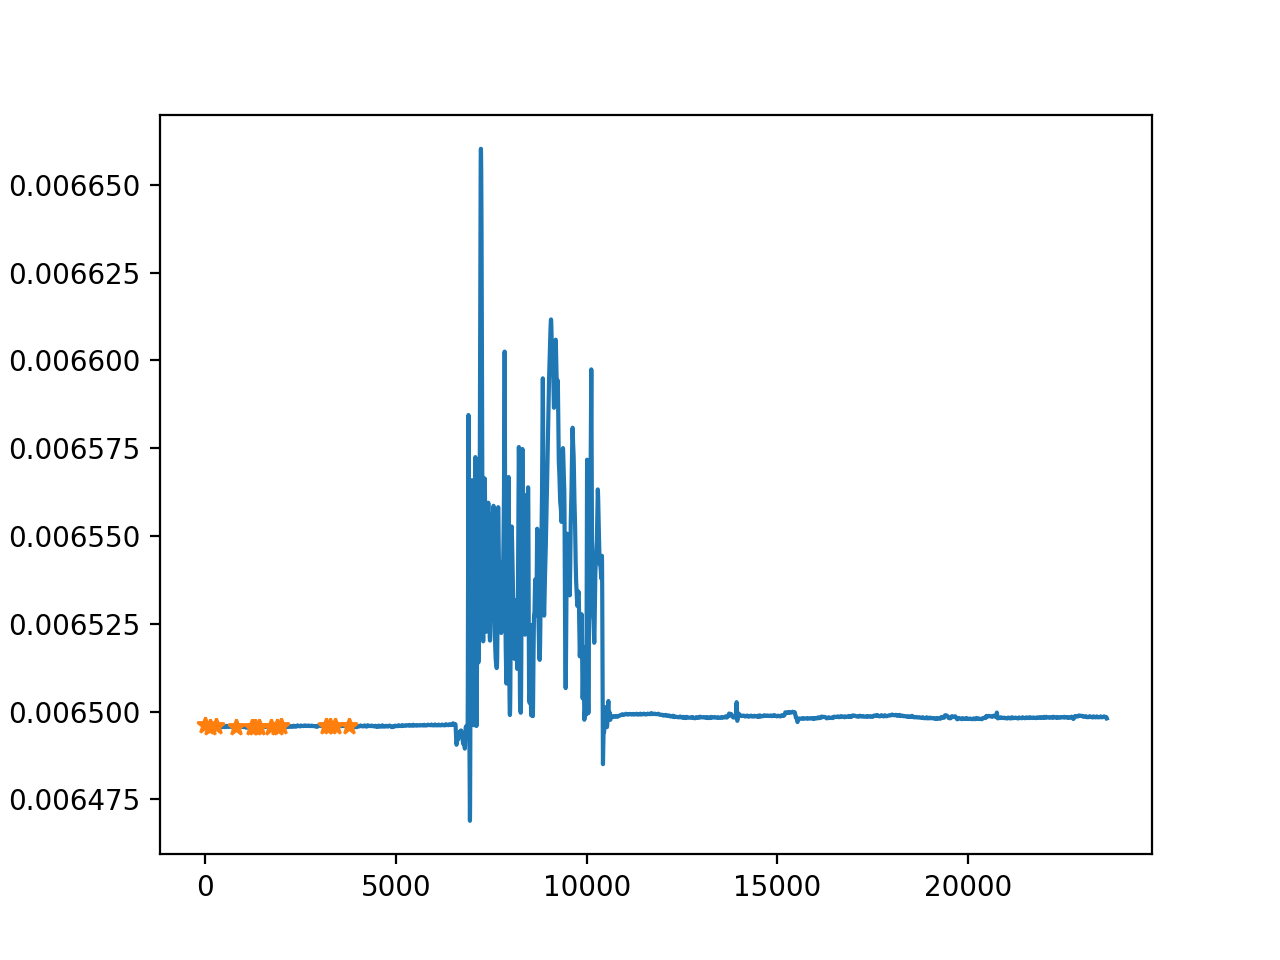

In [4]:
plt.plot(x)
plt.plot(B13_A8_HF_idx,x[B13_A8_HF_idx],marker = "*",ls = "None")
plt.show()



In [5]:



def mp_analysis(full_path):
    compute_motifs = "off"
    analyze = "on"
    
    df = pd.read_csv(full_path,names = ["time s/100","pressure"],header = 0)
    df = df.iloc[12500:26500]
    #df['pressure'].plot(figsize = (20,7))
    #plt.show()
    
    if compute_motifs == "on":


        windows = [
        ('1 sec', 100)]

        profiles = {}

        for label, window_size in windows:
            profile = mp.compute(df['pressure'].values, window_size)
            key = '{} Profile'.format(label)
            profiles[key] = profile
            motifs, neighbours = mp.discover.motifs(profile,k = 20)

            #snip = mp.discover.snippets(df['pressure'].values,10,3)

        #Plot the signal data
        fig, axes = plt.subplots(1,1,sharex=True,figsize=(15,10))

        for ax_idx, window in enumerate(windows):
            key = '{} Profile'.format(window[0])
            profile = profiles[key]
            axes[ax_idx].plot(profile['mp'])
            #axes[ax_idx].plot(snip['snippet'])
            axes[ax_idx].set_title(key)

        plt.xlabel('Pickup Datetime')
        plt.tight_layout()
        plt.show()
    
    if analyze == "on":
        profile, figures = mp.analyze(df['pressure'].values)
        return profile, figures
    

#profile, figures = mp_analysis(A14_path+"/B56.csv")







# Compute distance between two time series

In [6]:
window = 200
profile_B13 = mp.compute(A14B13['pressure'].values, windows=window)
profile_B17 = mp.compute(A14B17['pressure'].values, windows=window)
profile_B56 = mp.compute(A14B56['pressure'].values, windows=window)
profile_B78 = mp.compute(A14B78['pressure'].values, windows=window)
profile_B82 = mp.compute(A14B82['pressure'].values, windows=window)
profile_B85 = mp.compute(A14B85['pressure'].values, windows=window)


<IPython.core.display.Javascript object>


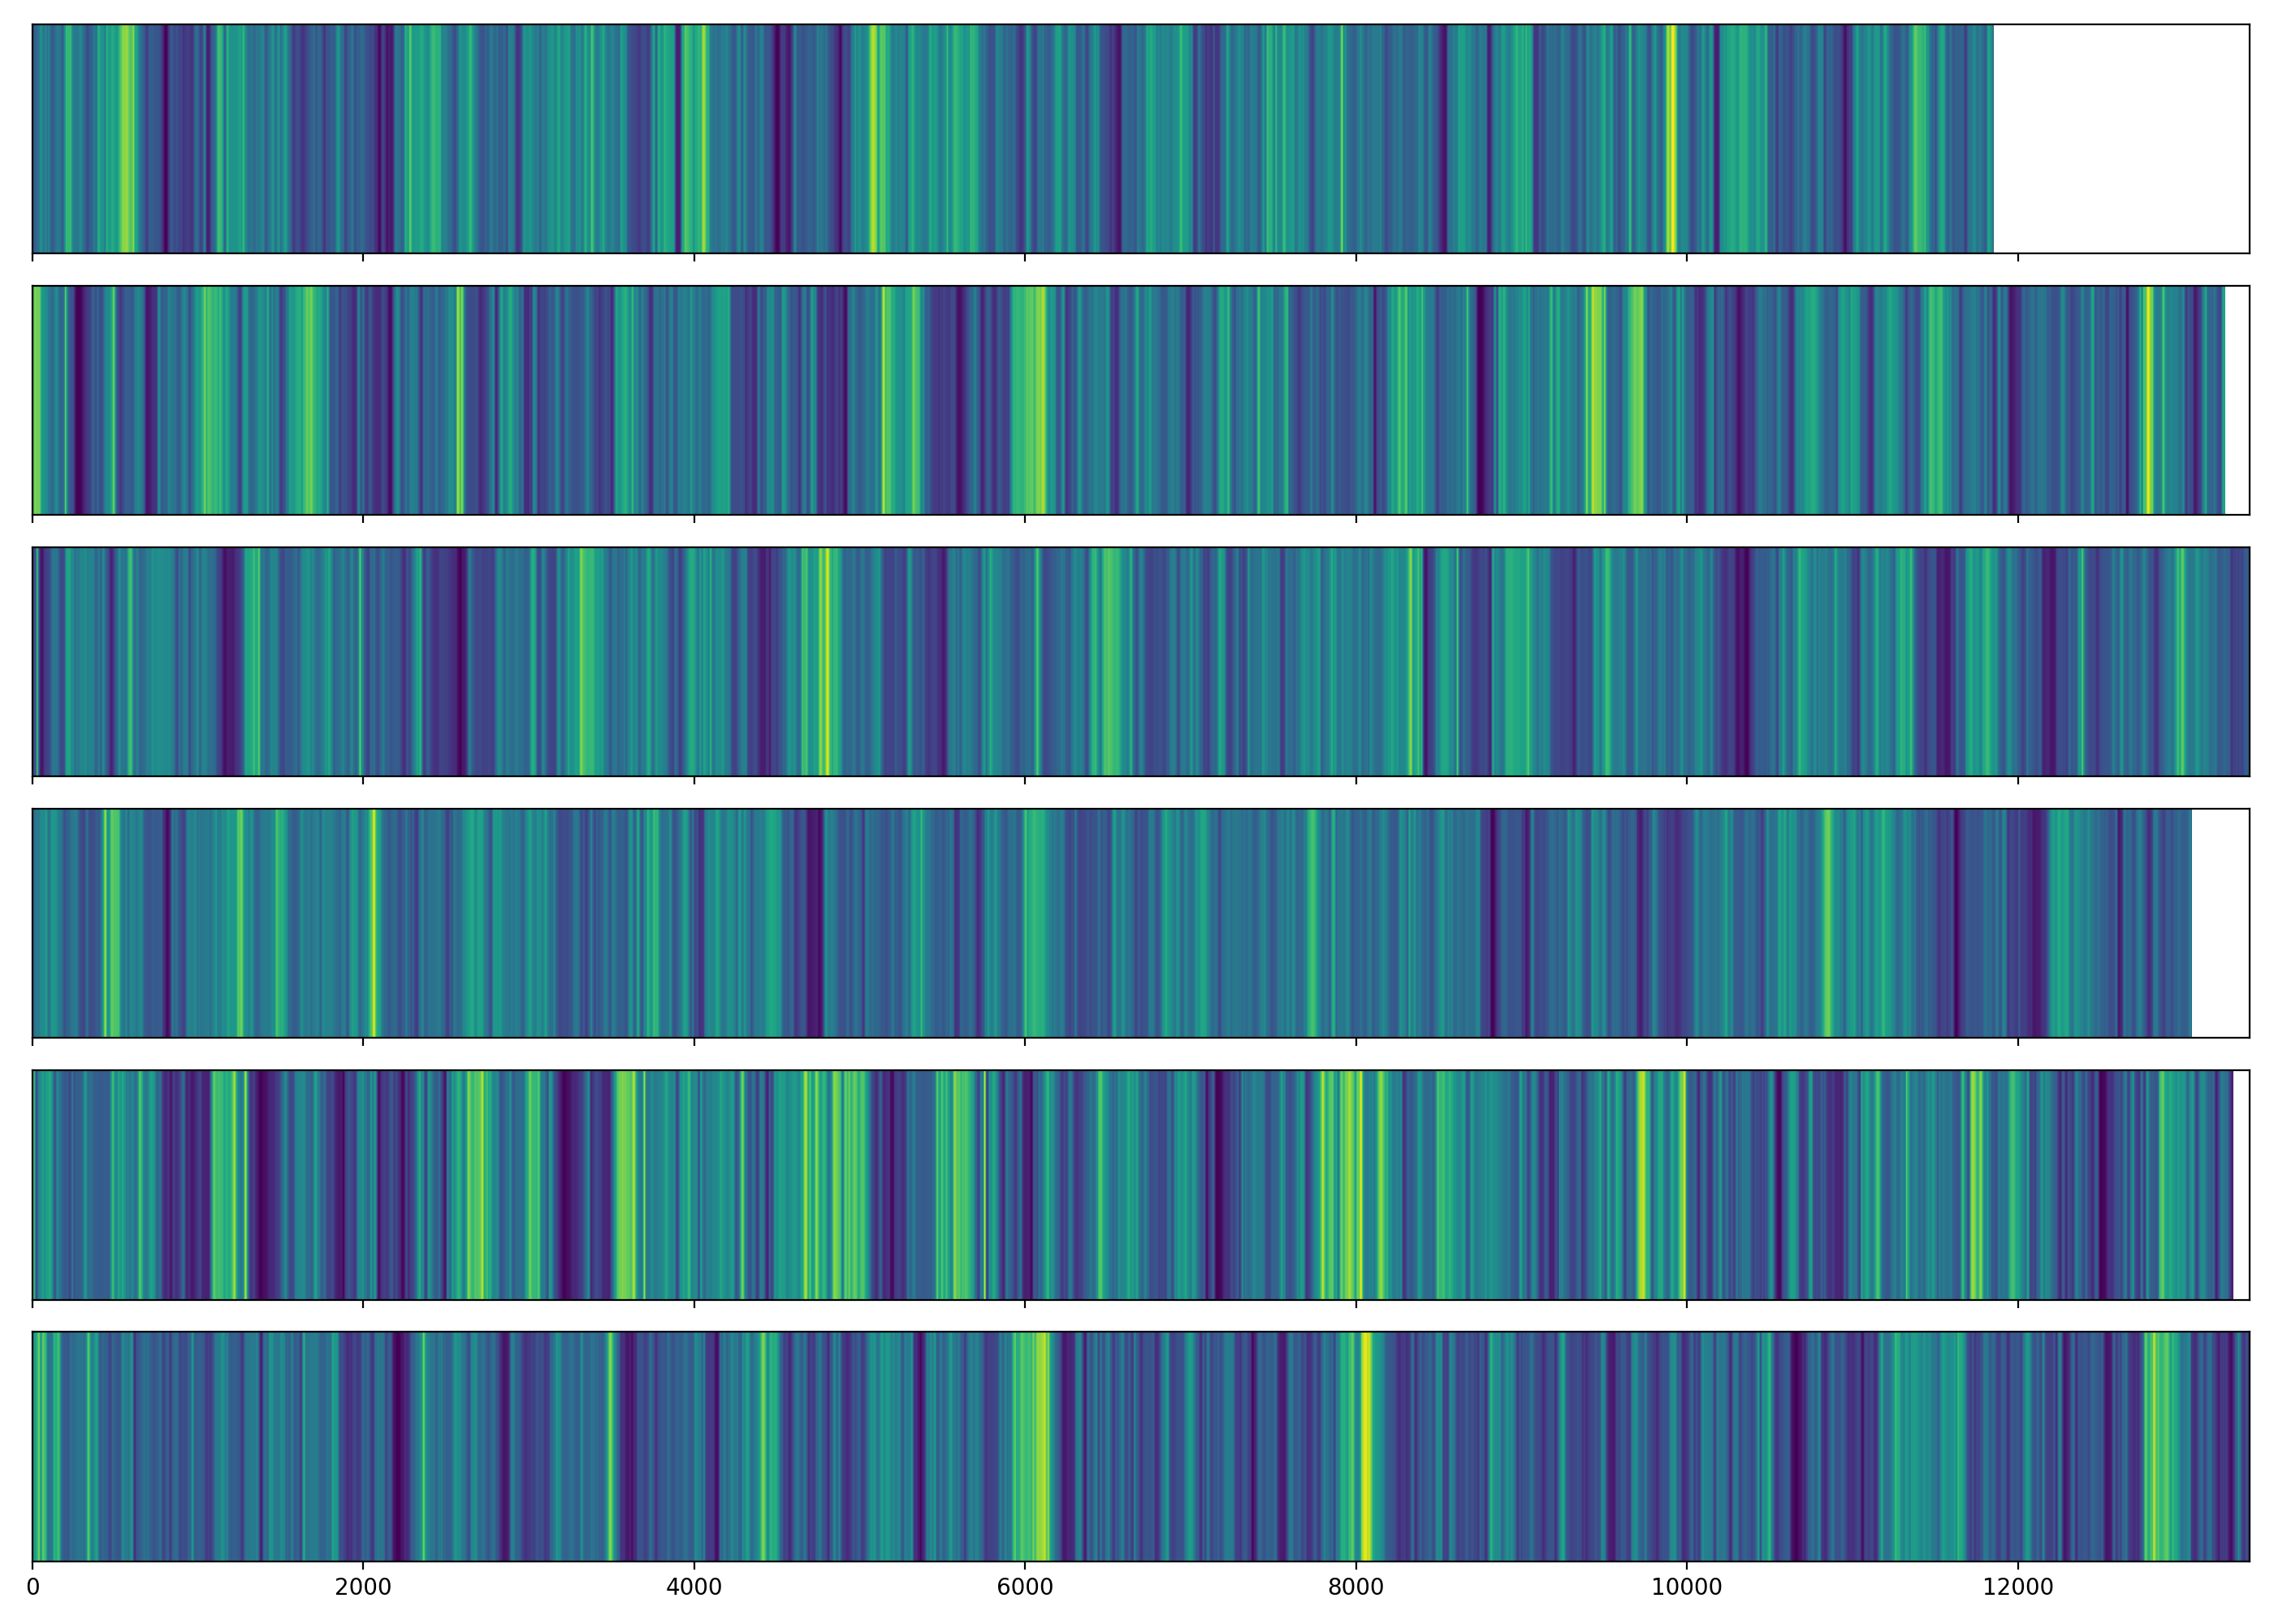

In [7]:
#mp.visualize(profile_B56)
#mp.visualize(profile_B17)
#plt.imshow(profile_B17["mp"])


def heatmap(x):
    #fig, (ax,ax2) = plt.subplots(nrows=2, sharex=True,figsize=(13, 6))
    fig, ax = plt.subplots(nrows=1, sharex=True,figsize=(14, 3))

    extent = [0, len(x),0,0.5]
    ax.imshow(x[np.newaxis,:], aspect="auto", extent=extent)
    ax.set_yticks([])
    ax.set_xlim(0, len(x))

    #ax2.plot(x)

    plt.tight_layout()
    plt.show()

def multi_heatmap(deployments):
    #plot multiple heatmaps in subplots
    #fig, (ax,ax2) = plt.subplots(nrows=2, sharex=True,figsize=(13, 6))
    fig, ax = plt.subplots(nrows=len(deployments), sharex=True,figsize=(14, 10))
    
    for i in range(len(deployments)):
        x = deployments[i]
        extent = [0, len(x),0,0.5]
        ax[i].imshow(x[np.newaxis,:], aspect="auto", extent=extent)
        ax[i].set_yticks([])
        ax[i].set_xlim(0, len(x))



    plt.tight_layout()
    plt.show()
    

#heatmap(profile_B17["mp"],A14B17["time s/100"])
#heatmap(profile_B56["mp"],A14B56["time s/100"])

deployments = [profile_B13["mp"],profile_B17["mp"],profile_B56["mp"],profile_B78["mp"],profile_B82["mp"],profile_B85["mp"]]

multi_heatmap(deployments)

# Query search
Look for features by passing snippets of the data

In [8]:
def plot_query(x,y,q_start,q_stop,features = 0):
    #x: matrix profile
    #y: data
    #q_stsrt/stop query satart stop
    
    for i in range(len(x)):
        if x[i]>5:
            x[i] = 15
    
    
    y = np.array(y)
    y_q = y[q_start:q_stop]
    fig, (ax,ax1,ax2) = plt.subplots(nrows=3, sharex=True,figsize=(9, 6))
    
    ax.plot(y,c="b")
    ax.plot(np.linspace(q_start,q_stop,len(y_q)),y_q,c="r",label = "Query")
    ax.plot(features,y[features],marker = "*",c="y",ls = "None")
    ax.set_ylabel("Pressure normalized")
    
    extent = [0, len(x),0,0.5]
    ax1.imshow(x[np.newaxis,:], aspect="auto", extent=extent)
    ax1.set_yticks([])
    ax1.set_xlim(0, len(x))
    

    ax2.plot(x,c="g")
    ax2.set_ylabel("Matrix profile")

    plt.tight_layout()
    plt.legend()
    plt.show()
    
    
def plot_full_mp(data,mp,features = 0):
    #plot added mps after multiple queries
    y = np.array(data['pressure'])
    x = mp
    
    fig, (ax,ax1,ax2) = plt.subplots(nrows=3, sharex=True,figsize=(9, 6))
    ax.plot(y,c="b")
    ax.plot(features,y[features],marker = "*",c="y",ls = "None")
    ax.set_ylabel("Pressure normalized")
    extent = [0, len(x),0,0.5]
    ax1.imshow(x[np.newaxis,:], aspect="auto", extent=extent)
    ax1.set_yticks([])
    ax1.set_xlim(0, len(x))
    ax2.plot(x,c="g")
    ax2.set_ylabel("Matrix profile")
    plt.tight_layout()
    plt.legend()
    plt.show()
    
    

## Method:
Start by looking at one query, keeping a high threshold and trying to have as few false positives as possible. Keep adding new querys until it finds all steps. 

After spending a lot of time with the data, the "classic" step seems to exibit a rise in pressure as the drifter moves over the crest of the step, then a fall in pressure, followed by another rise. 

In [22]:
def mp_query(data,start,stop,query,threshold = None,features = np.array([0]),data_viz = "off",show_query = "off",var ="pressure"):
    #calculate mp with a given query
    #start stop: query start, stop
    #var: variable to look at
    #threshold: for visualization of the mp, cut out values higher than this
        
    query_profile = mp.compute(data[var].values, windows=(stop-start),query = query)
    y = np.array(data[var])
    
    #y_q = y[start:stop]
    x = query_profile["mp"]
        
    if threshold != None:
        x_i = x #make copy for loop
        for i in range(len(x)):
           #make values binary, either pass of not 
            if x_i[i]>threshold:
                x[i] = 100
            if x_i[i]<threshold:
                x[i] = 0
                
    if data_viz == "on":

        fig, (ax,ax1) = plt.subplots(nrows=2, sharex=True,figsize=(10, 6))

        extent = [0, len(x),0,0.5]
        ax.imshow(x[np.newaxis,:], aspect="auto", extent=extent)
        ax.set_yticks([])
        ax.set_xlim(0, len(x))
        ax.tick_params(bottom = False,labelbottom = False)
        box = ax.get_position()
        ax.set_position([box.x0, box.y0,(box.x1-box.x0), box.y1-0.6])
        
        ax1.plot(y,c="b")
        if show_query == "on":
            ax1.plot(np.linspace(start,stop,len(query)),query,c="r",label = "Query")
        if features.any() != 0:
            ax1.plot(features,y[features],marker = "*",c="y",ls = "None",label="Steps")
        ax1.set_ylabel("Pressure normalized")
        ax1.set_xlabel("Time [s 10^-2]")
        
        box1 = ax1.get_position()
        ax1.set_position([box1.x0, box1.y0,(box1.x1-box1.x0), box1.y1+0.1])

        #ax2.plot(x,c="g")
        #ax2.set_ylabel("Matrix profile")

        #plt.tight_layout()
        plt.legend()
        plt.show()
    return query_profile["mp"]







# Save selected query for thesis results
The drifters show a somewhat typical pattern in the pressure data when moving over a step. The patter is: A pressure increase as the drifter moves towards the crest of a step, a drop in pressure as it drops down the step and finally a pressure increase as it reaches the bottom of the step. However, these signals vary in length, magnitude and between trogh and peak values. Unfortunately other channel features may make a similar pattern, making it difficult do differentiate between steps and other features like meanders. 

Since not all steps have a distinct pattern i attempted to create a synthetic query based on multiple features to see if the mean signal would yeild better results than using a query of a single feature as a query. However, no synthetic signal gave a better result than using a single feature as a query. 

Some discussion: Anylising the videos is very challenging because the angle is not always good, the drifter is not always in frame and the camera is shaking as the filmer is running. A drone flight would be much better.



In A re analysis of deployment A14-B56 16 more steps were identified.
## A14-A1
40 steps identified in video
56 steps in reanalysed video
query
Indices from B56
11861#query start index
11935#query stop index

### B56 A14-A1 18082020
This run yield: 26 positive matches
                16 false positives
                2 matches that are so close to other matches they contain the same feature
                45 total excluding trivial match with self
                

Re analysis:
            31 positive matches
            12 false positives
            1 matches that are so close to other matches they contain the same feature
            

### B13
41 detected steps

#### B17
46 detected steps

### B78
43 detected steps

### B82
42 detected steps

### B84
43 detected steps

### B85
43 detected steps


## A8-A1
13 steps identified in video of B80. One of these steps is very small and may not yet be counted as a step
A8-A1 B80 18082020
This run yielded: 9 positive matches
                  2 false positives
                  1 matches that are so close to other matches they contain the same feature
### B10
Detected steps 10
### B13
Detected steps 9
### B33
Detected steps 8
### B55
Detected steps 11
### B65
Detected steps 12
### B74
Detected steps 8
### B75
Detected steps 12
### B84
Detected steps 16
### B85
Detected steps 14
### B86
Detected steps 6
    


<IPython.core.display.Javascript object>


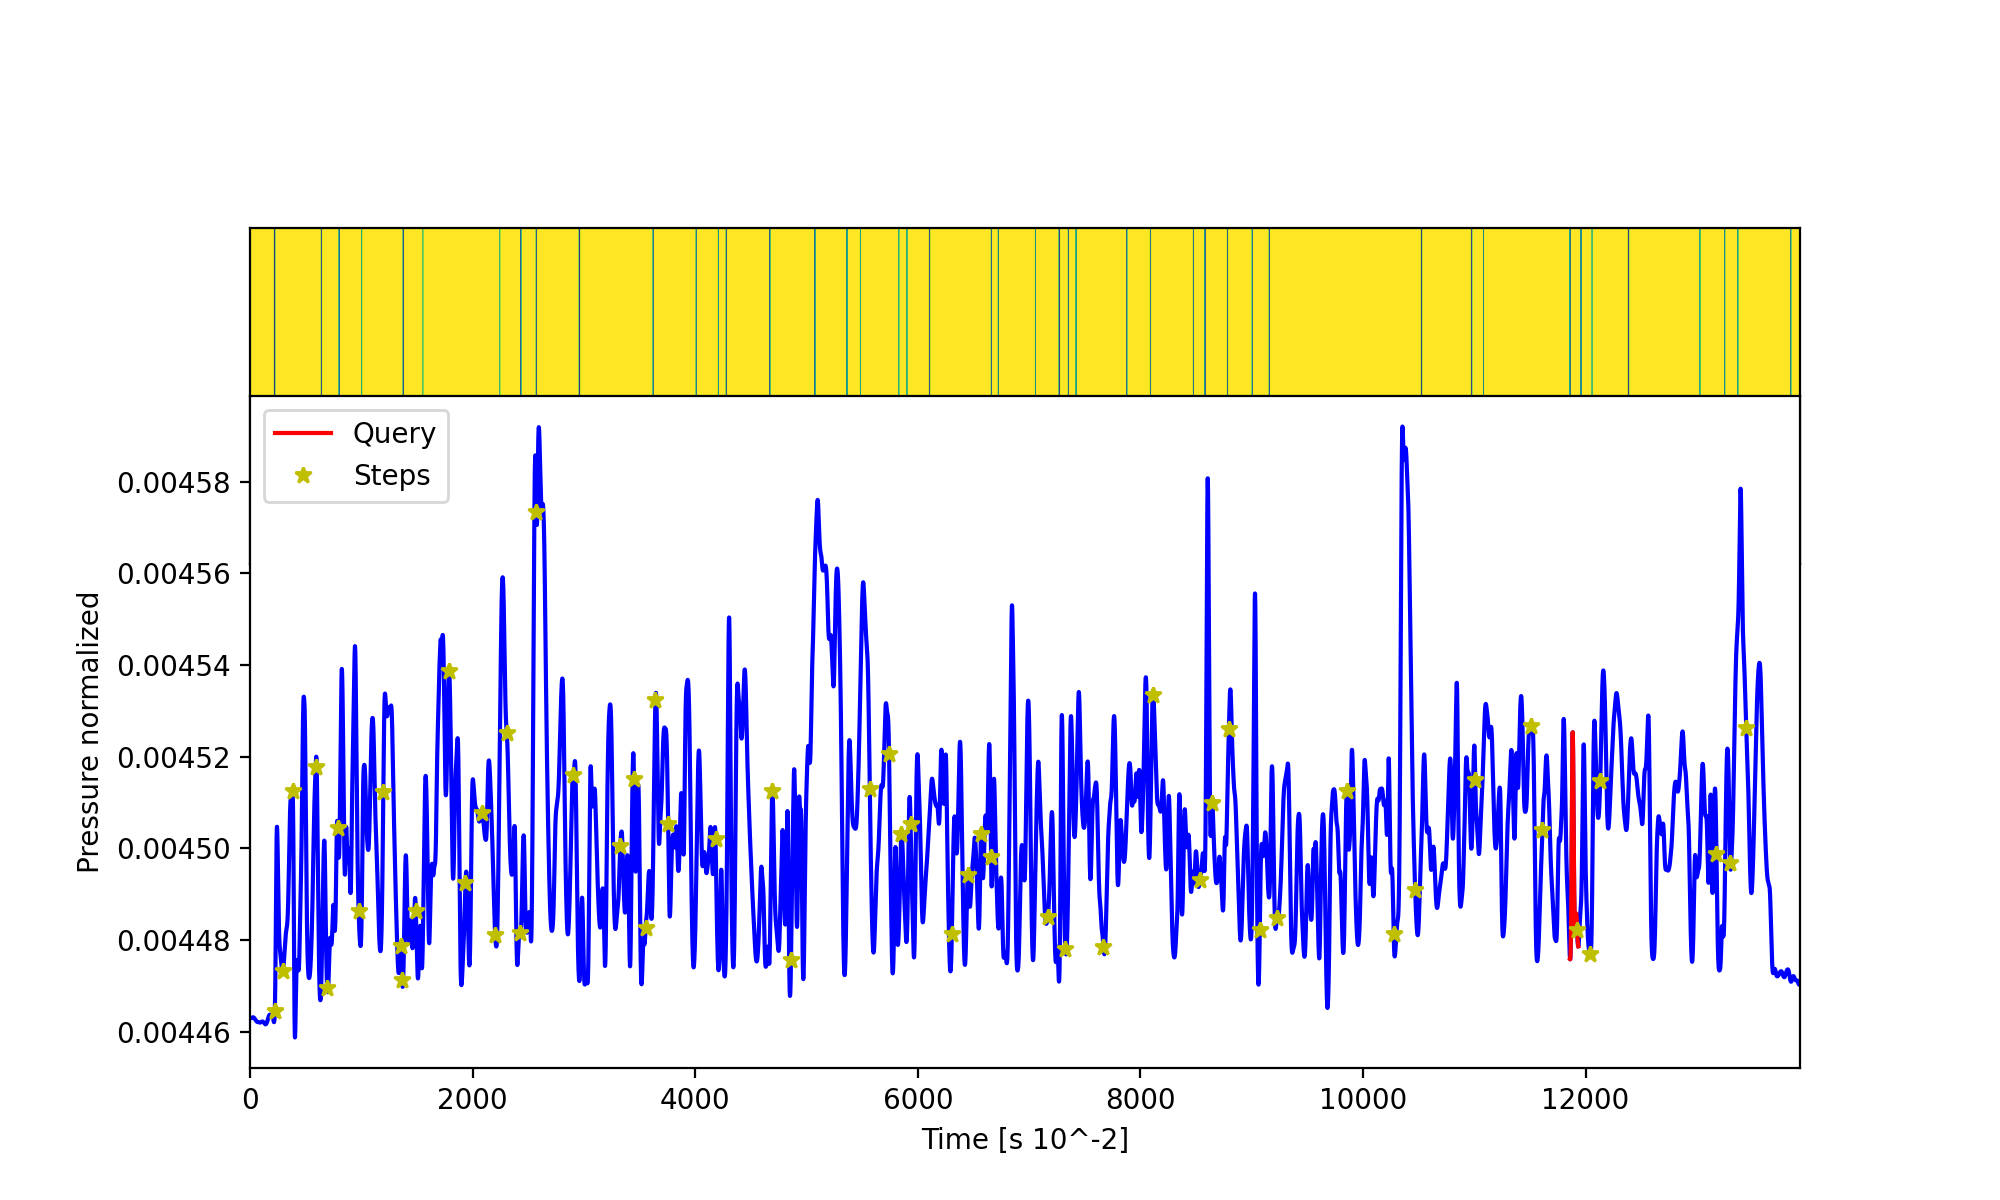

56


In [10]:
B56_start = 11861#query start
B56_stop = 11935#query_stop
query = A14B56['pressure'].values[B56_start:B56_stop]
mp_A14_B56_1 = mp_query(A14B56,B56_start,B56_stop,query,threshold = 5,features=steps_idx,data_viz = "on",show_query = "on")
print(len(steps_idx))


<IPython.core.display.Javascript object>


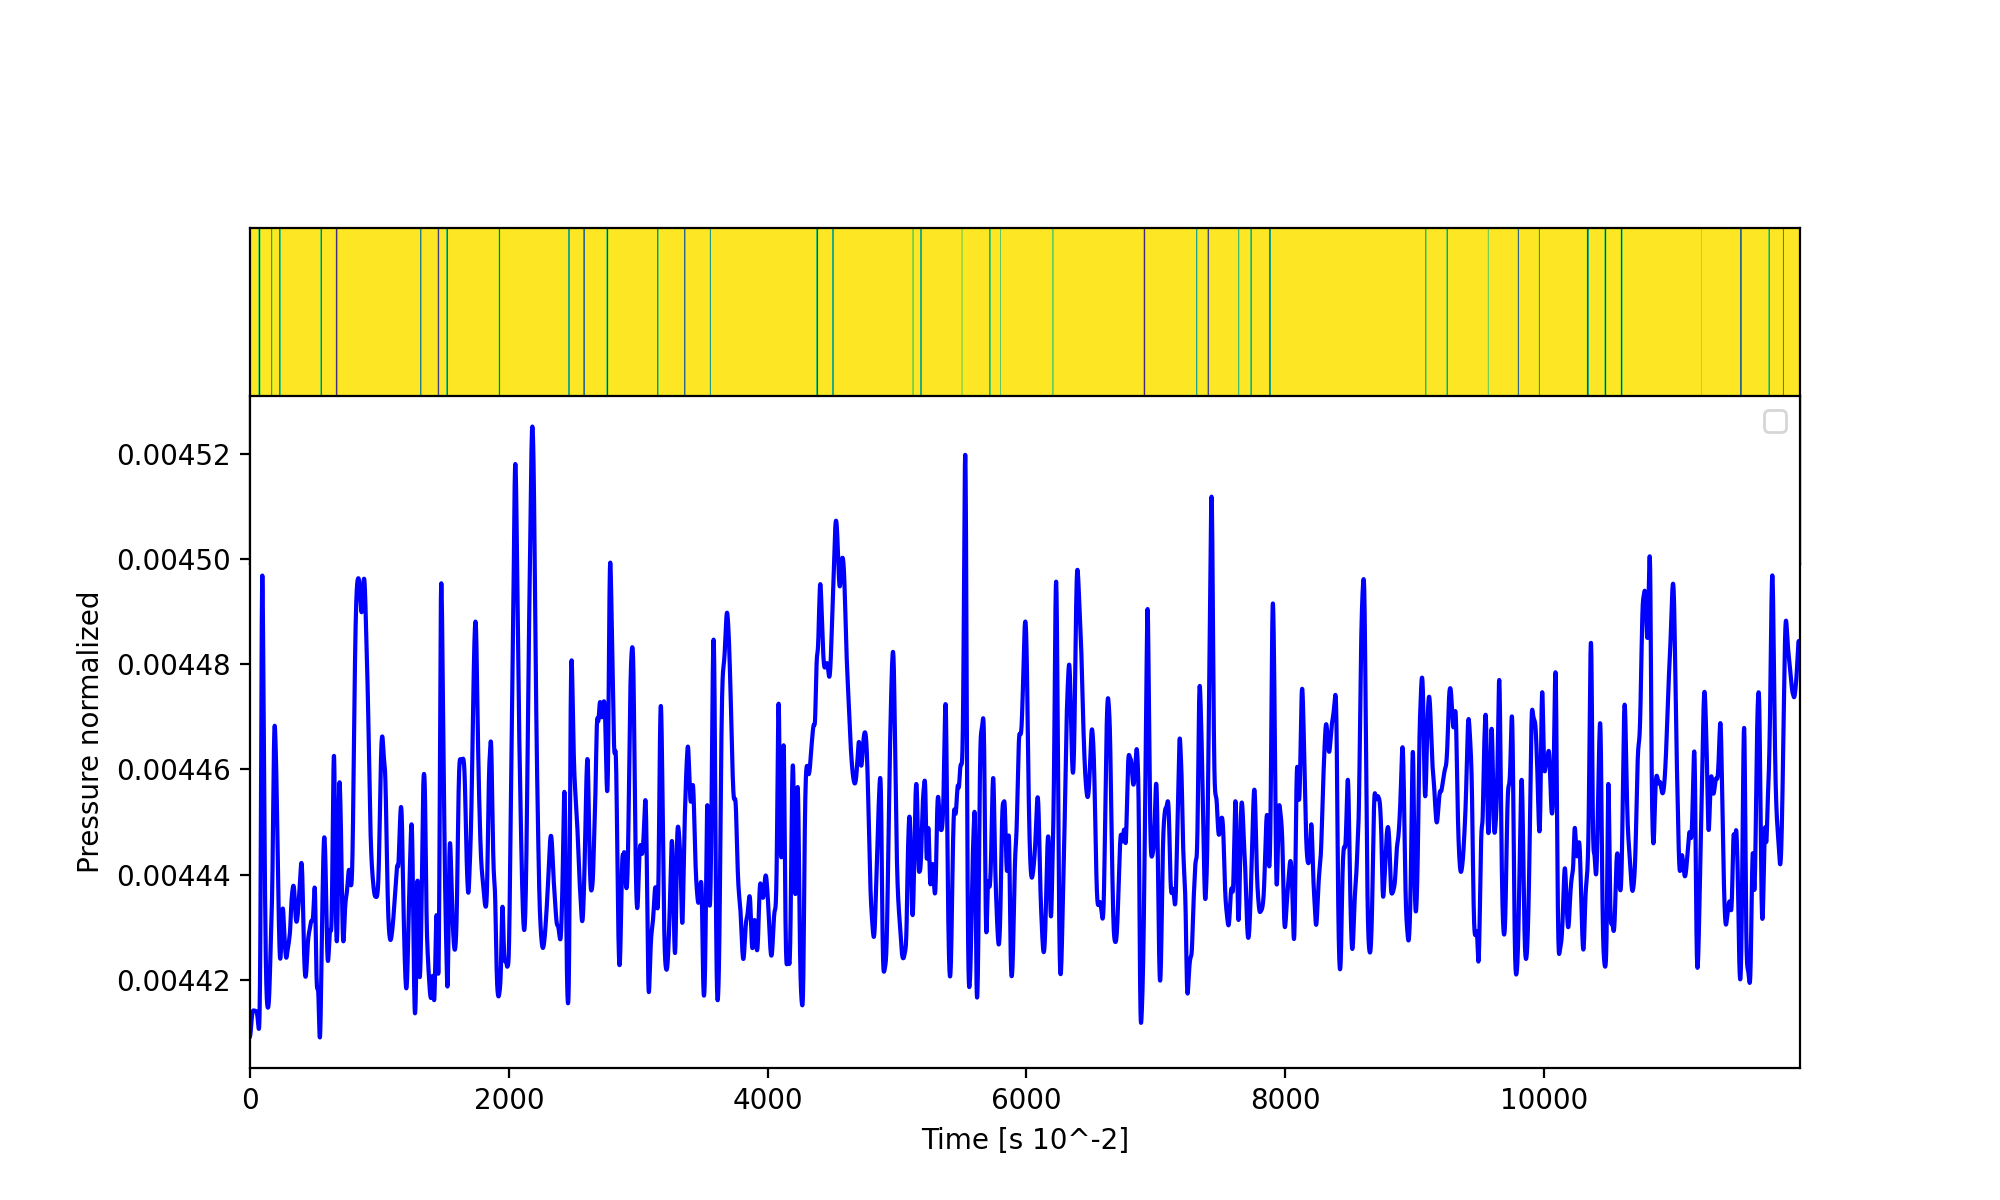

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<IPython.core.display.Javascript object>


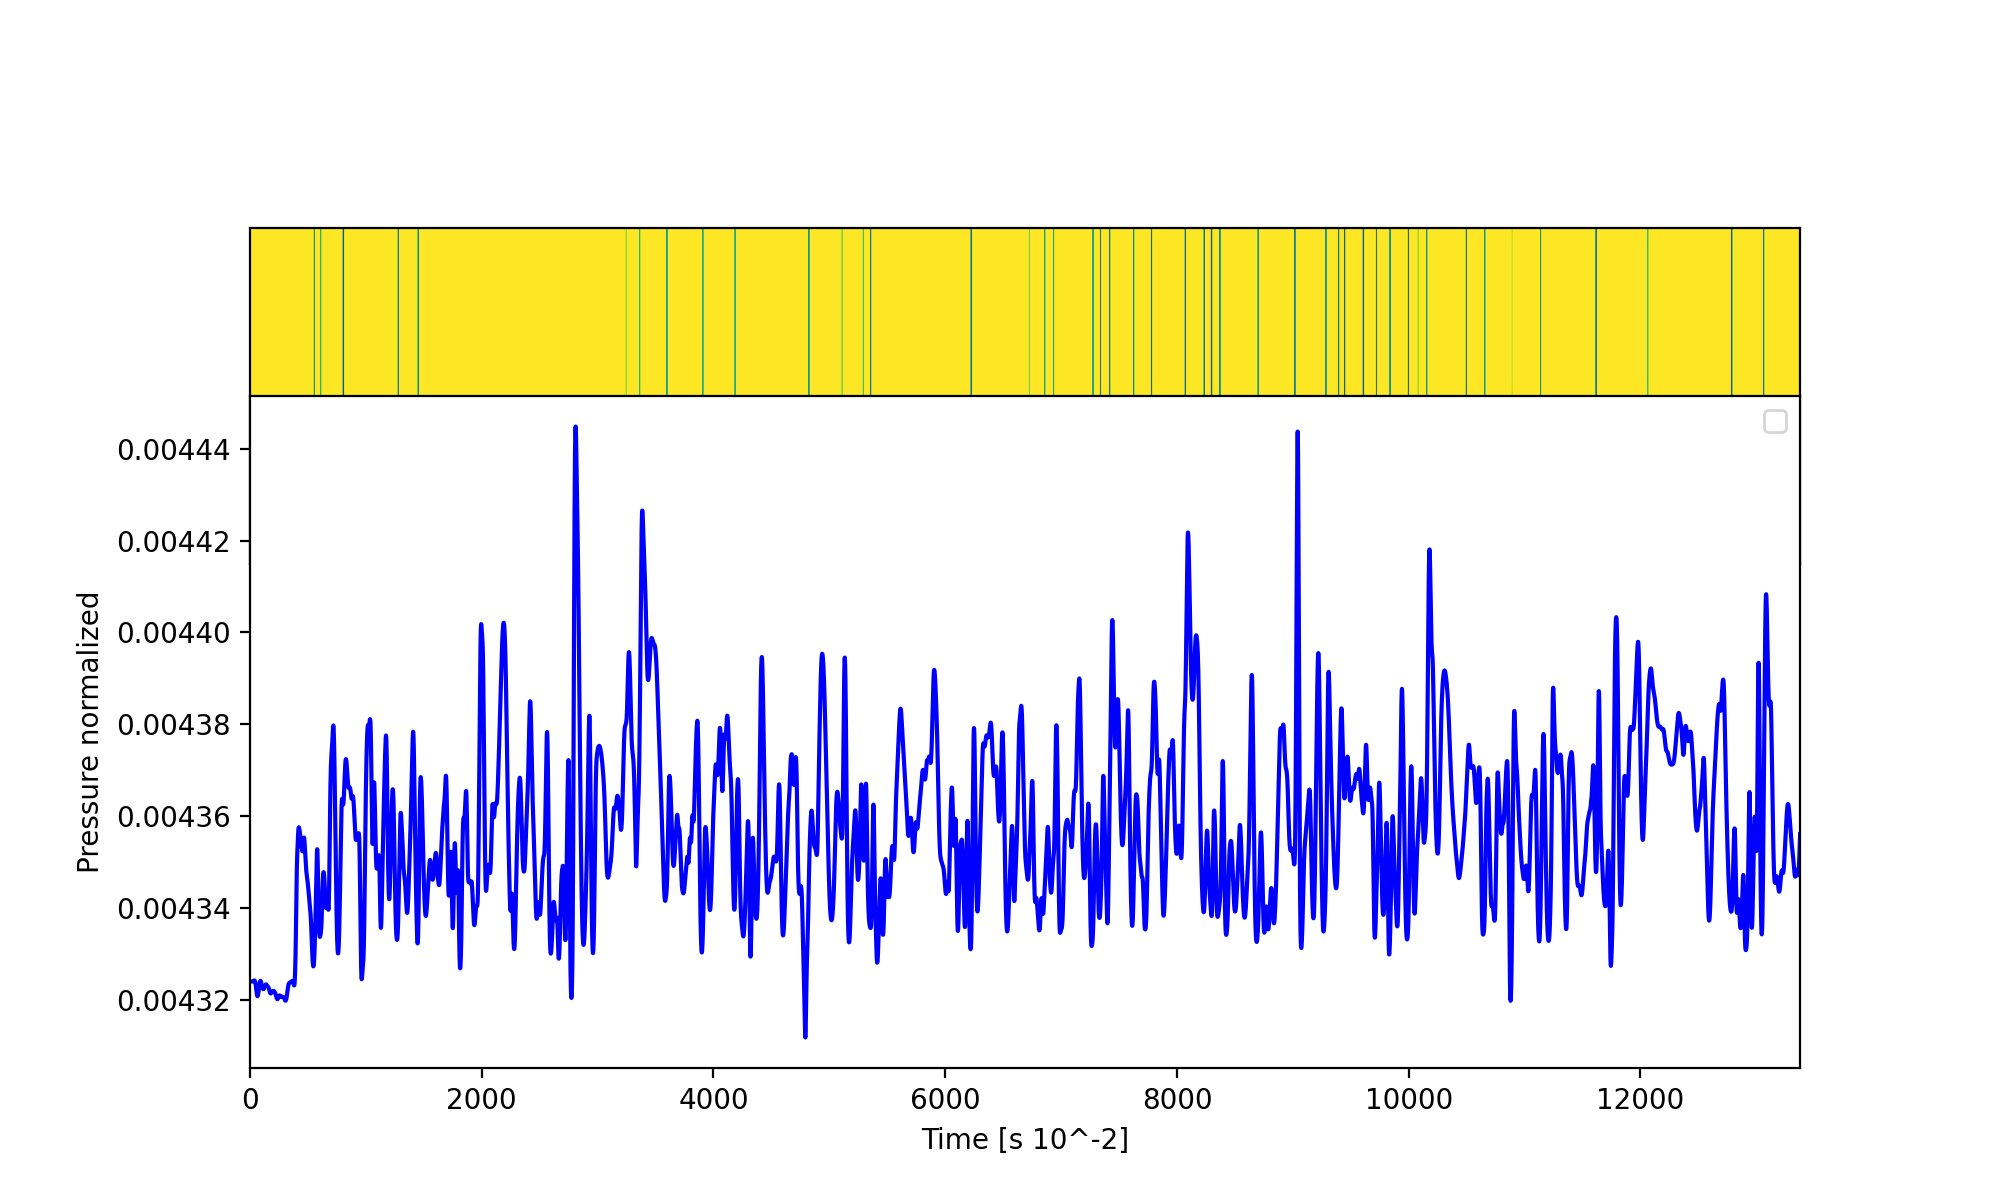

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<IPython.core.display.Javascript object>


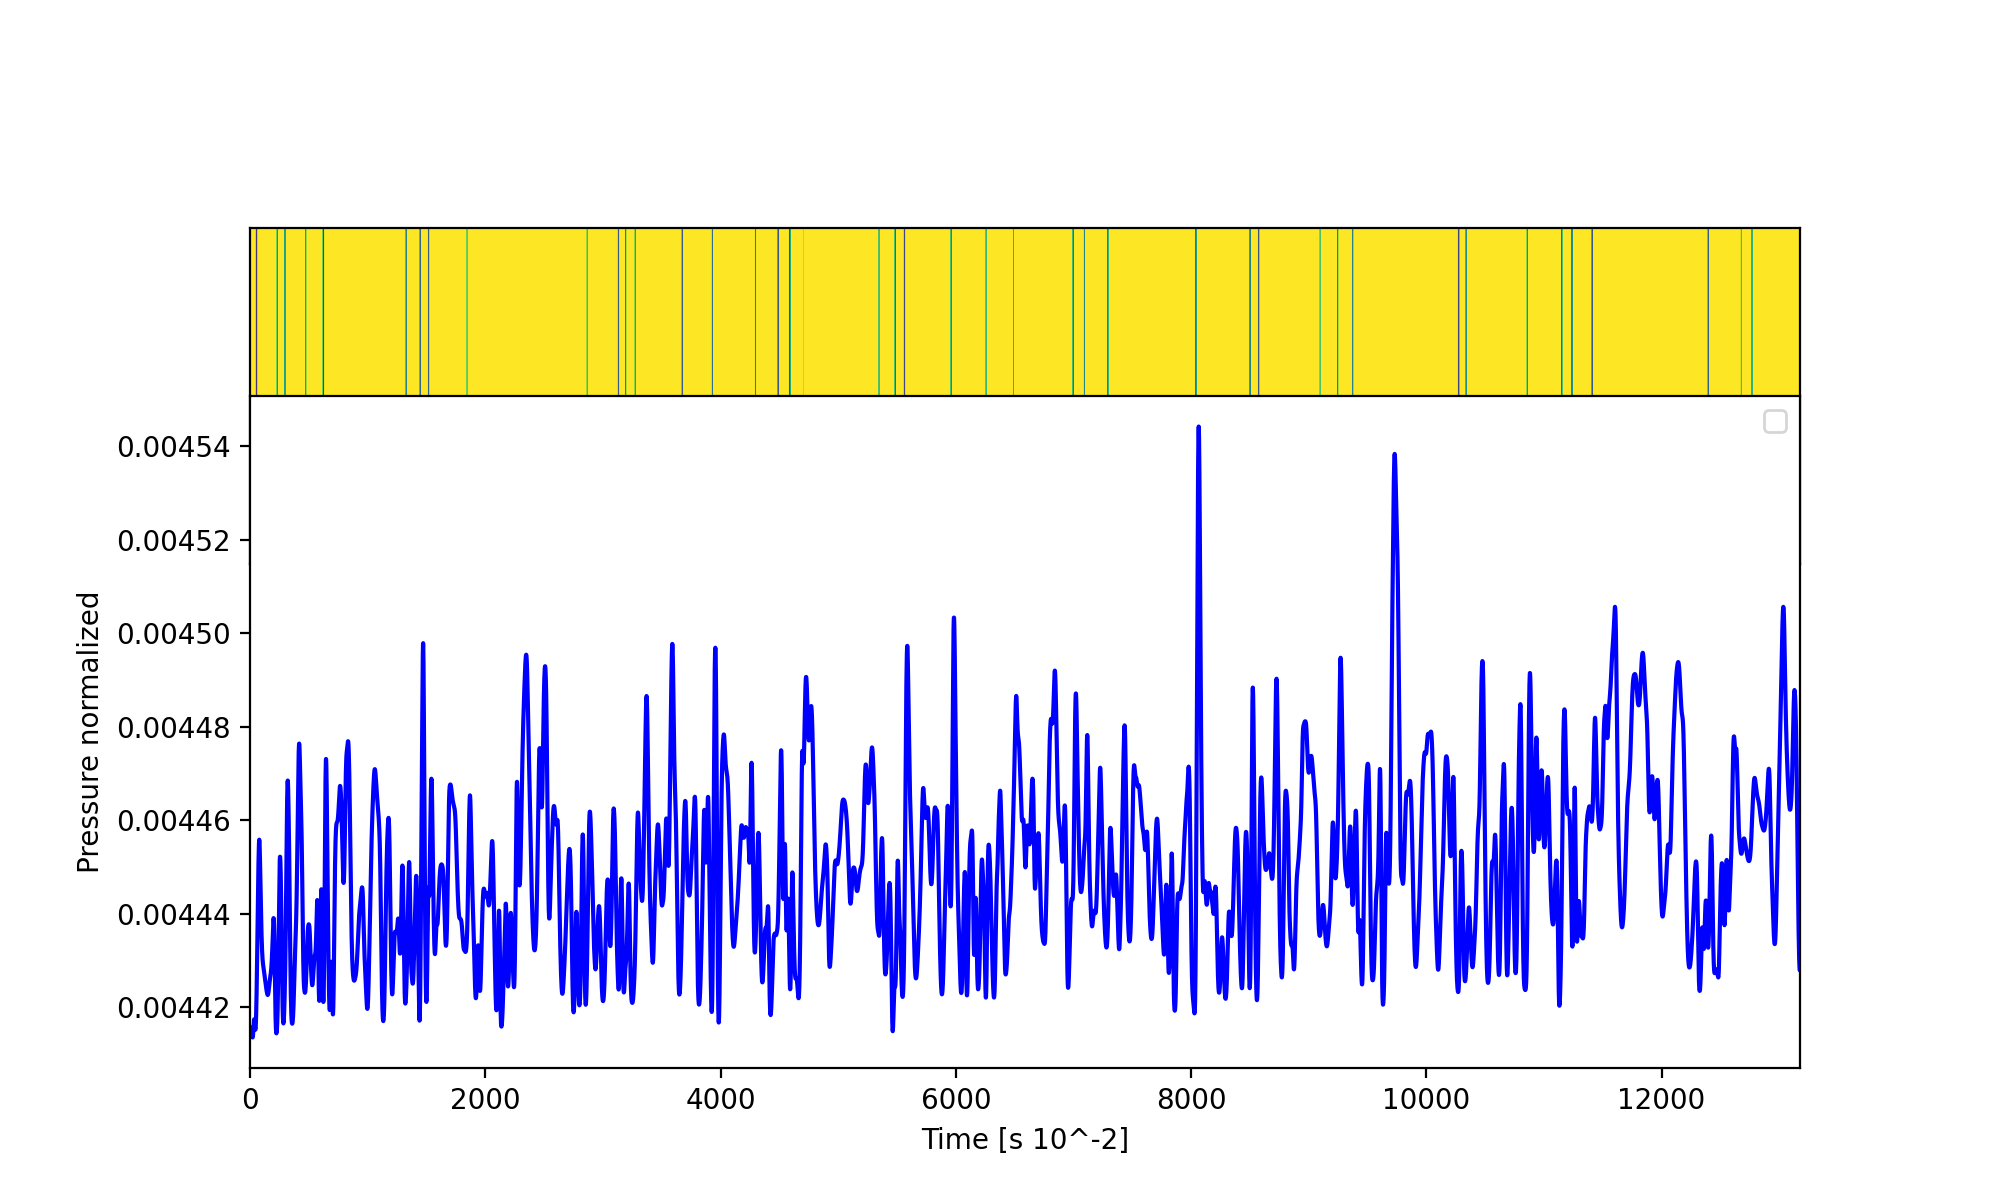

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<IPython.core.display.Javascript object>


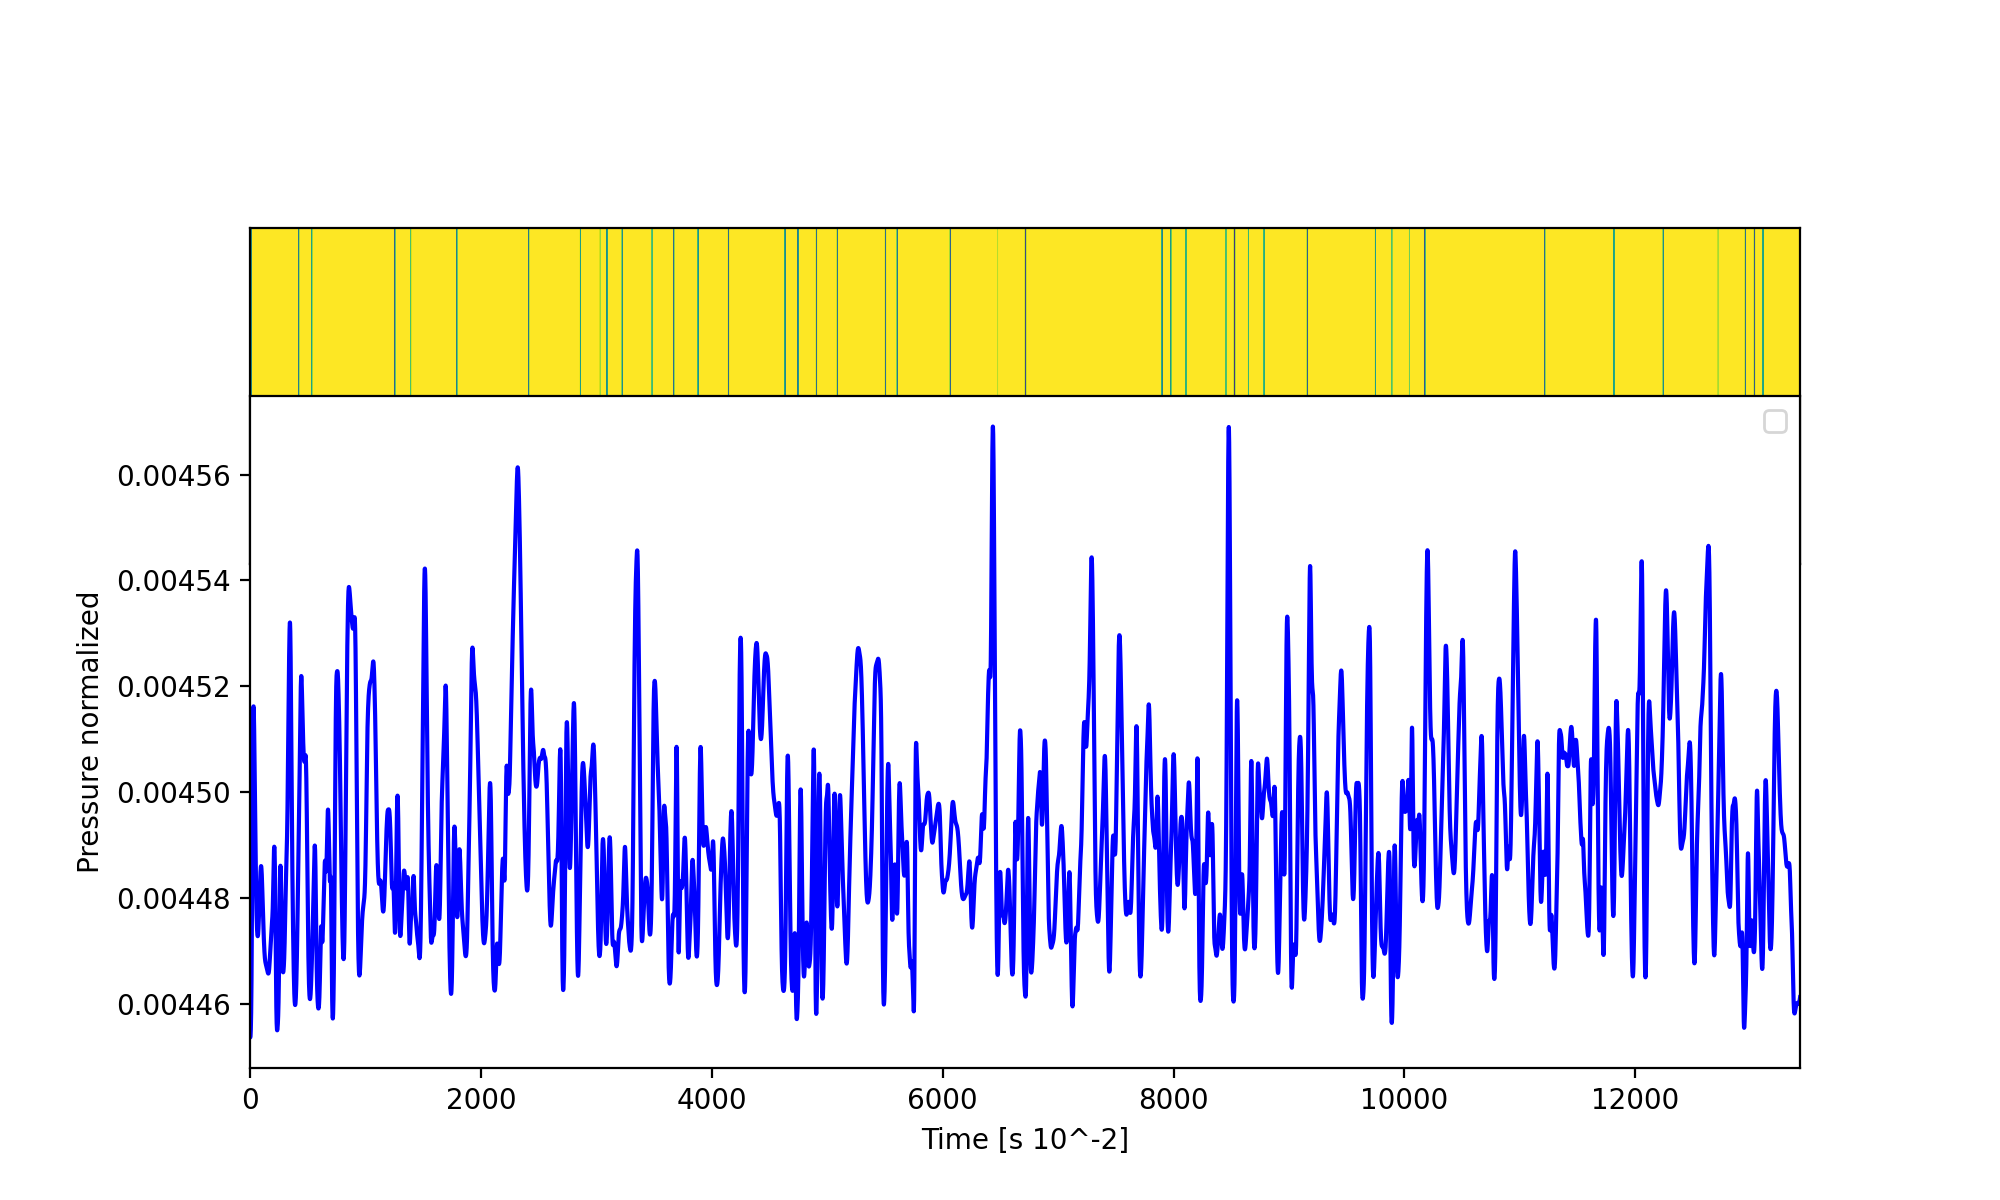

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<IPython.core.display.Javascript object>


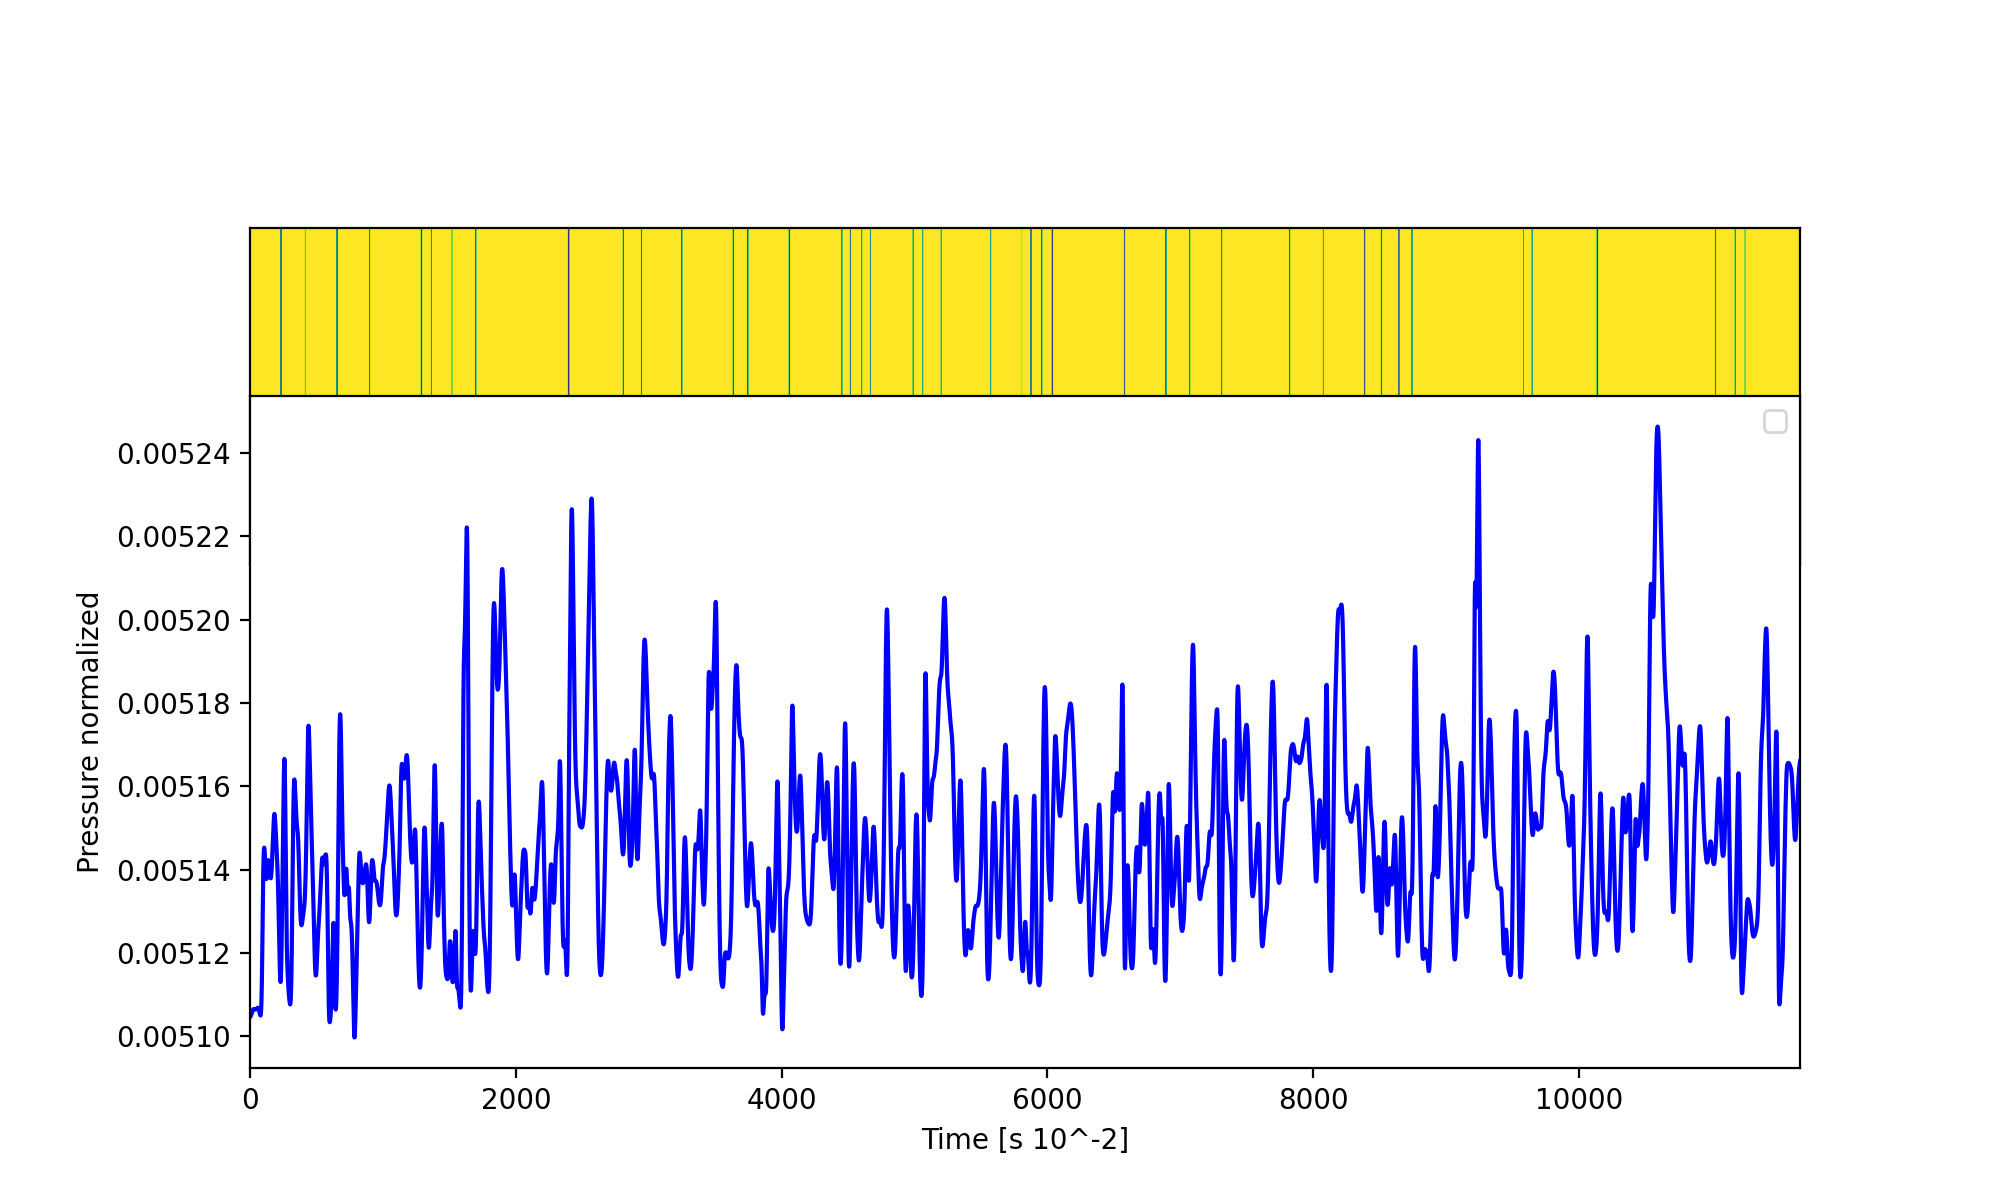

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<IPython.core.display.Javascript object>


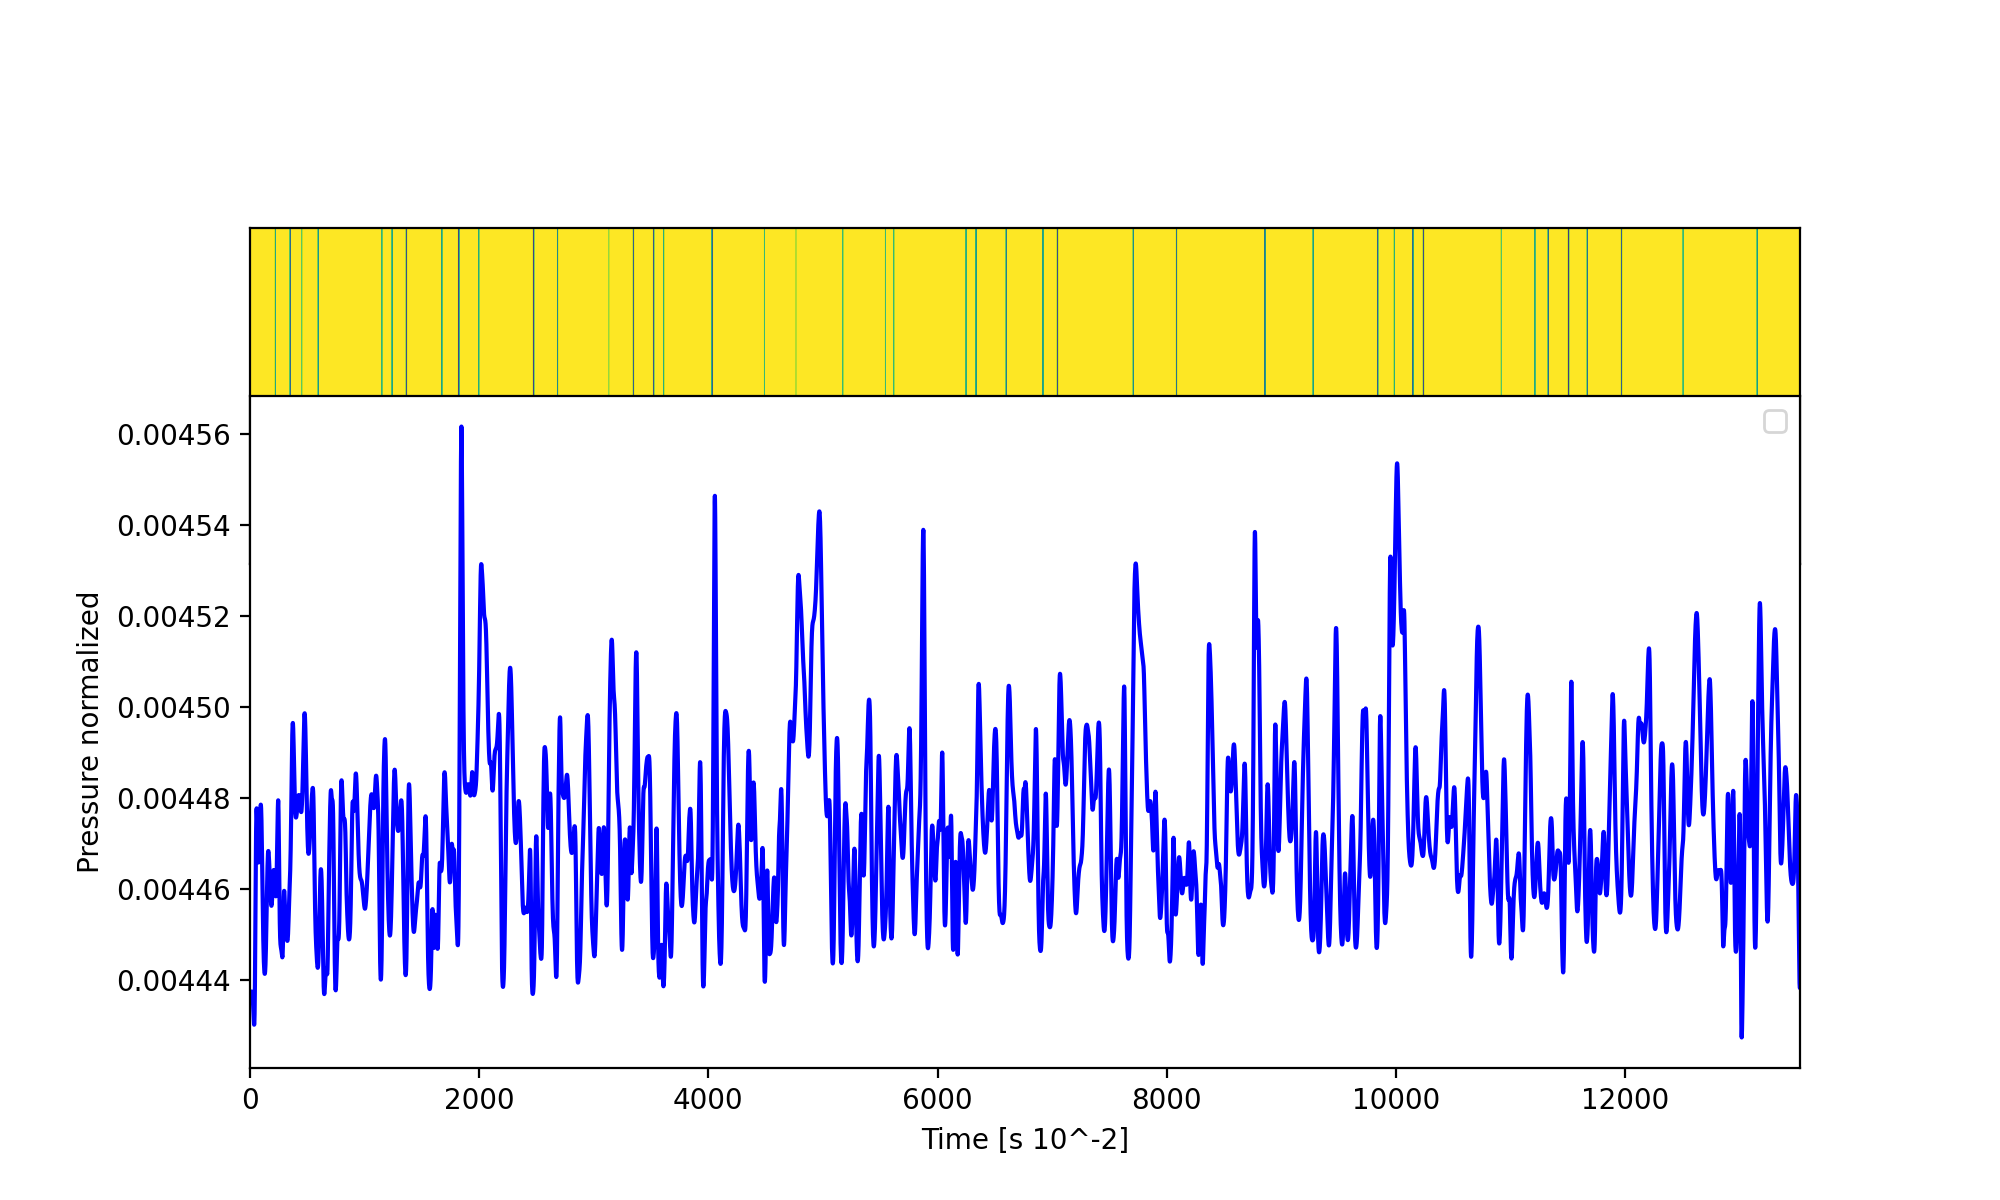

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


In [11]:
#query from B56 dataset applied to subsequent sets from same channel section
query = A14B56['pressure'].values[B56_start:B56_stop]

mp_A14_B13 = mp_query(A14B13,B56_start,B56_stop,query = query,threshold = 5,data_viz = "on")
mp_A14_B17 = mp_query(A14B17,B56_start,B56_stop,query = query,threshold = 5,data_viz = "on")
mp_A14_B78 = mp_query(A14B78,B56_start,B56_stop,query = query,threshold = 5,data_viz = "on")
mp_A14_B82 = mp_query(A14B82,B56_start,B56_stop,query = query,threshold = 5,data_viz = "on")
mp_A14_B84 = mp_query(A14B84,B56_start,B56_stop,query = query,threshold = 5,data_viz = "on")
mp_A14_B85 = mp_query(A14B85,B56_start,B56_stop,query = query,threshold = 5,data_viz = "on")


# Query search A8

<IPython.core.display.Javascript object>


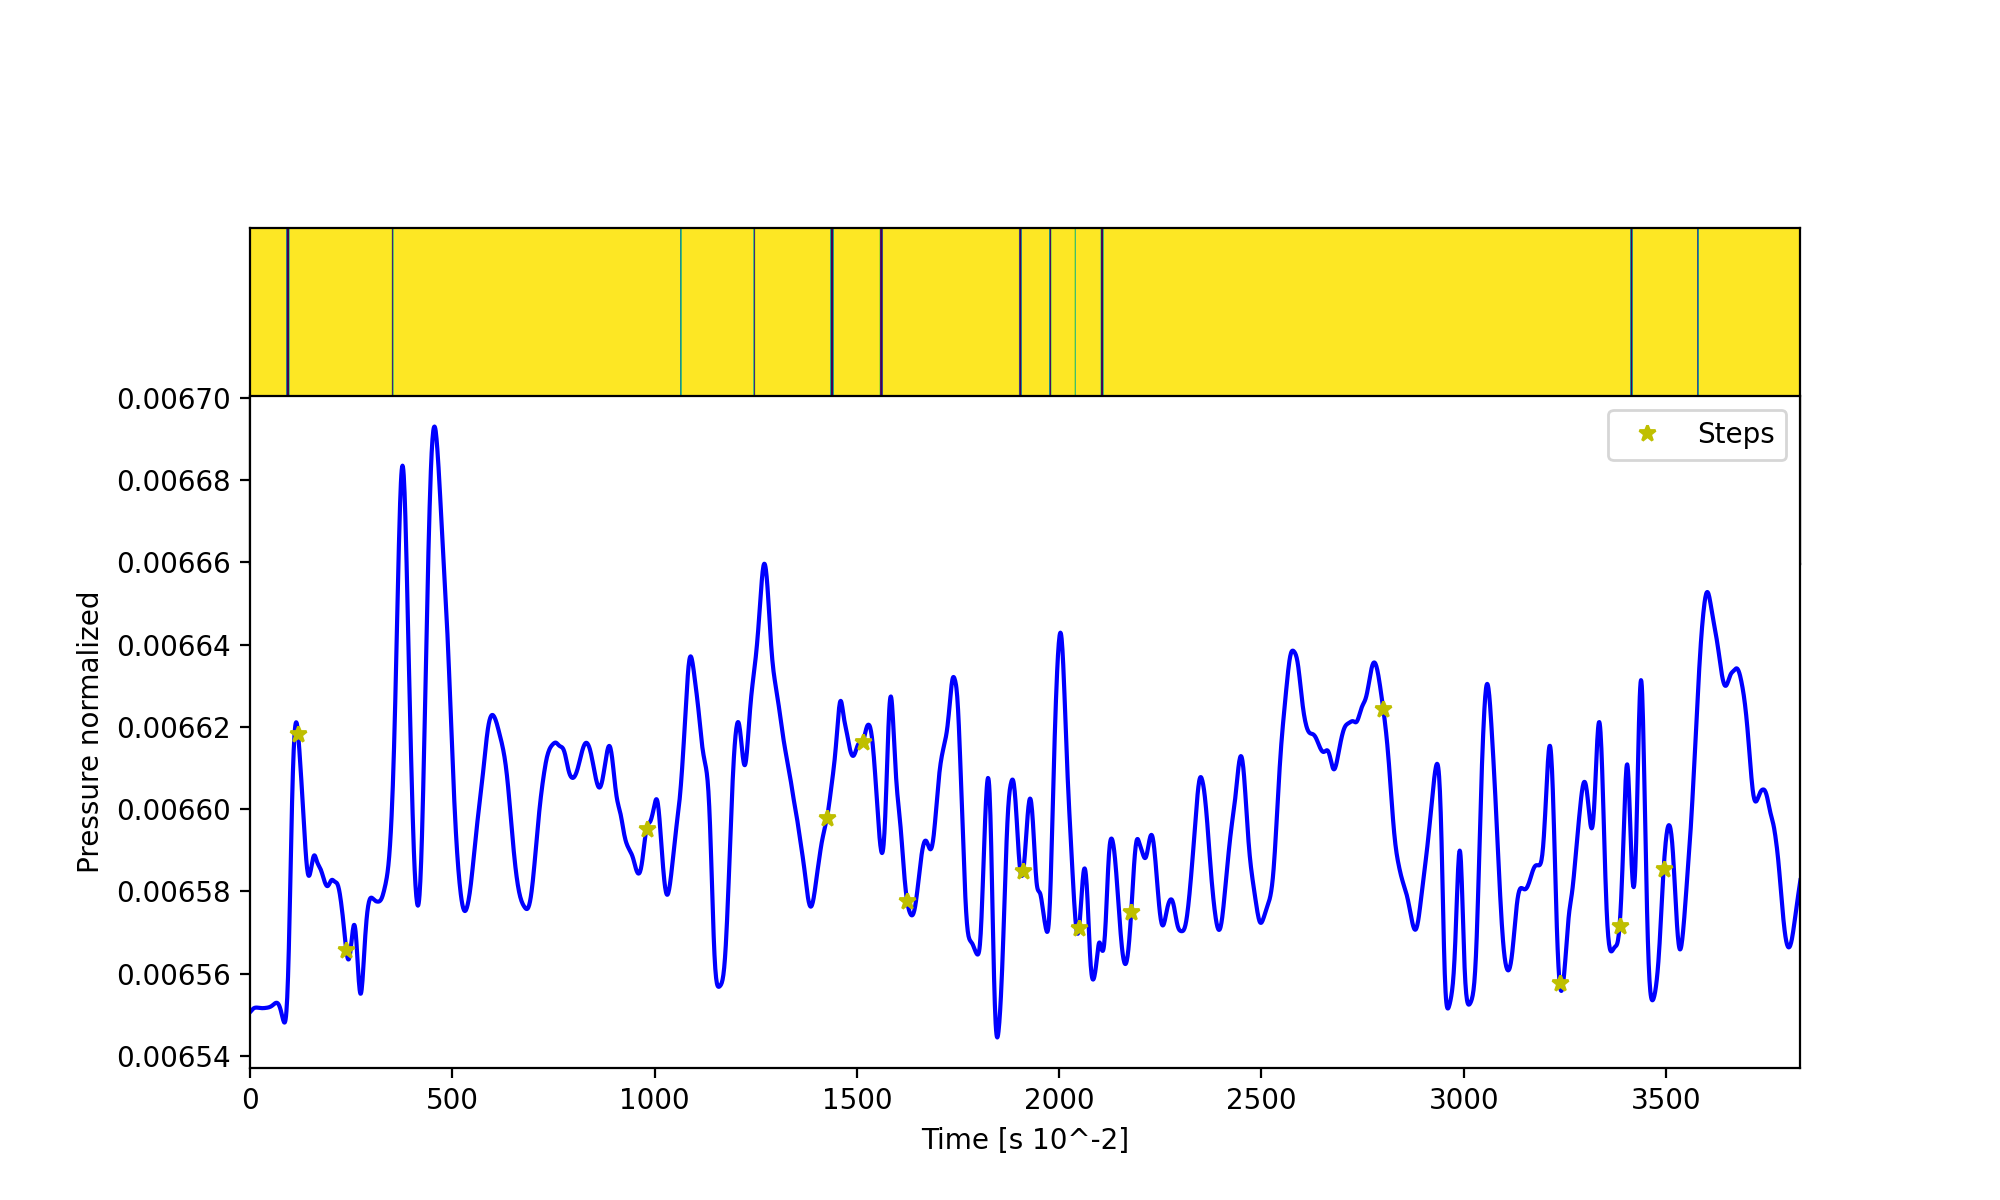

In [12]:
#B80 with video features
mp_A8_B80 = mp_query(A8B80,B56_start,B56_stop,query,threshold = 5,features=A8_steps_idx,data_viz = "on")



<IPython.core.display.Javascript object>


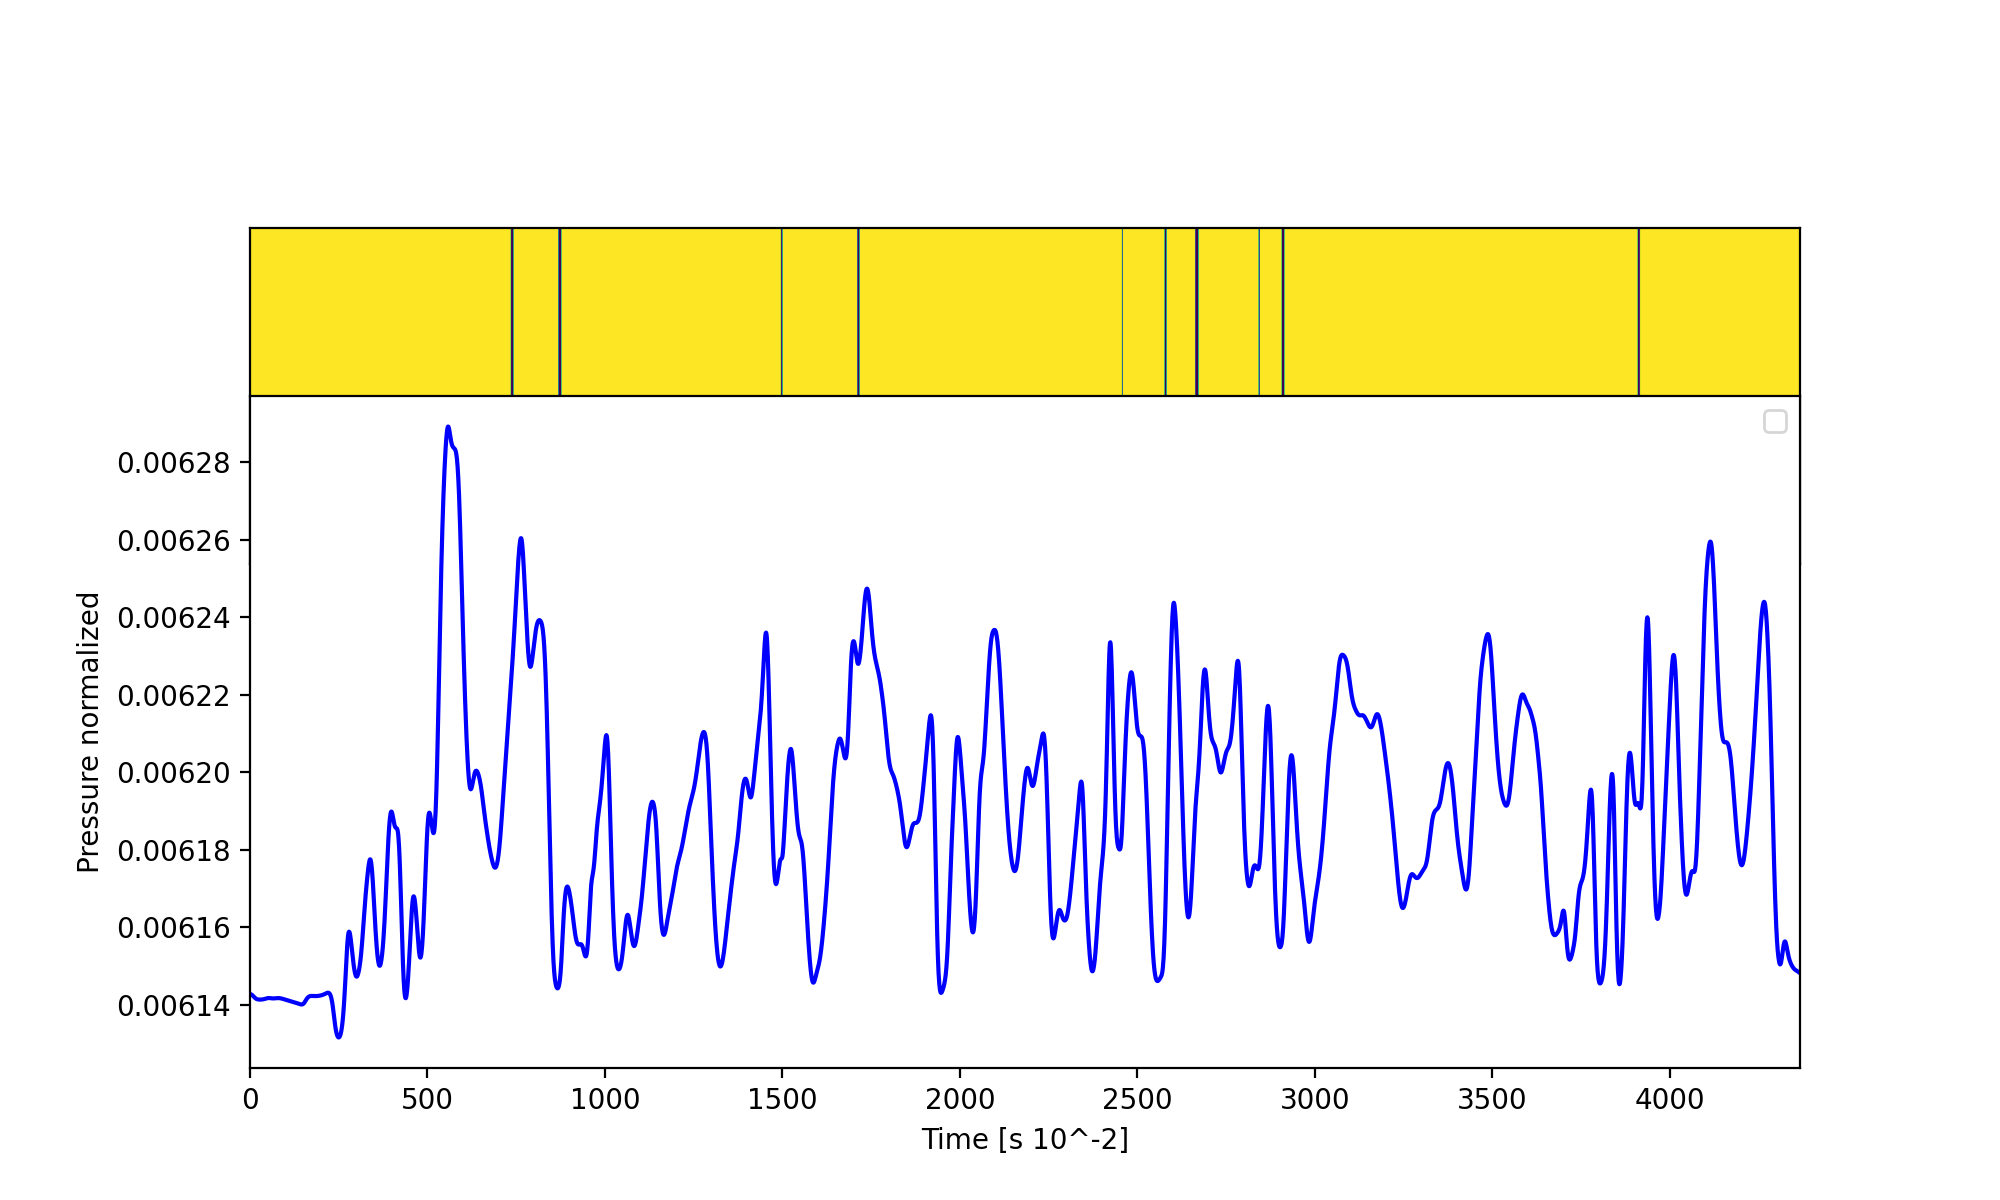

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<IPython.core.display.Javascript object>


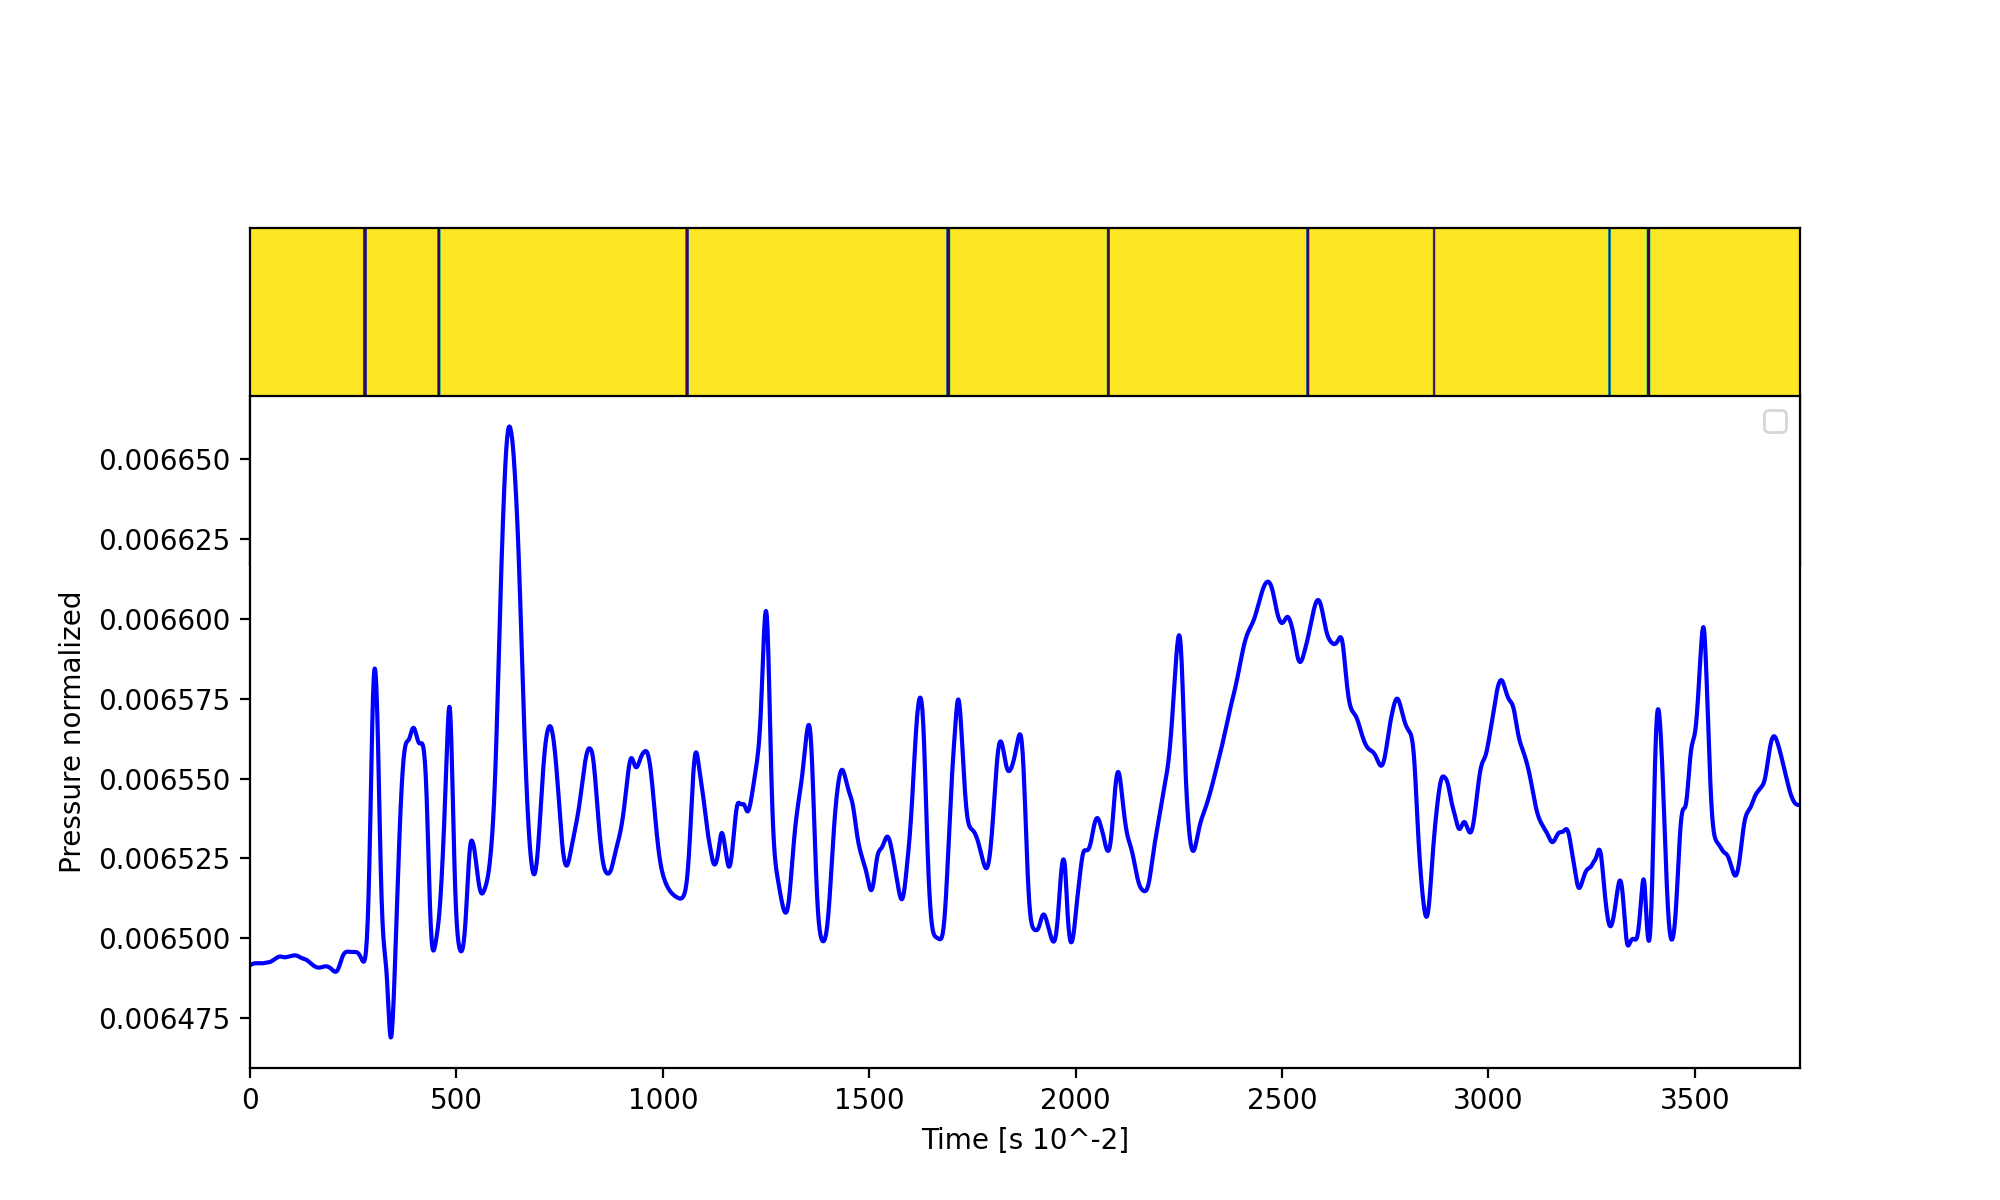

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<IPython.core.display.Javascript object>


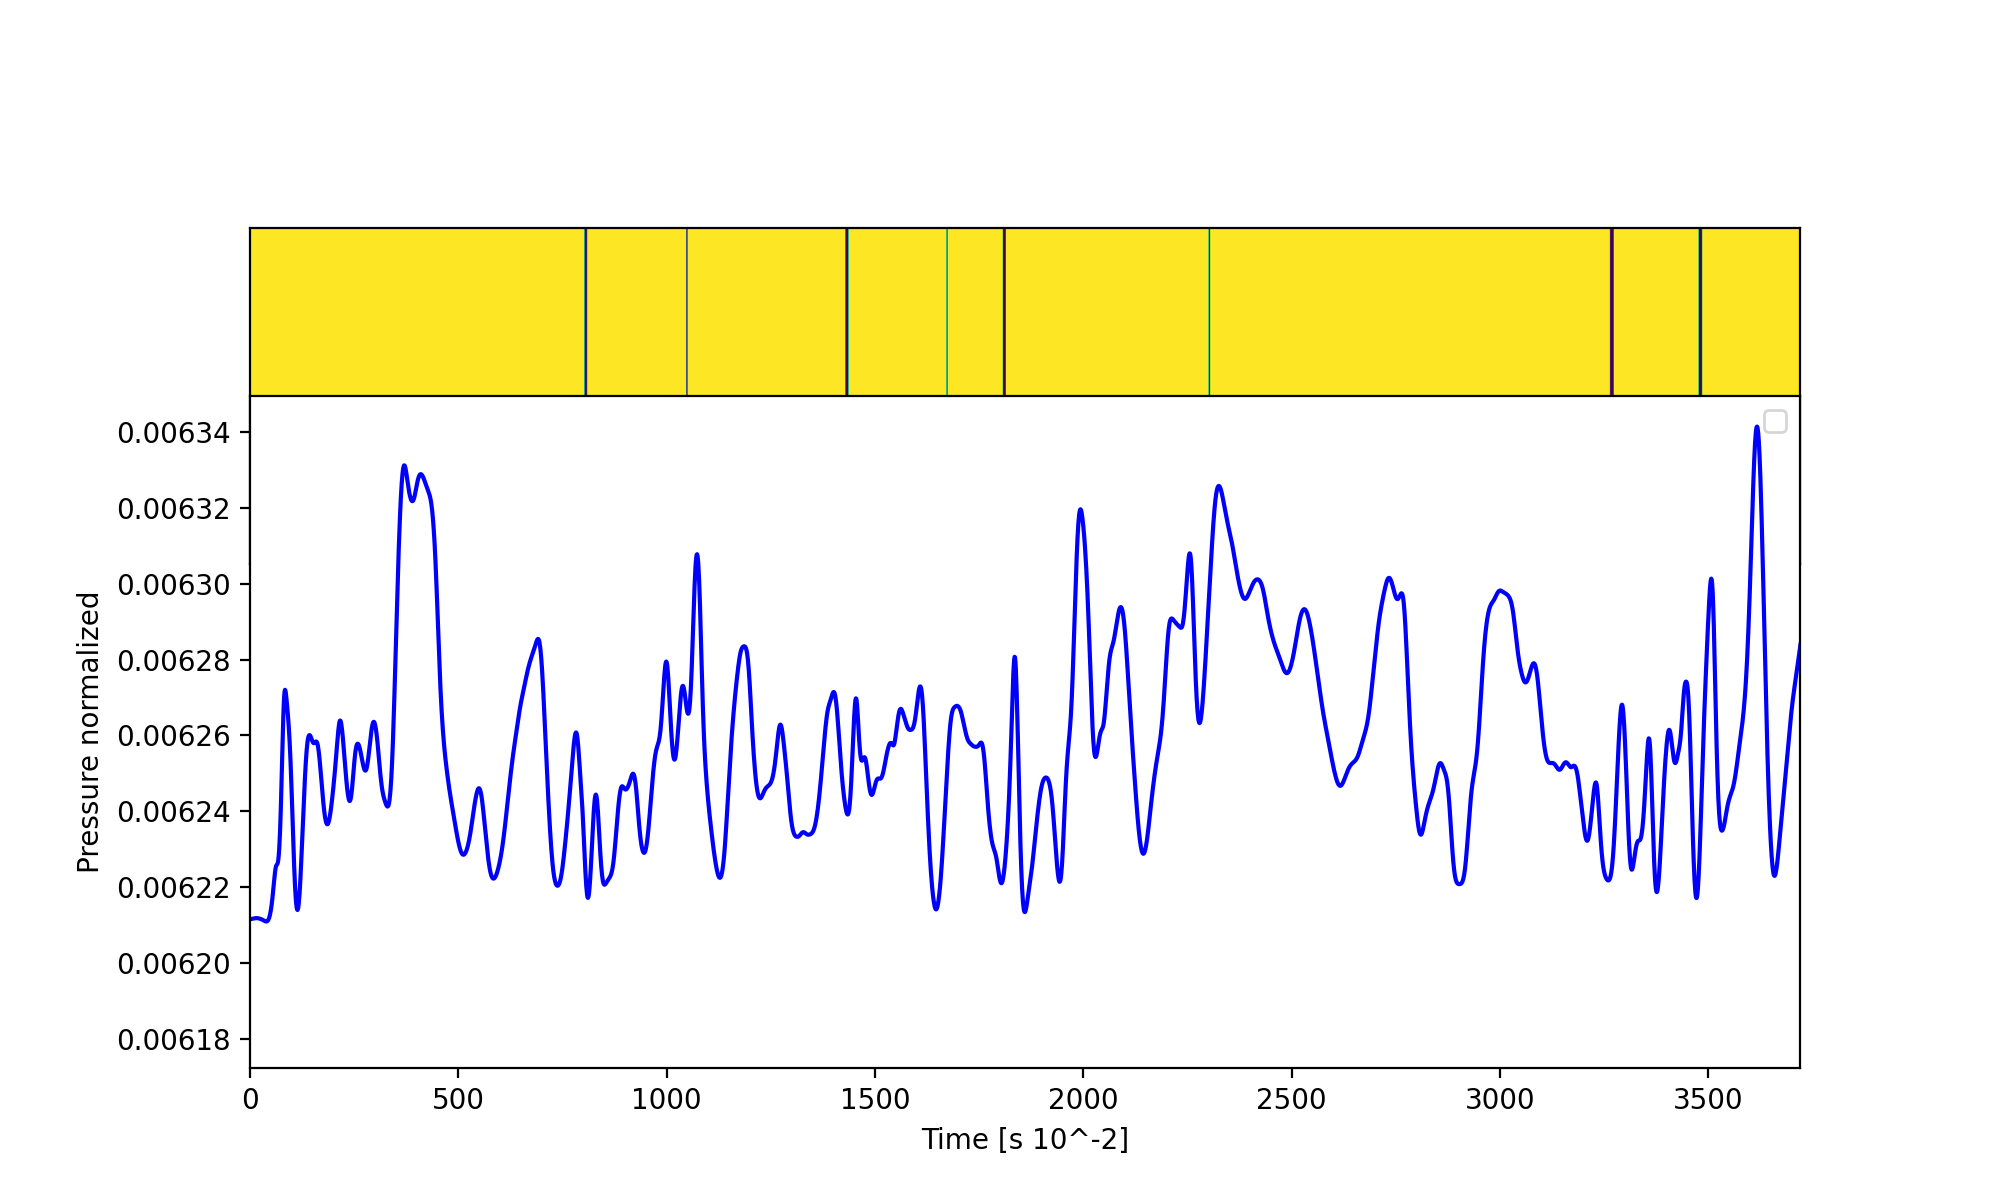

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<IPython.core.display.Javascript object>


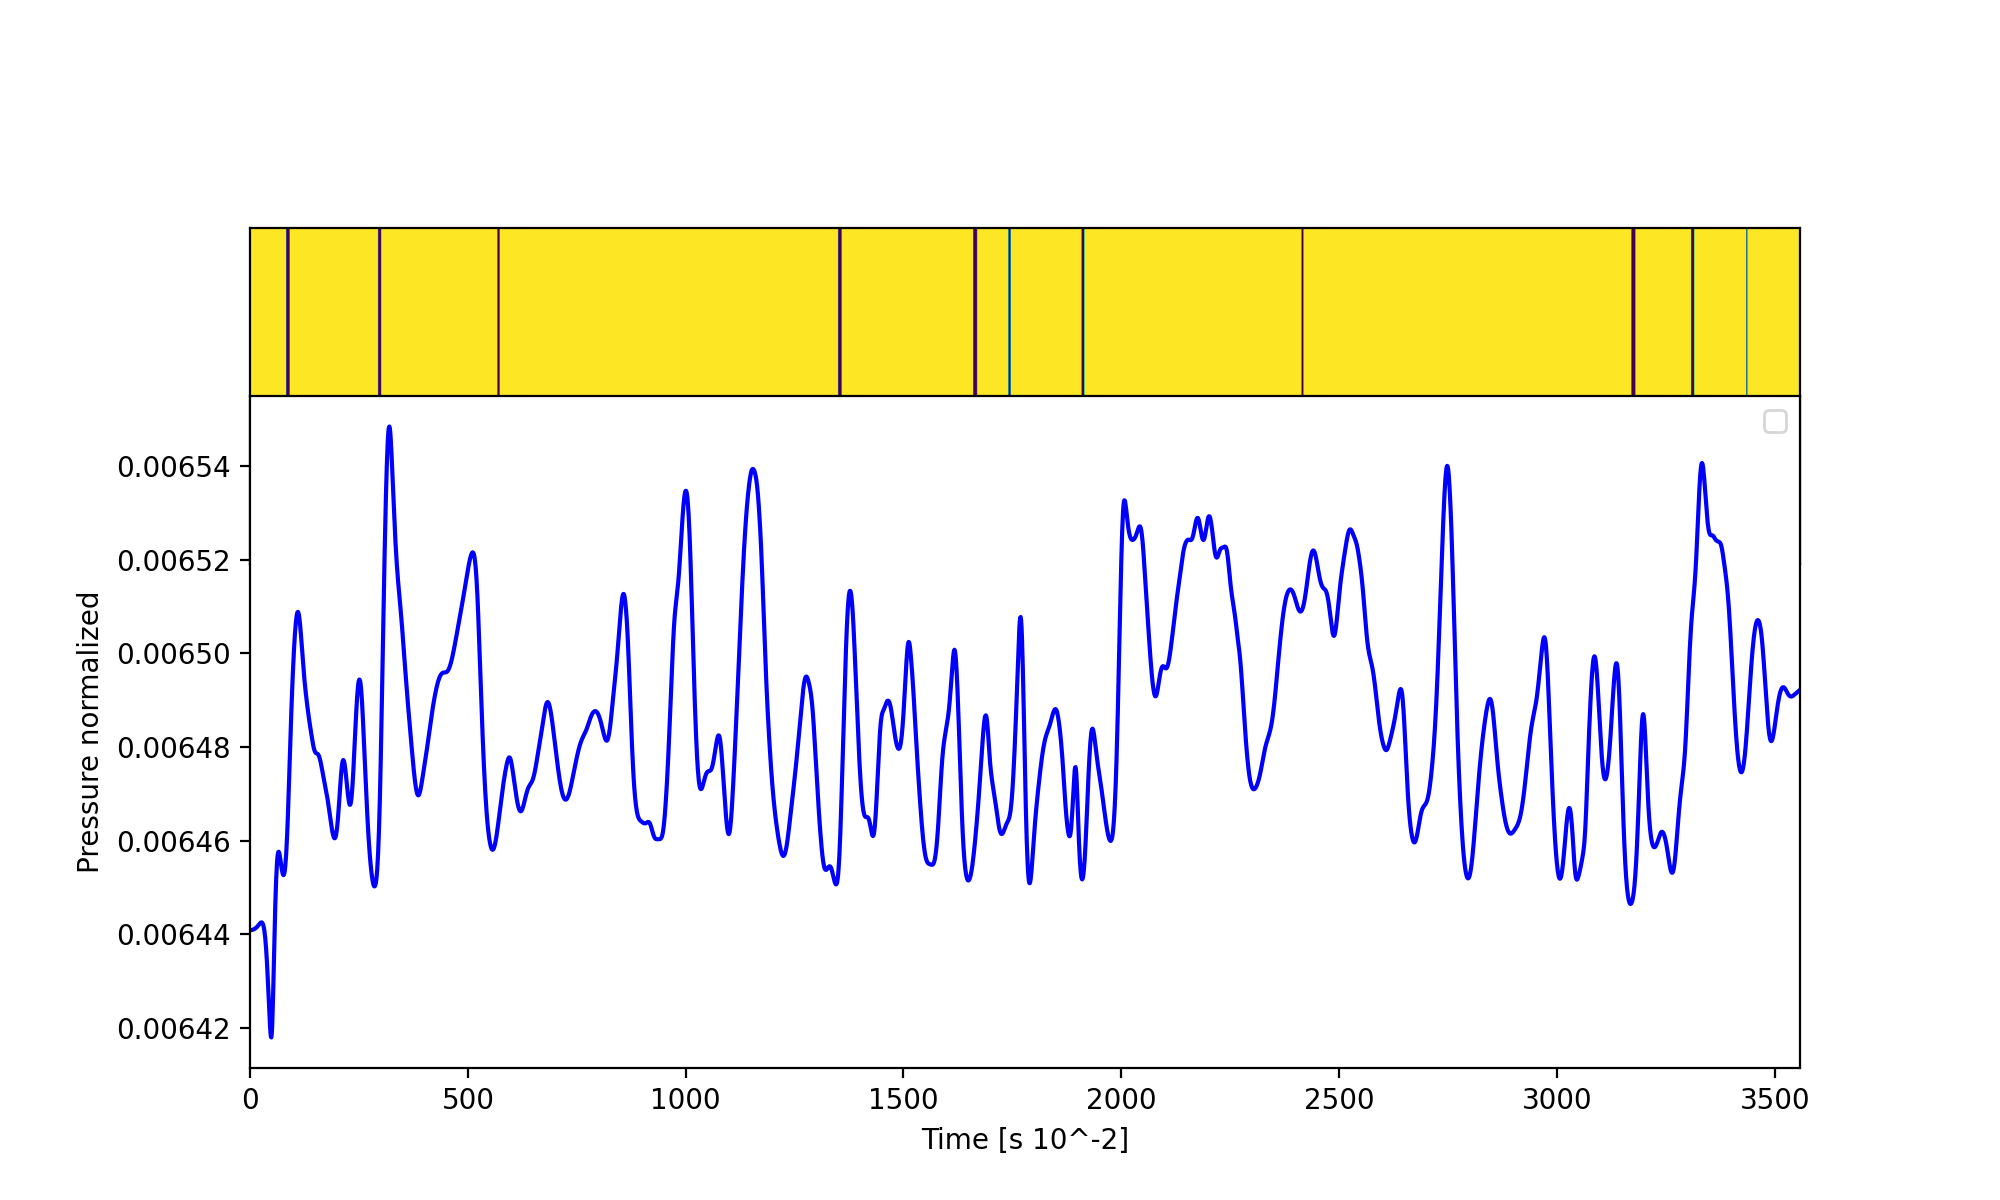

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<IPython.core.display.Javascript object>


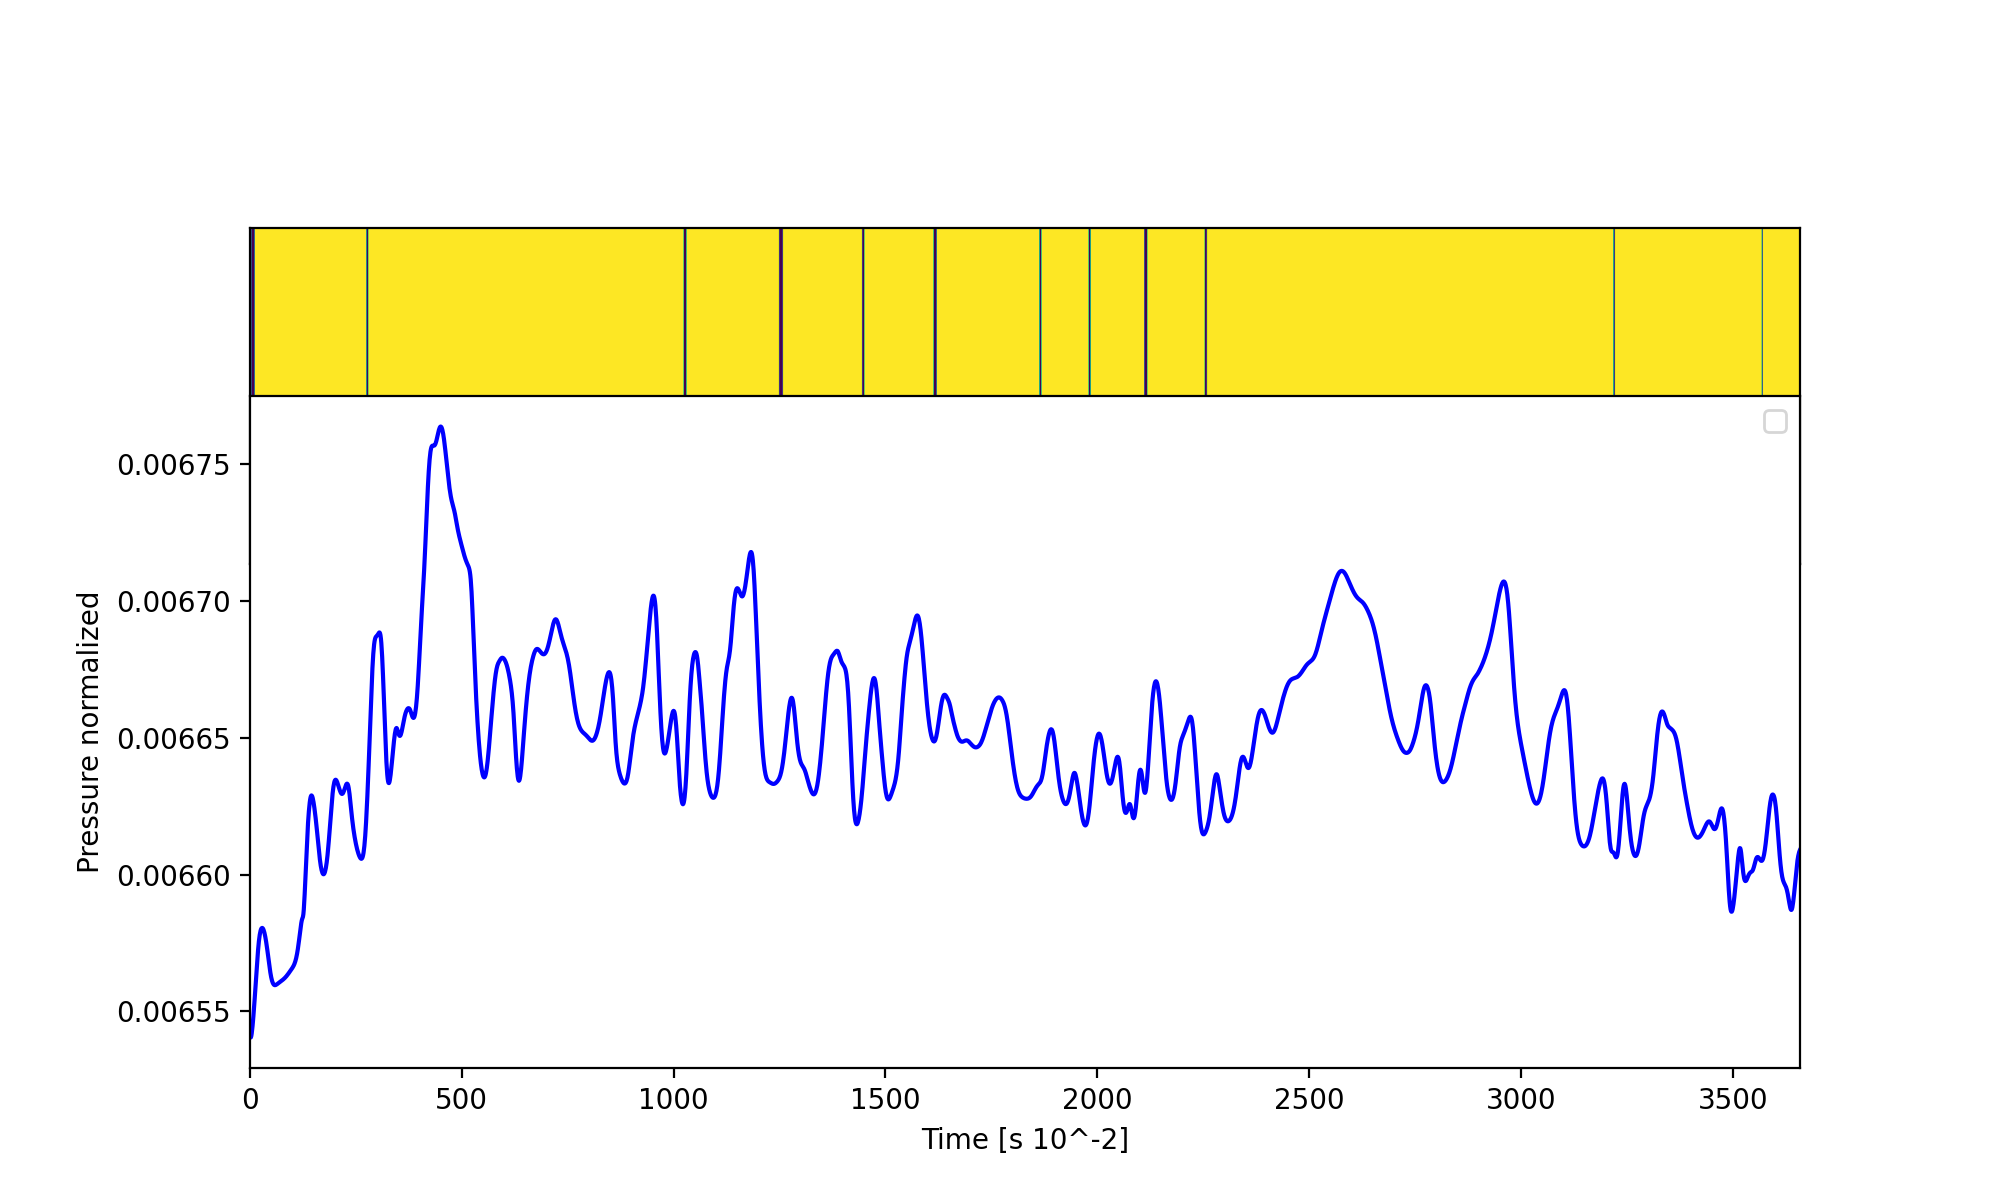

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<IPython.core.display.Javascript object>


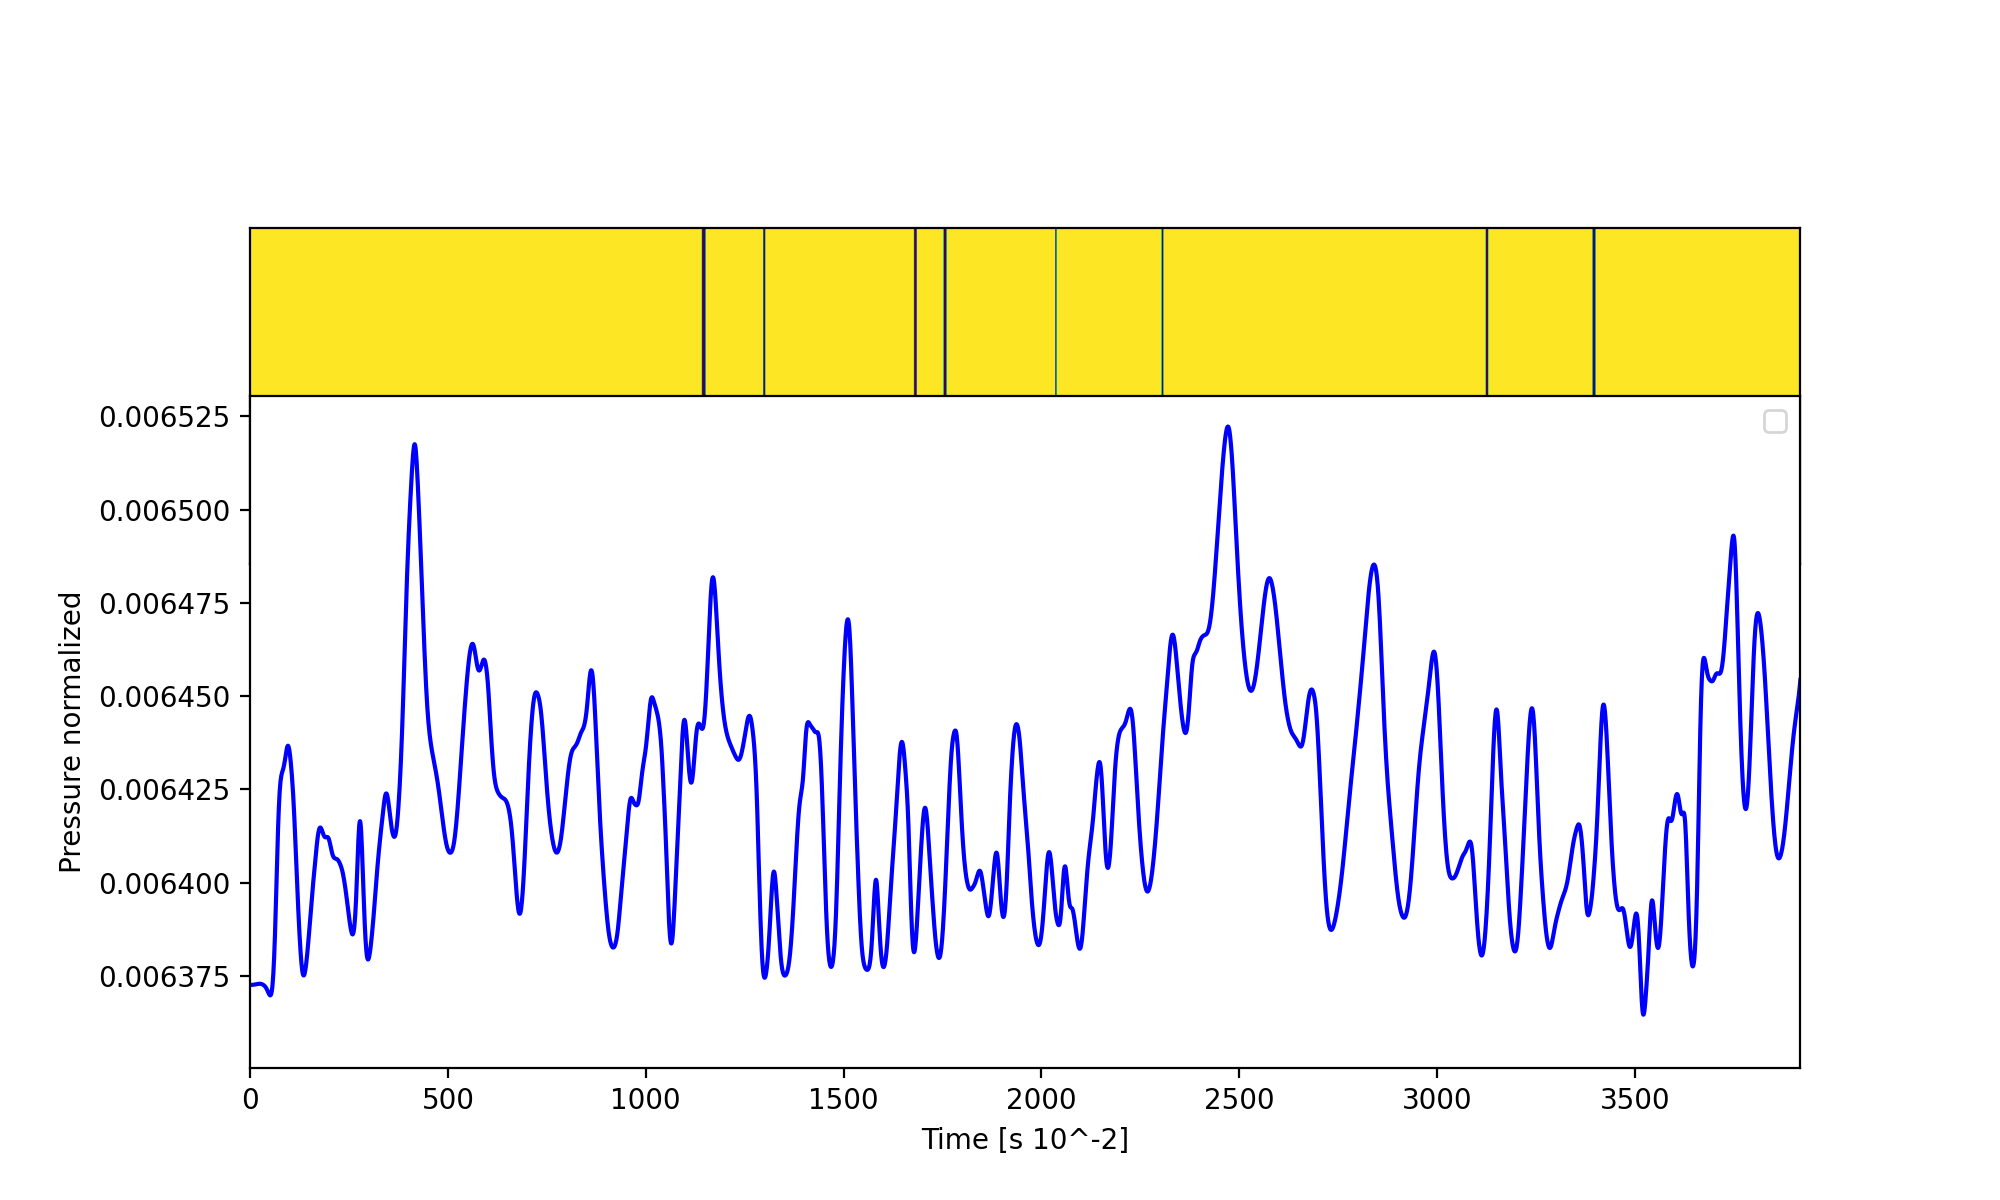

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<IPython.core.display.Javascript object>


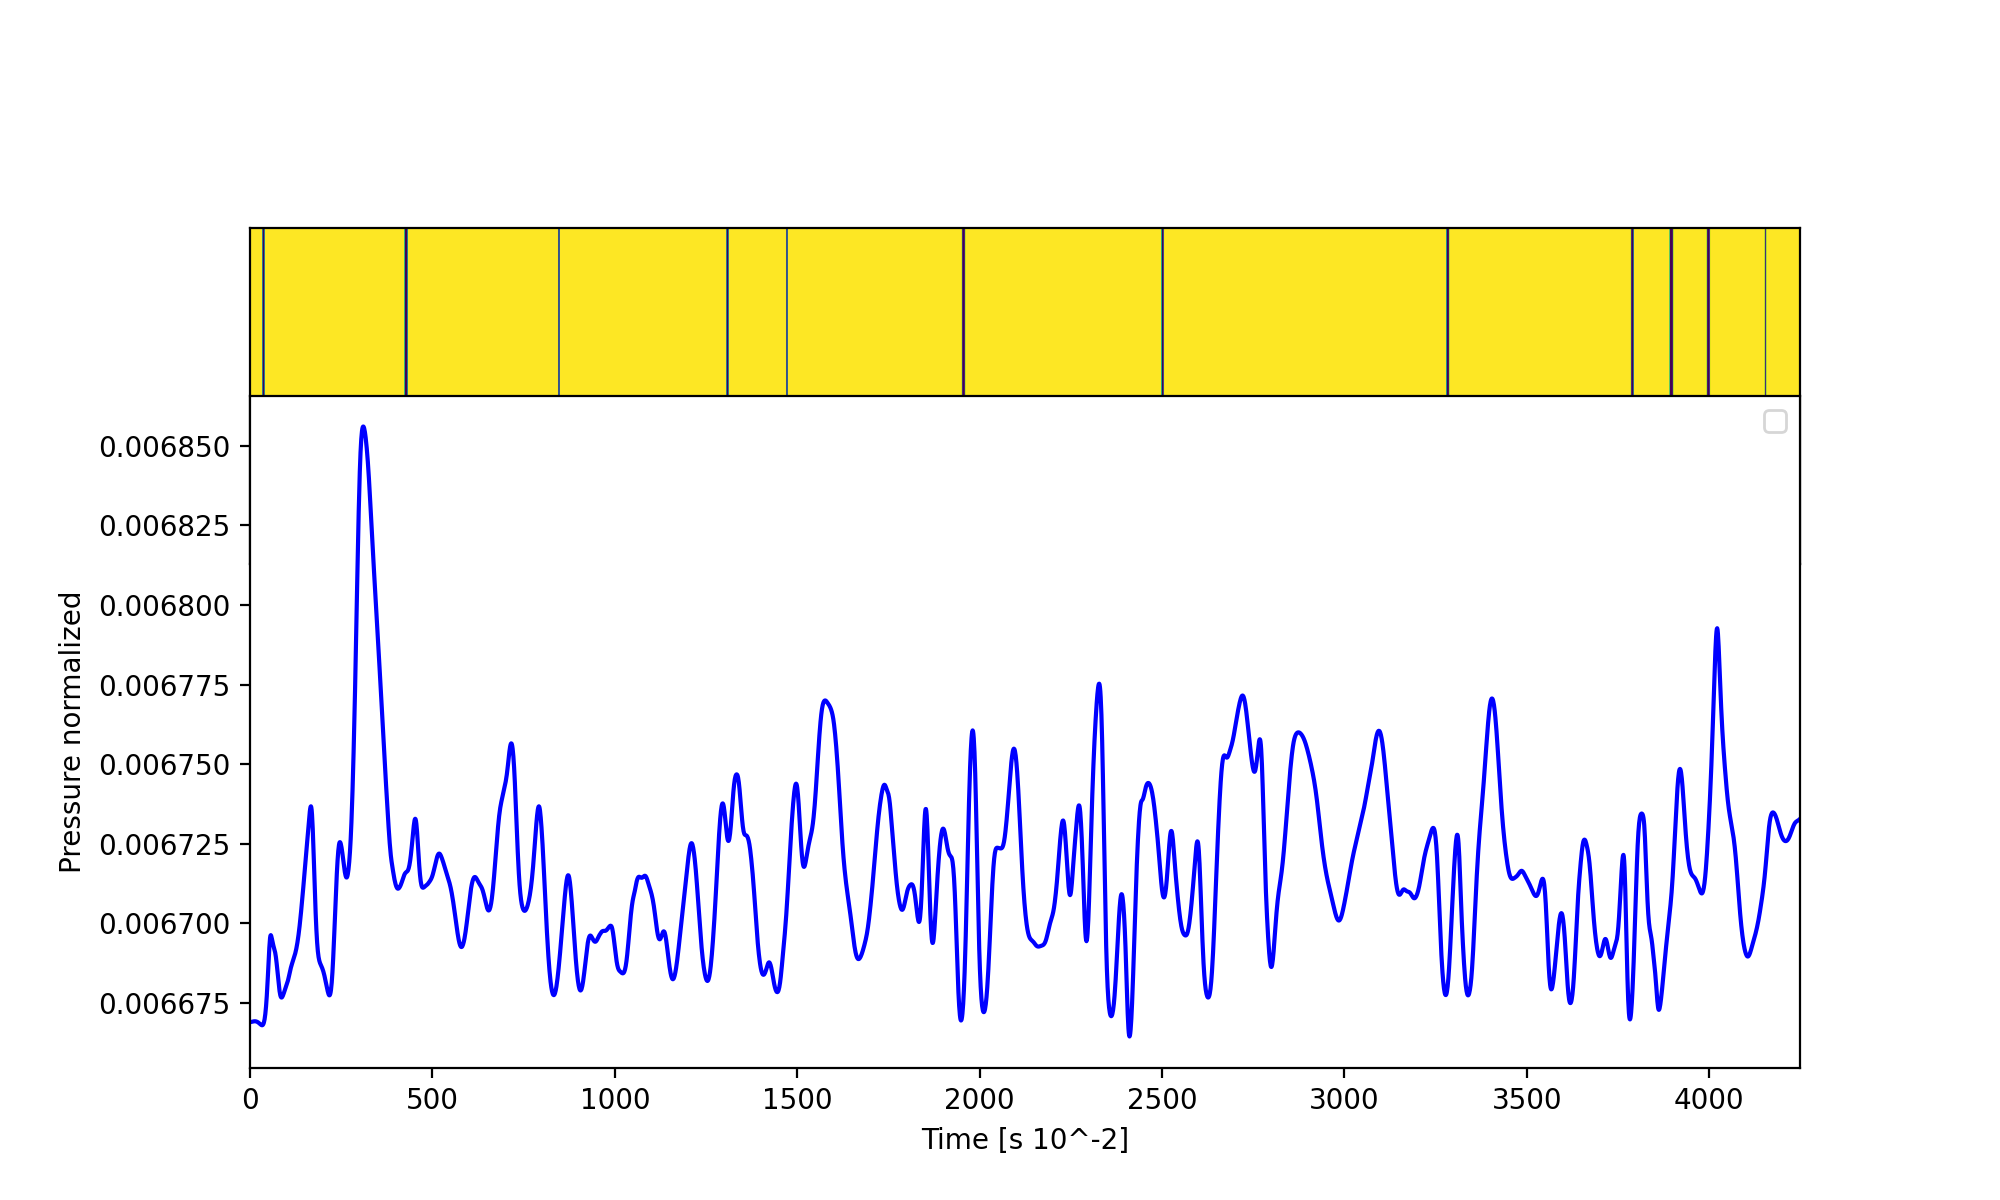

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<IPython.core.display.Javascript object>


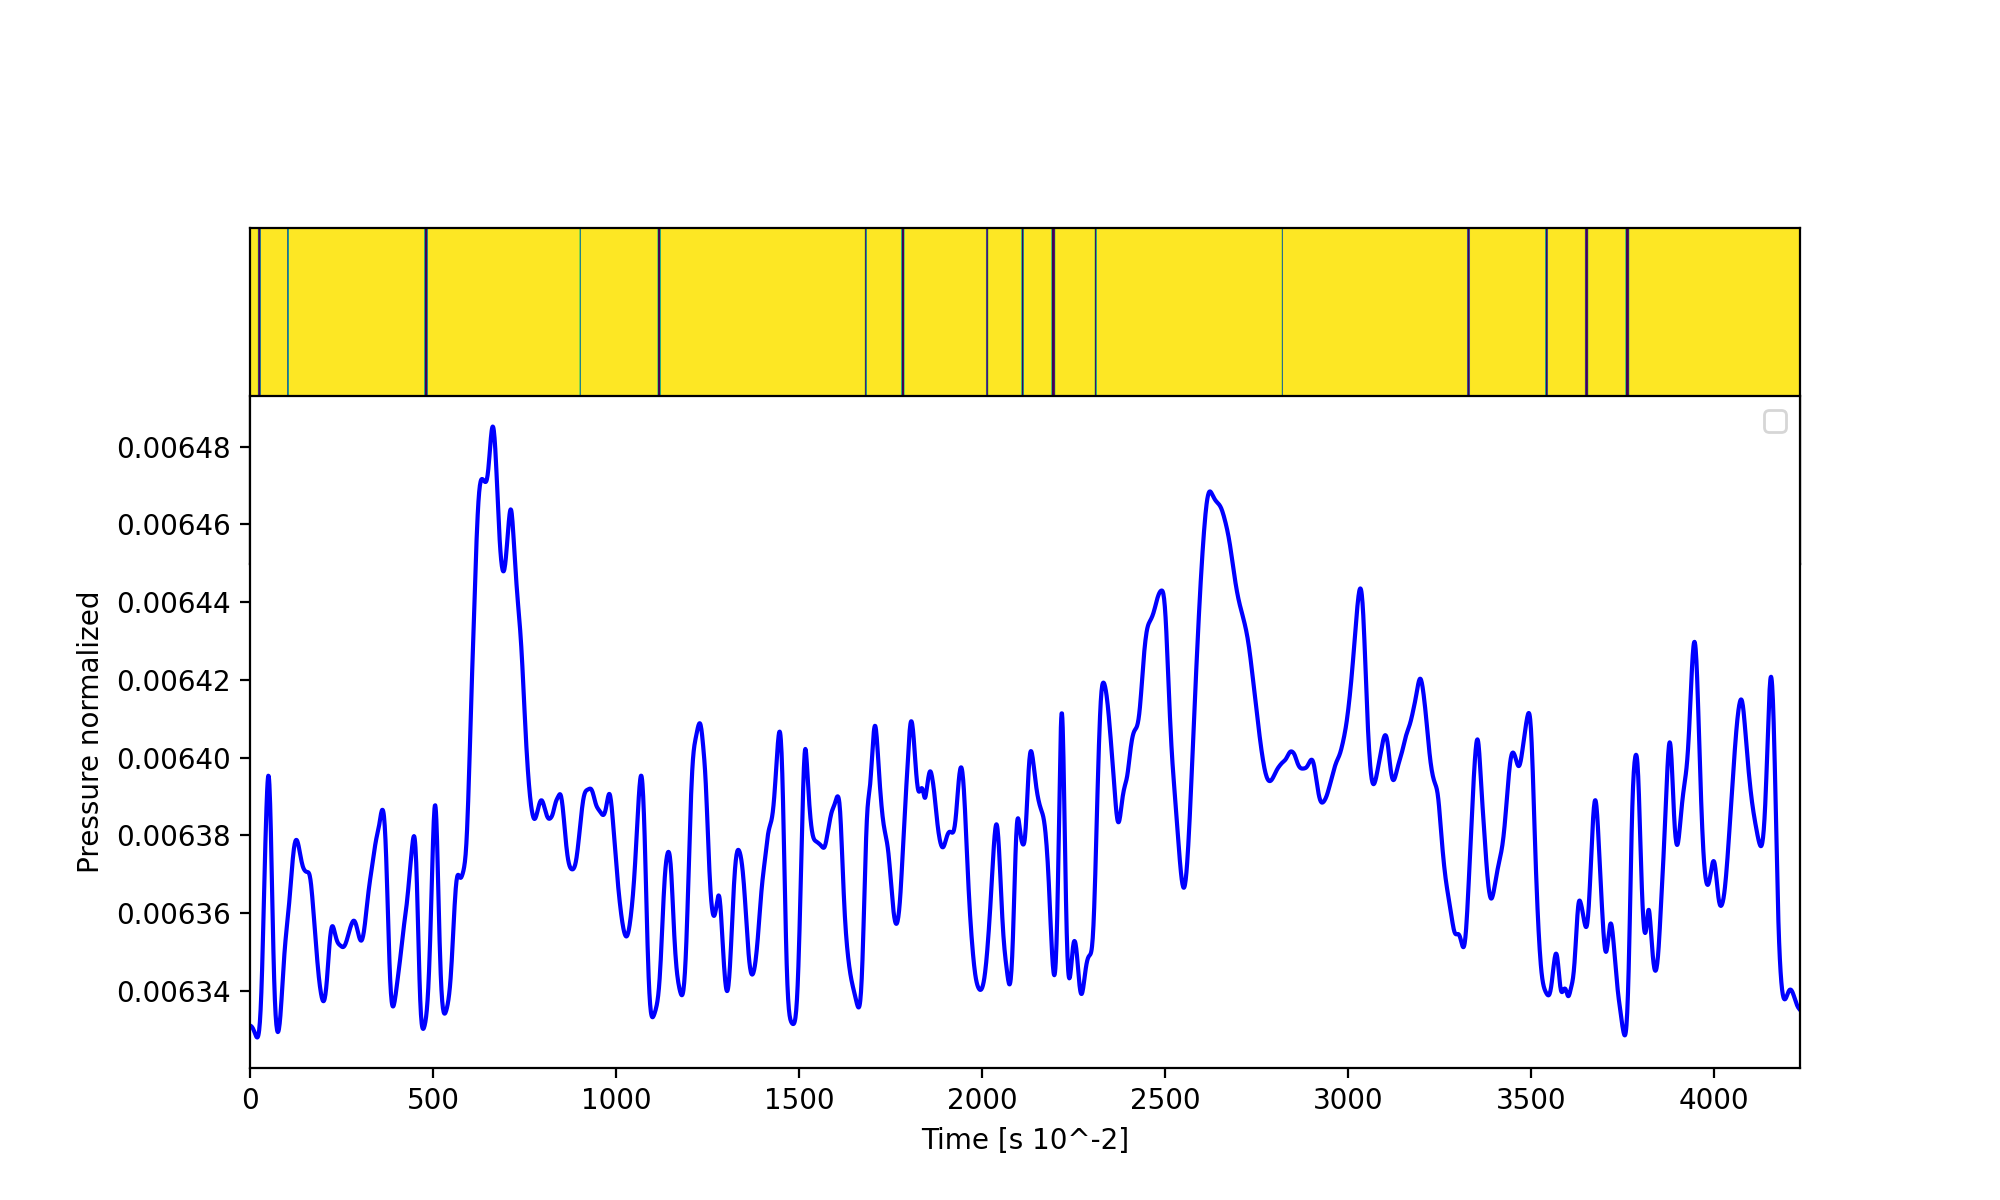

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<IPython.core.display.Javascript object>


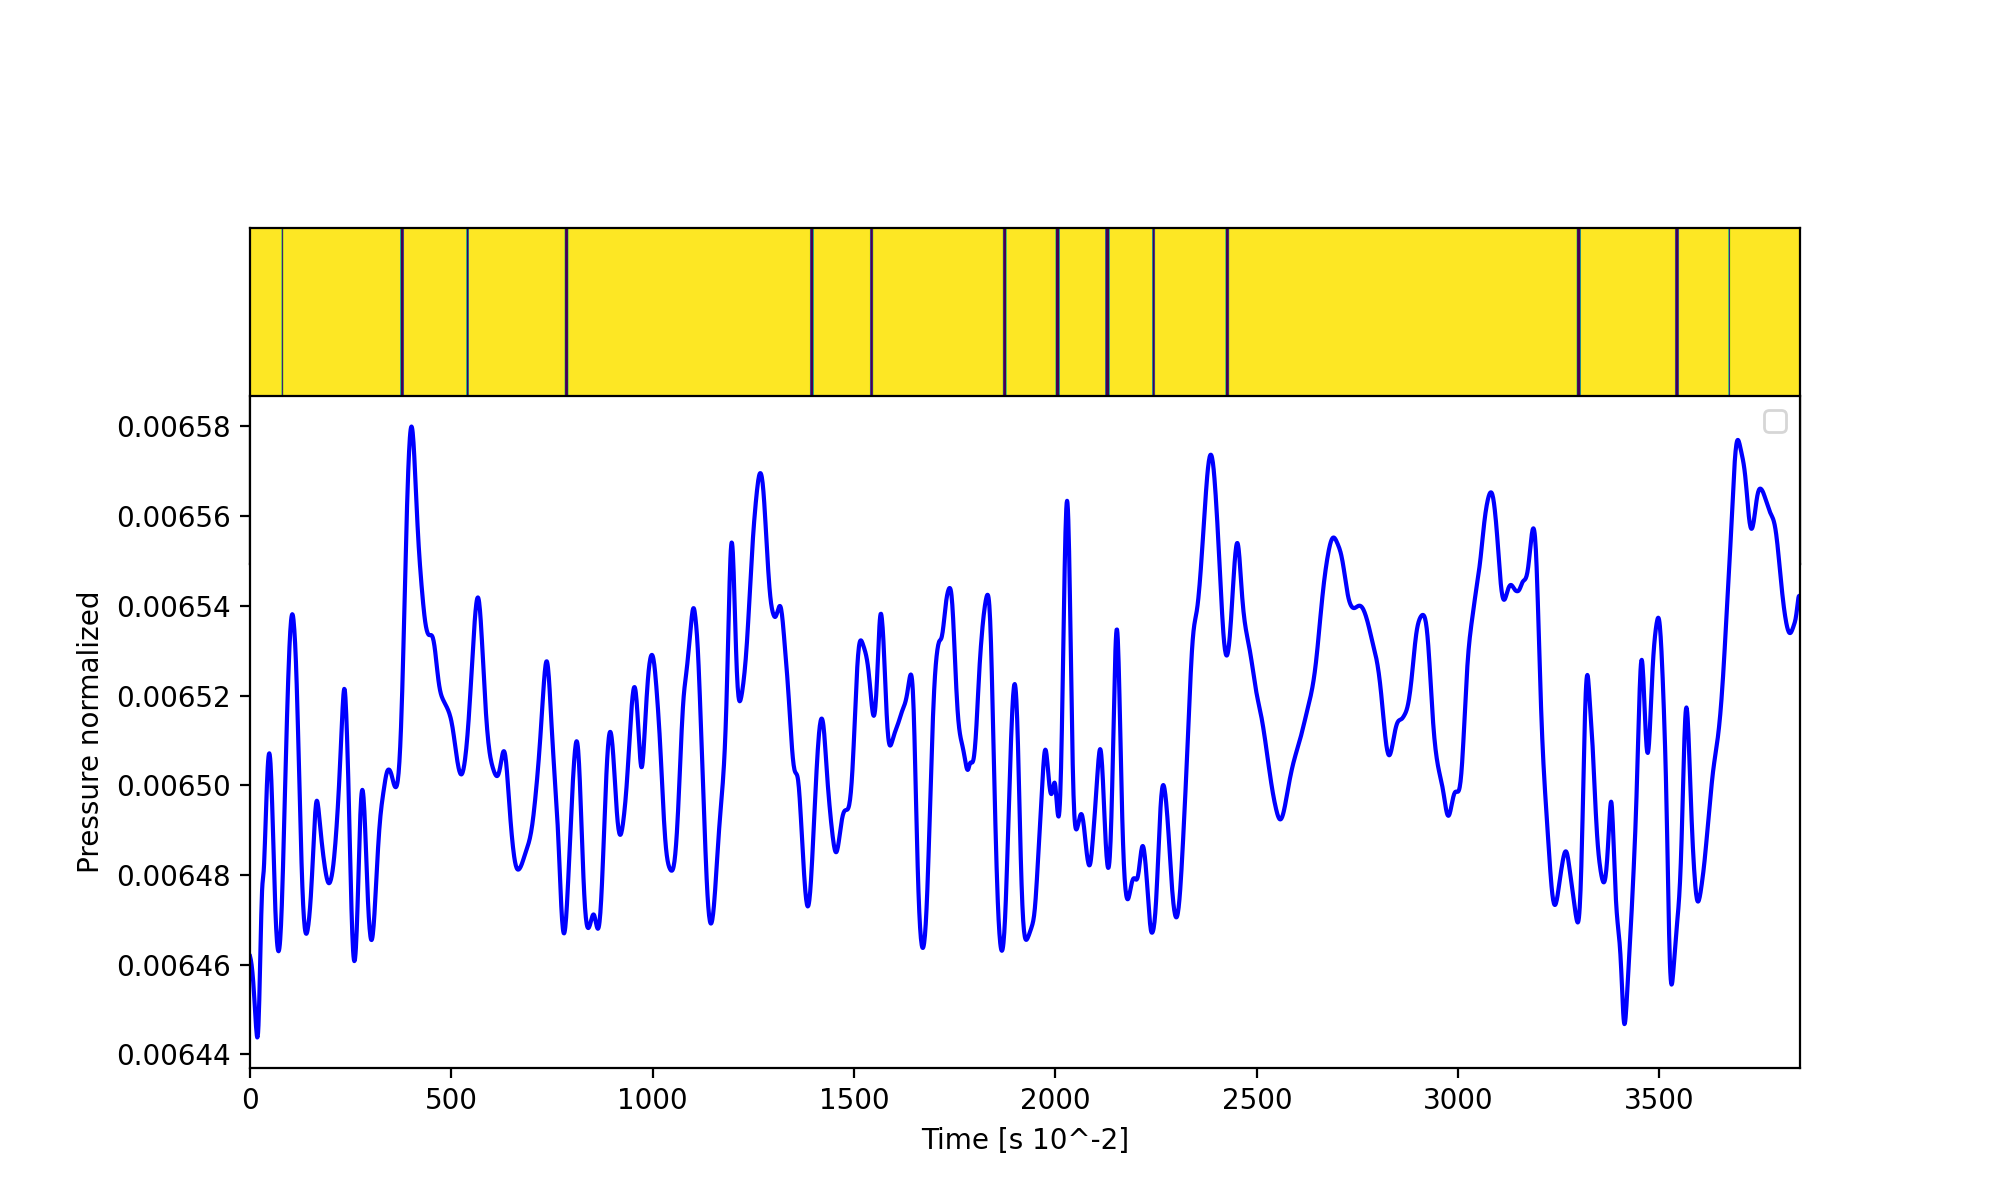

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<IPython.core.display.Javascript object>


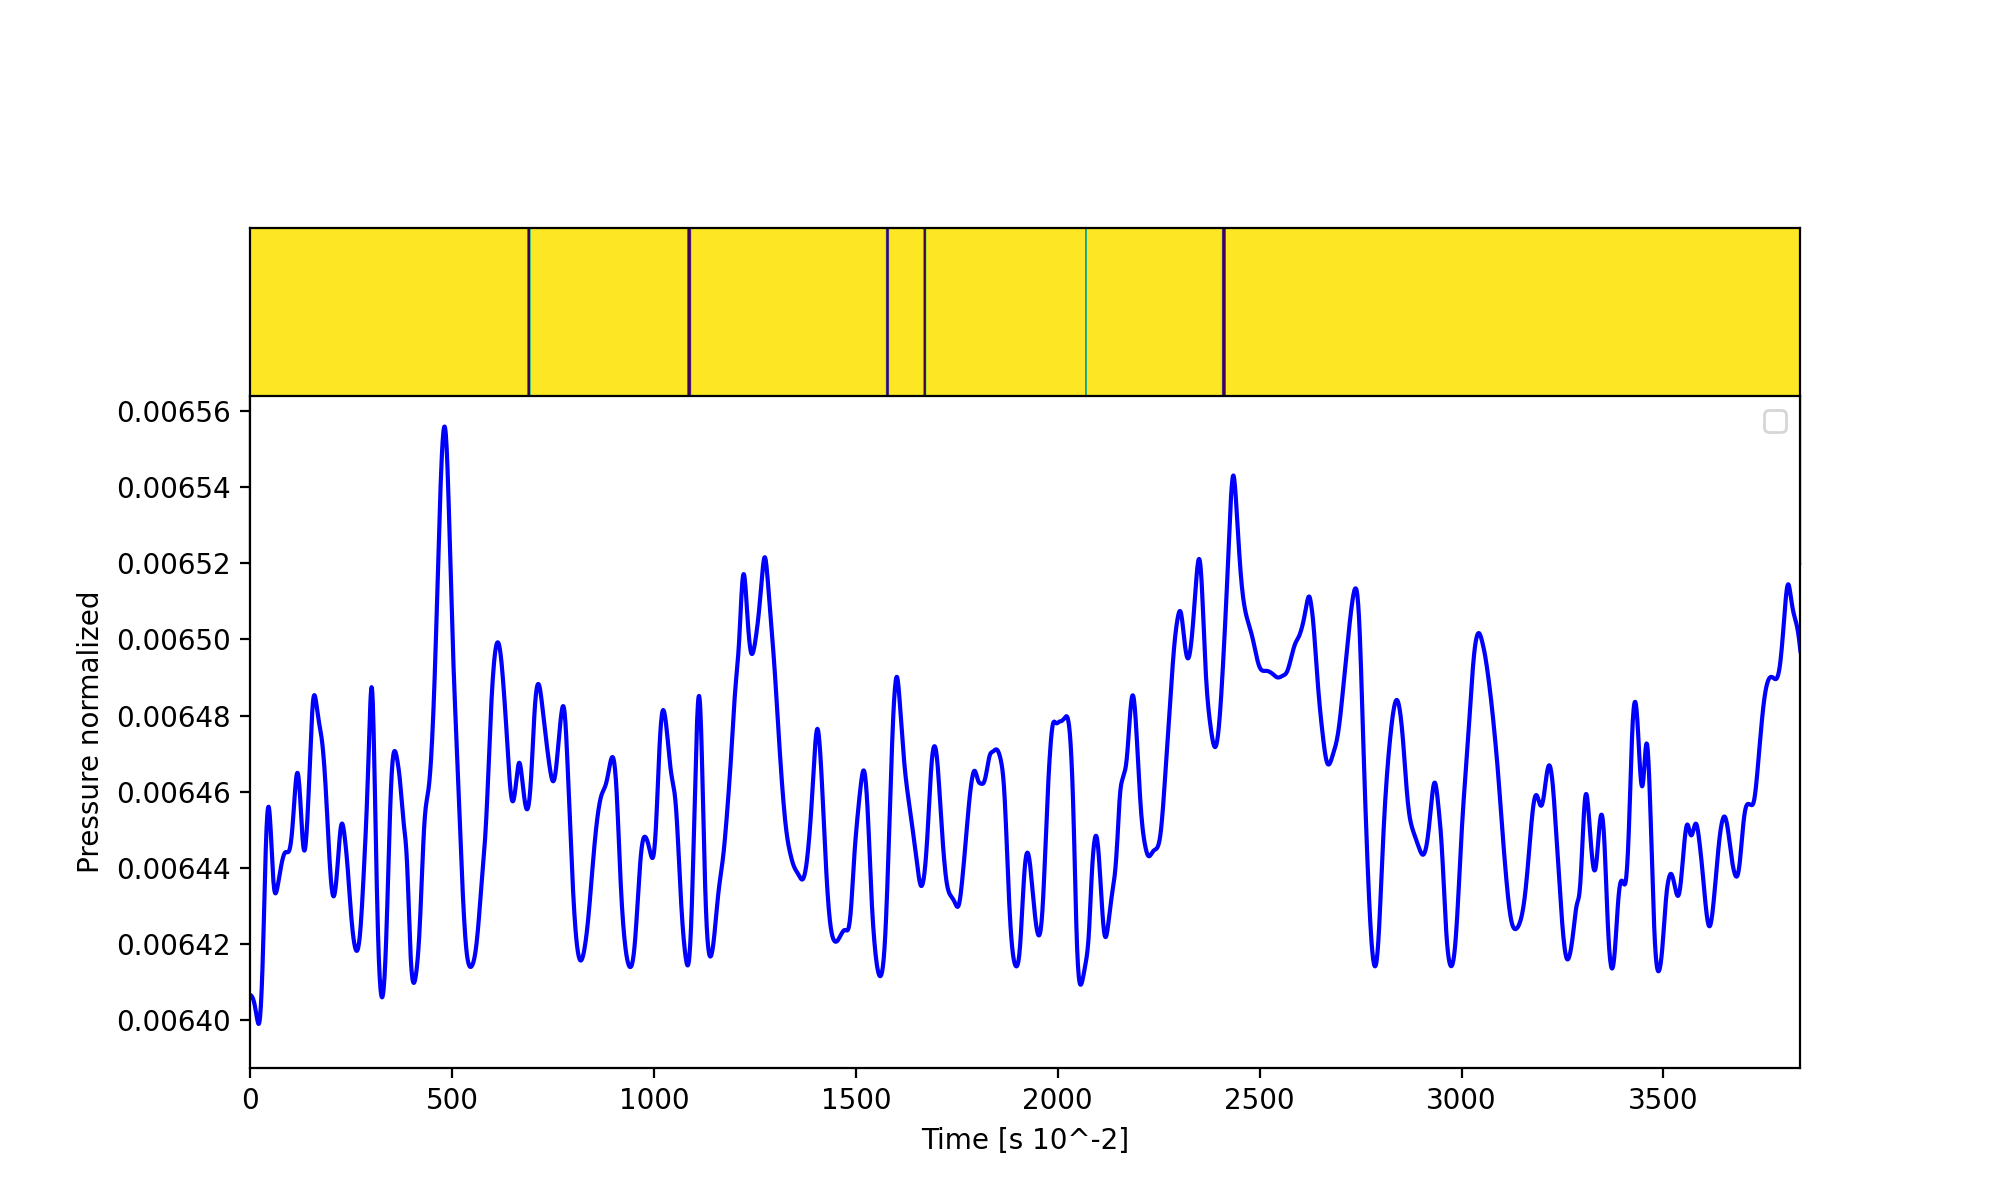

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


In [13]:


mp_A8_B10 = mp_query(A8B10,B56_start,B56_stop,query = query,threshold = 5,data_viz = "on")#10
mp_A8_B13 = mp_query(A8B13,B56_start,B56_stop,query = query,threshold = 5,data_viz = "on")#9
mp_A8_B33 = mp_query(A8B33,B56_start,B56_stop,query = query,threshold = 5,data_viz = "on")#8
mp_A8_B55 = mp_query(A8B55,B56_start,B56_stop,query = query,threshold = 5,data_viz = "on")#11
mp_A8_B65 = mp_query(A8B65,B56_start,B56_stop,query = query,threshold = 5,data_viz = "on")#12
mp_A8_B74 = mp_query(A8B74,B56_start,B56_stop,query = query,threshold = 5,data_viz = "on")#8
mp_A8_B75 = mp_query(A8B75,B56_start,B56_stop,query = query,threshold = 5,data_viz = "on")#12
mp_A8_B84 = mp_query(A8B84,B56_start,B56_stop,query = query,threshold = 5,data_viz = "on")#16
mp_A8_B85 = mp_query(A8B85,B56_start,B56_stop,query = query,threshold = 5,data_viz = "on")#14
mp_A8_B86 = mp_query(A8B86,B56_start,B56_stop,query = query,threshold = 5,data_viz = "on")#6


# 2. query 
Create synthetic signal of multiple steps

/var/folders/_k/bgs9c7fx4098w4vgtc325b8w0000gn/T/ipykernel_4981/502937447.py:23: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, (ax,ax1) = plt.subplots(nrows=2, sharex=True,figsize=(10, 6))


<IPython.core.display.Javascript object>


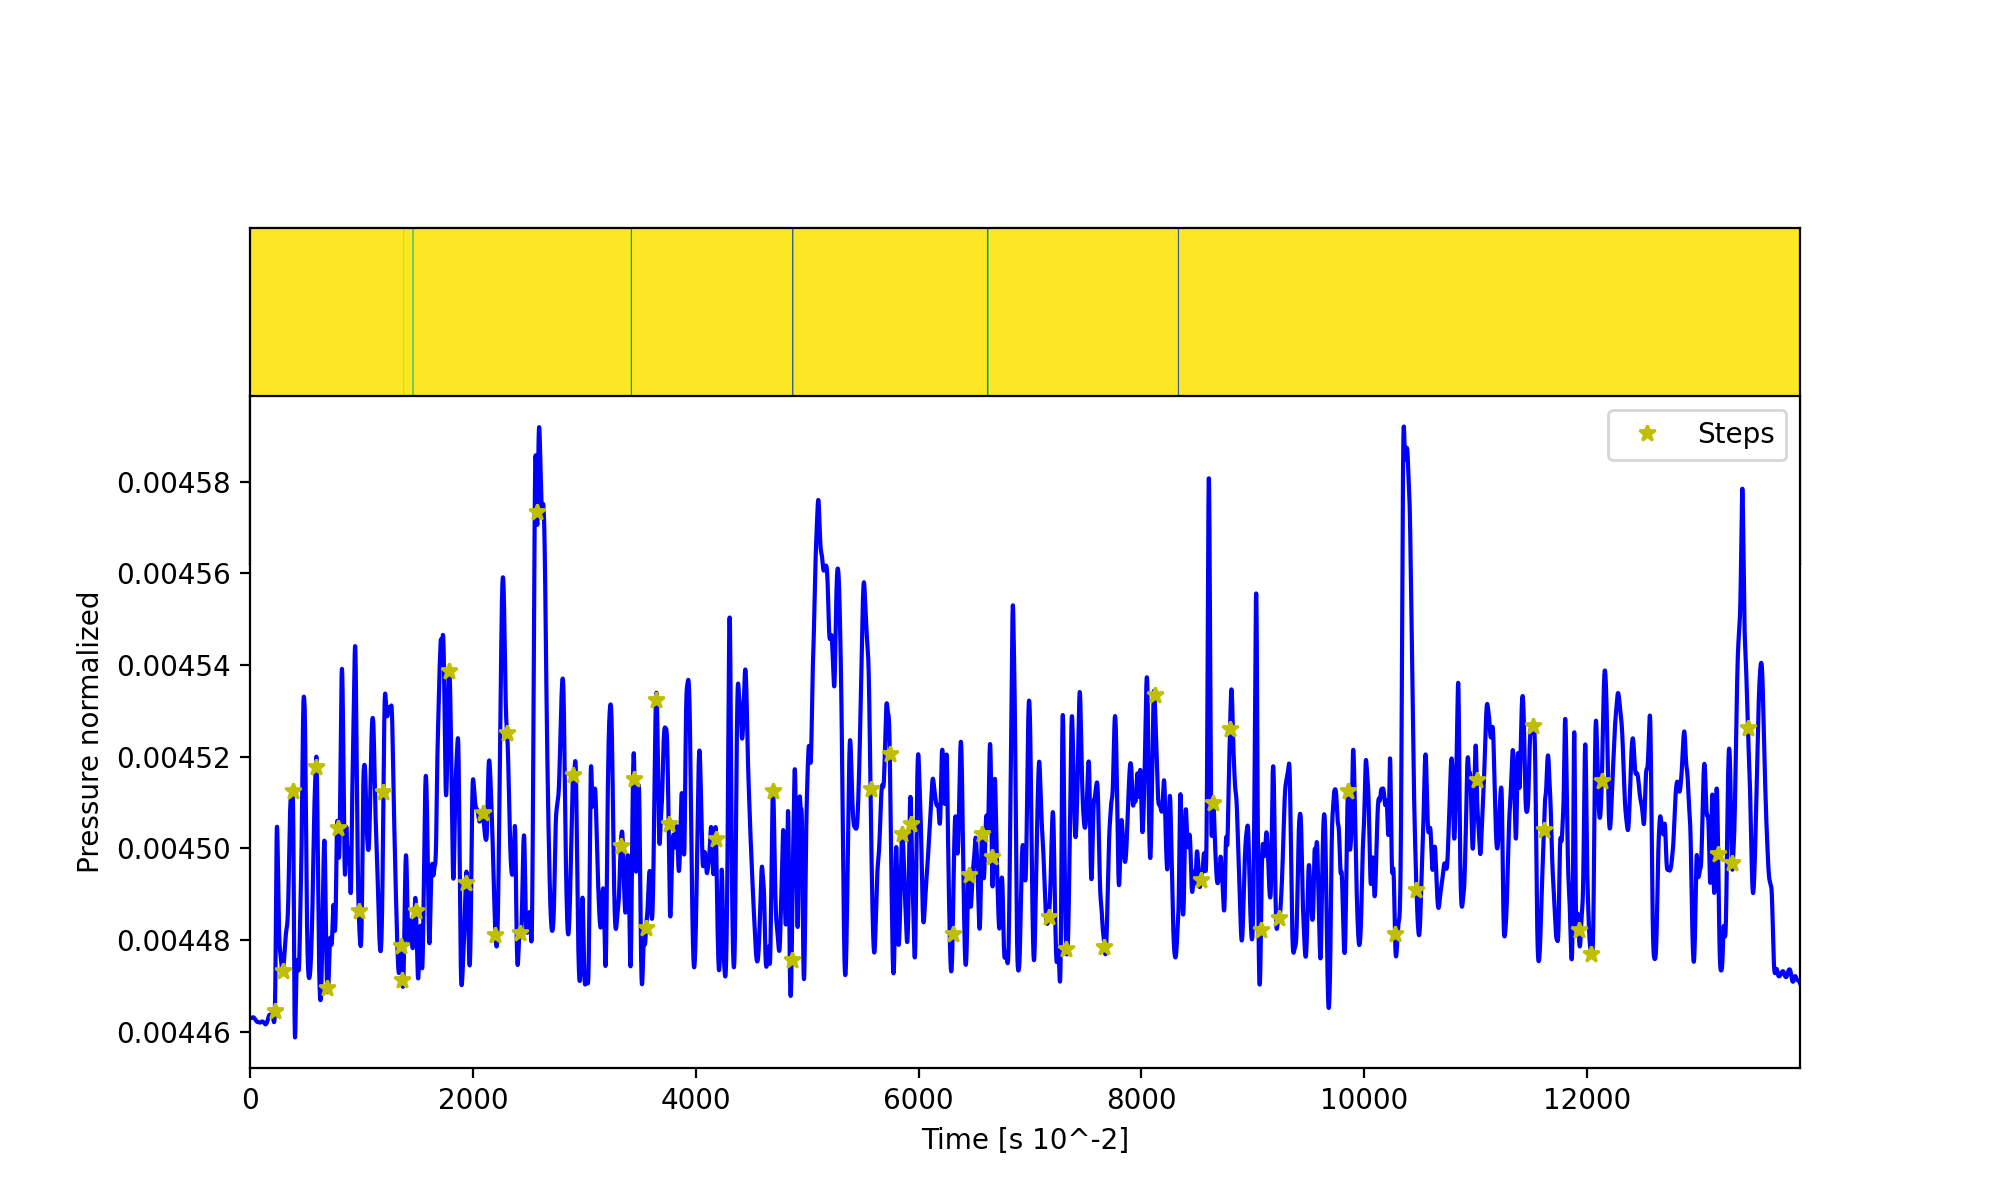

<IPython.core.display.Javascript object>


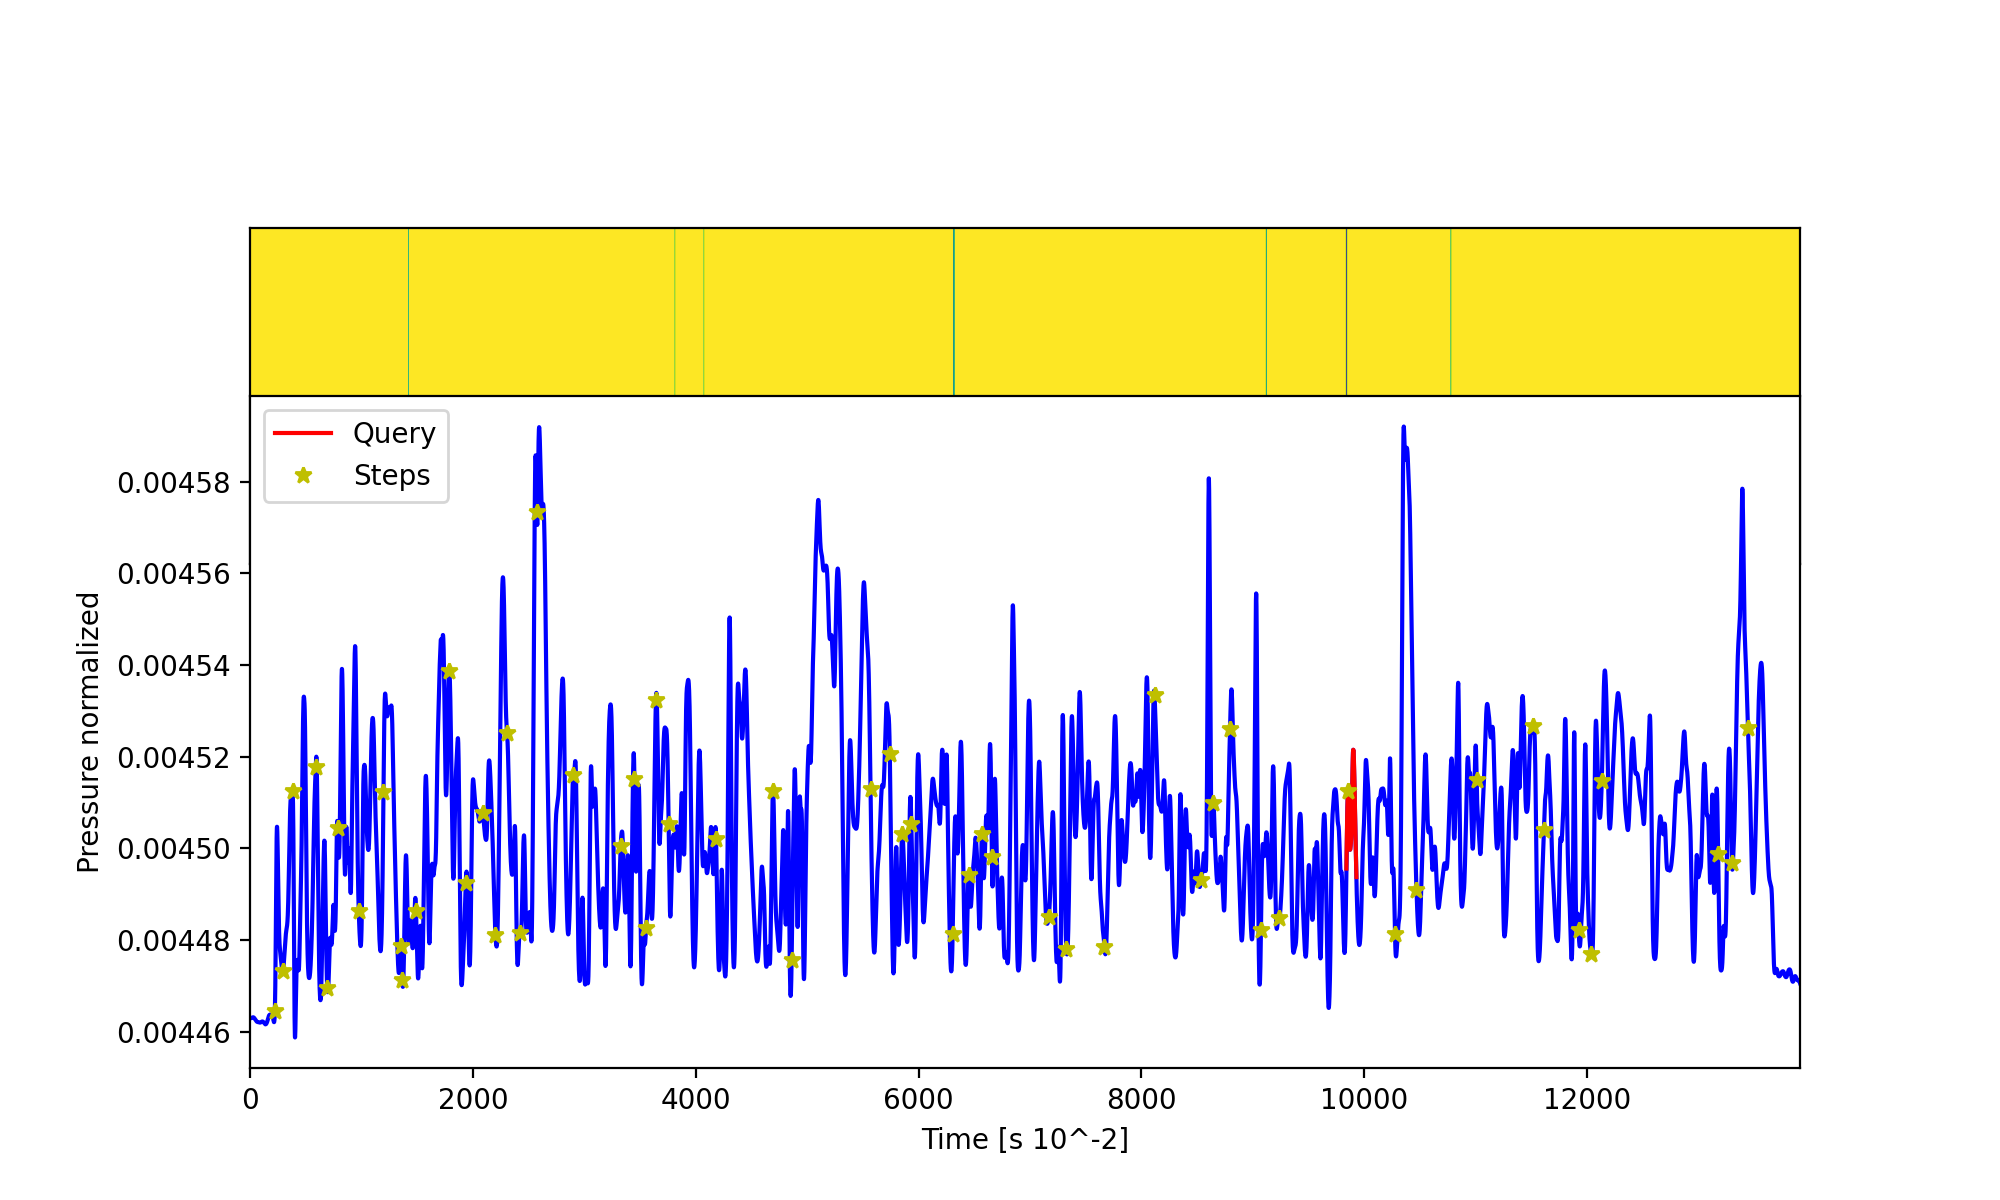

<IPython.core.display.Javascript object>


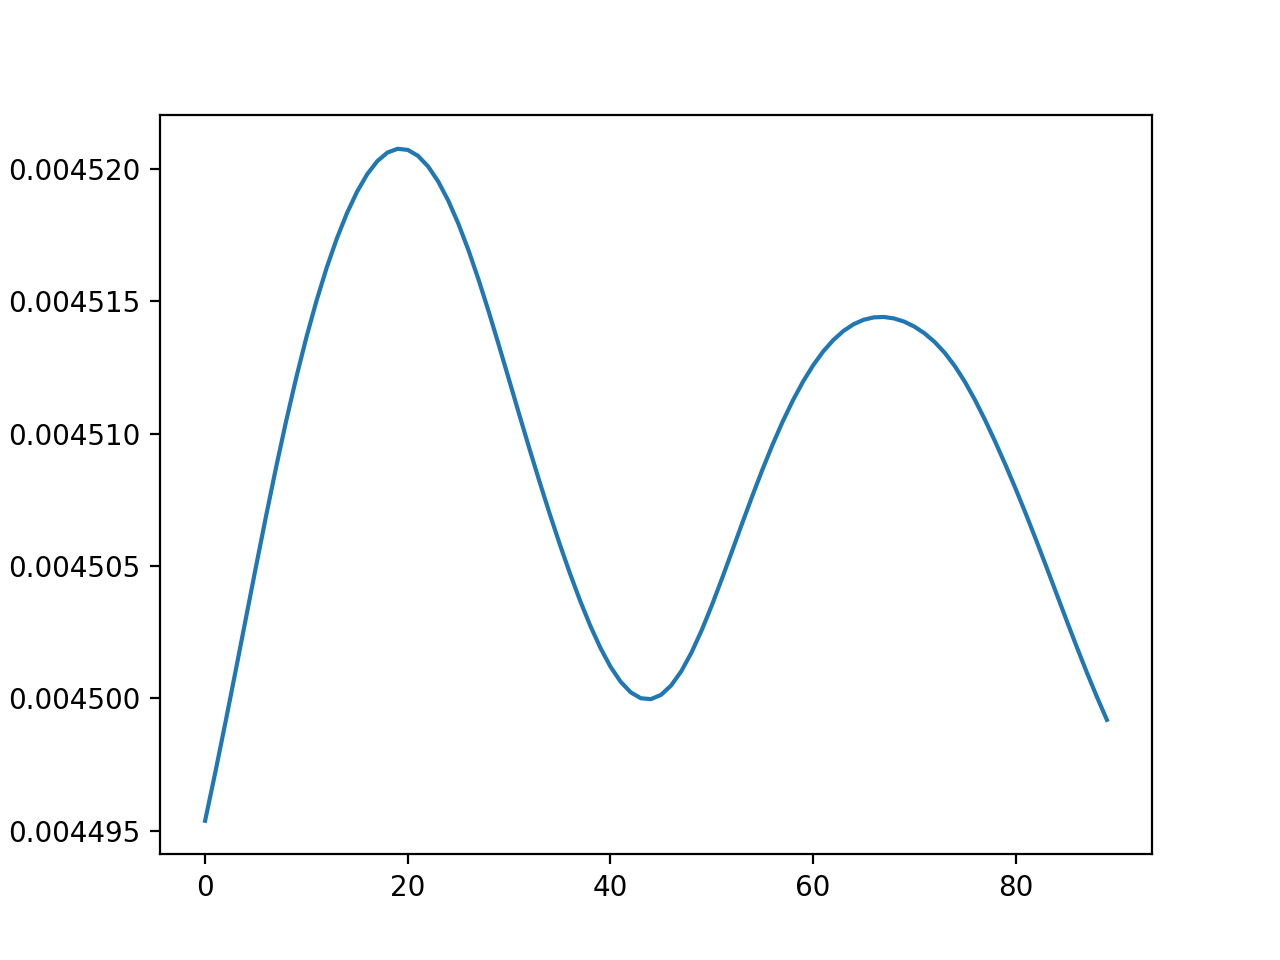

In [14]:

"""Create signals of length 90 with two tops"""
B56_start = 3300#query start
B56_stop = 3390#query_stop
query1 = A14B56['pressure'].values[B56_start:B56_stop]

B56_start = 3420#query start
B56_stop = 3510#query_stop
query2 = A14B56['pressure'].values[B56_start:B56_stop]

B56_start = 3630#query start
B56_stop = 3720#query_stop
query3 = A14B56['pressure'].values[B56_start:B56_stop]

B56_start = 4630#query start
B56_stop = 4720#query_stop
query4 = A14B56['pressure'].values[B56_start:B56_stop]

B56_start = 11855#query start
B56_stop = 11945#query_stop
query5 = A14B56['pressure'].values[B56_start:B56_stop]

B56_start = 9840#query start
B56_stop = 9930#query_stop
query6 = A14B56['pressure'].values[B56_start:B56_stop]



query_synth = (query2+query3+query6)/3

query = A14B56['pressure'].values[B56_start:B56_stop]
mp_A14_B56_2 = mp_query(A14B56,B56_start,B56_stop,query_synth,threshold = 6,features=steps_idx,data_viz = "on",show_query = "off")
mp_A14_B56_2 = mp_query(A14B56,B56_start,B56_stop,query6,threshold = 5.,features=steps_idx,data_viz = "on",show_query = "on")

fig,ax = plt.subplots()
ax.plot(query_synth)
plt.show()


<IPython.core.display.Javascript object>


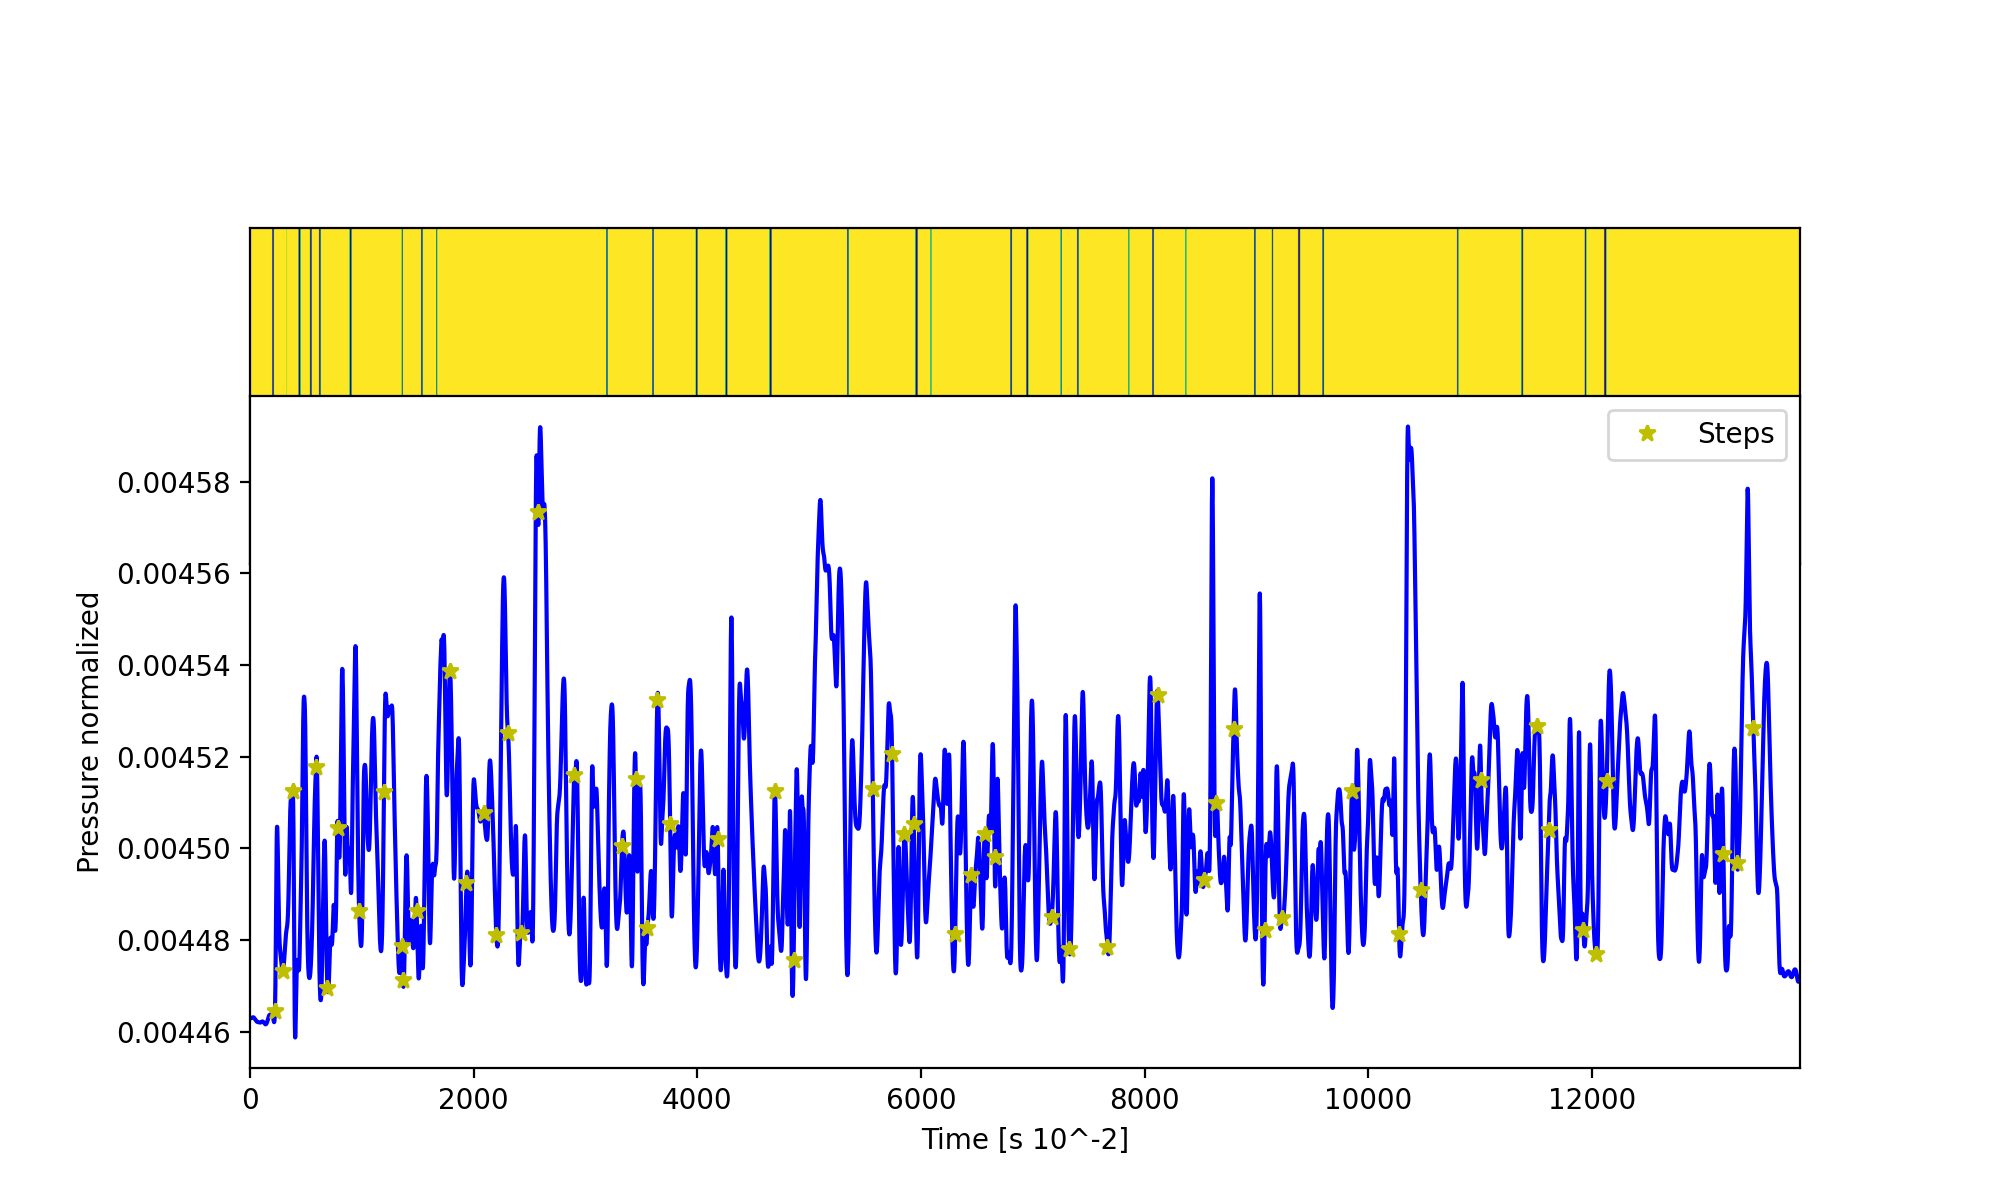

<IPython.core.display.Javascript object>


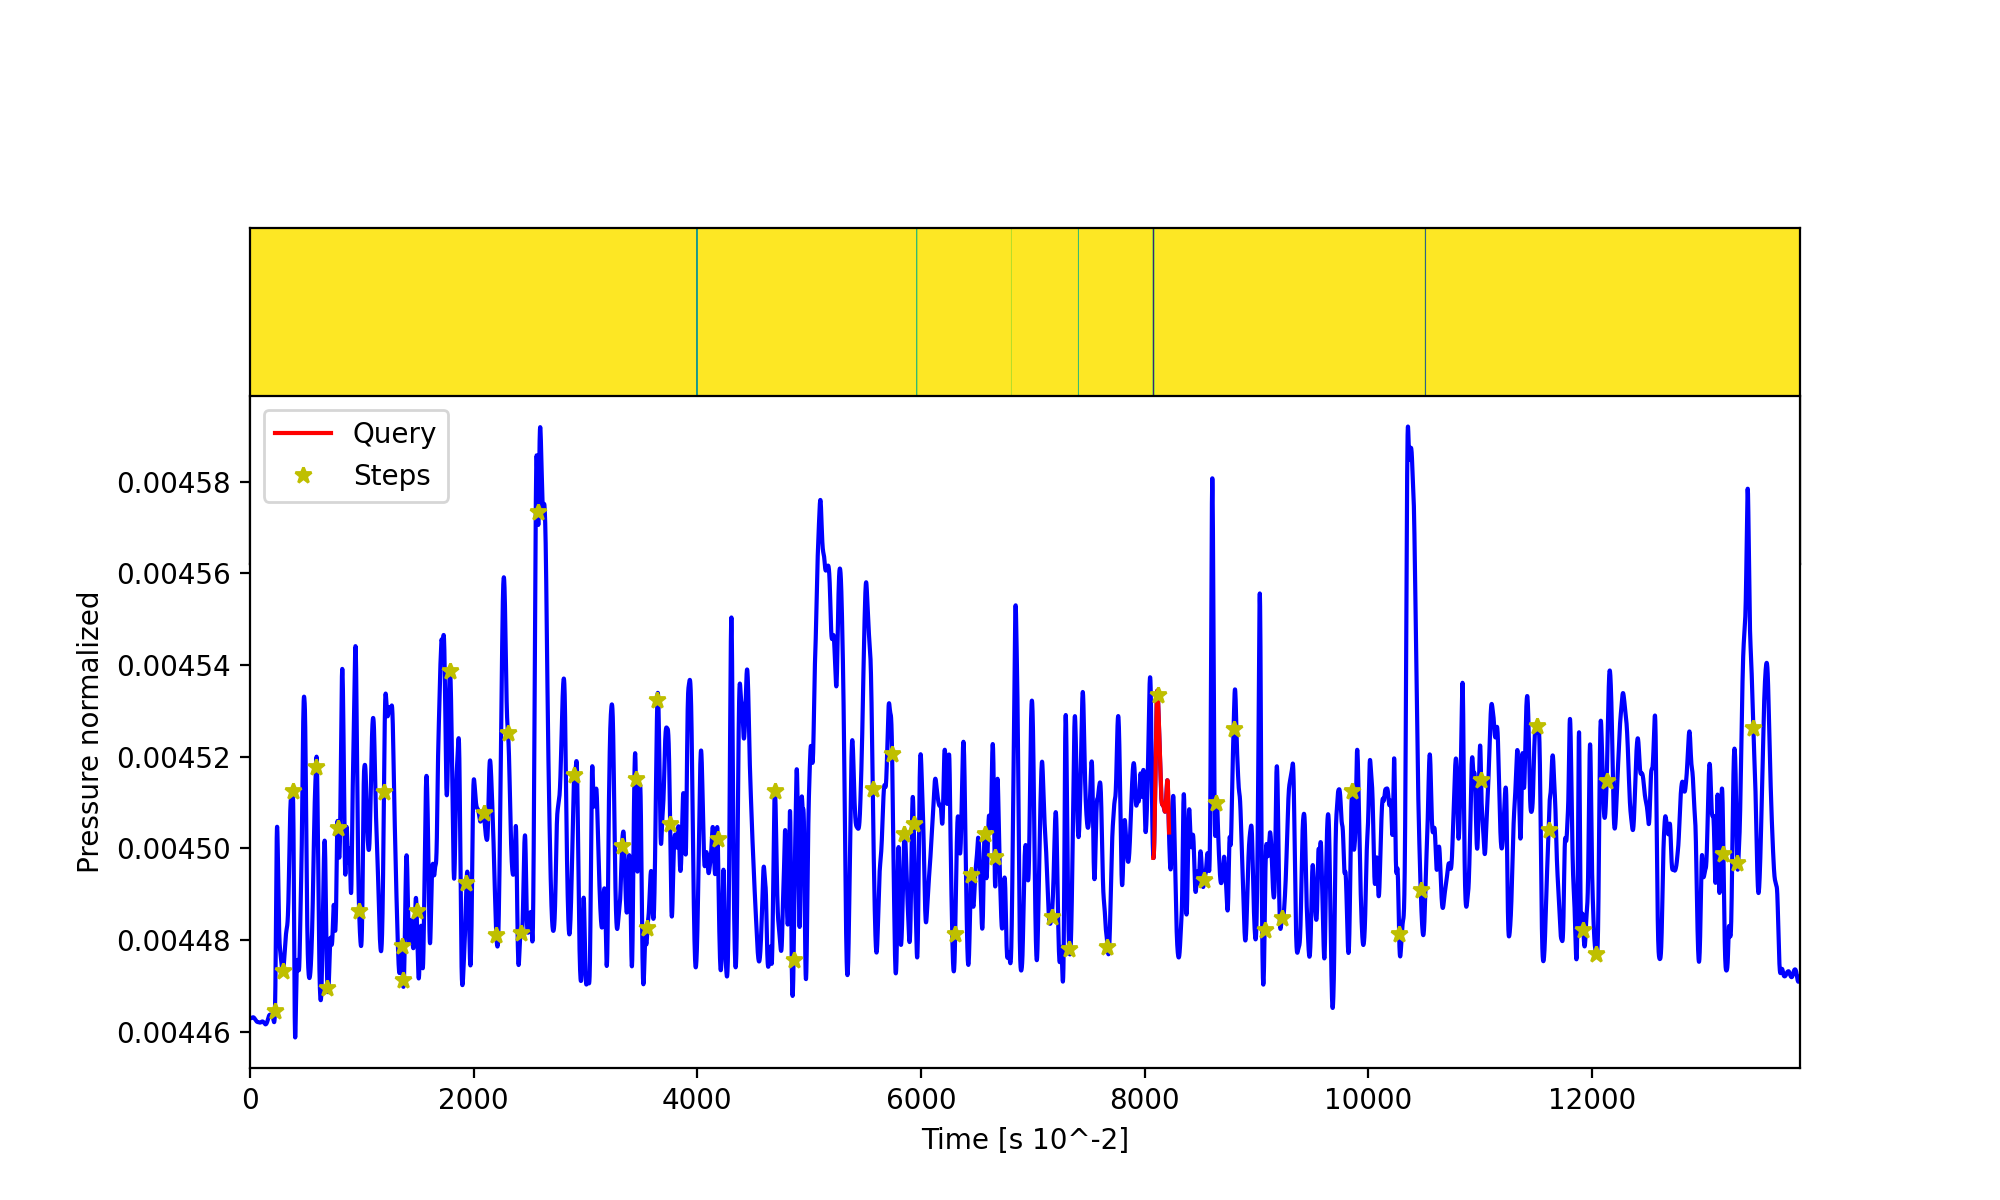

<IPython.core.display.Javascript object>


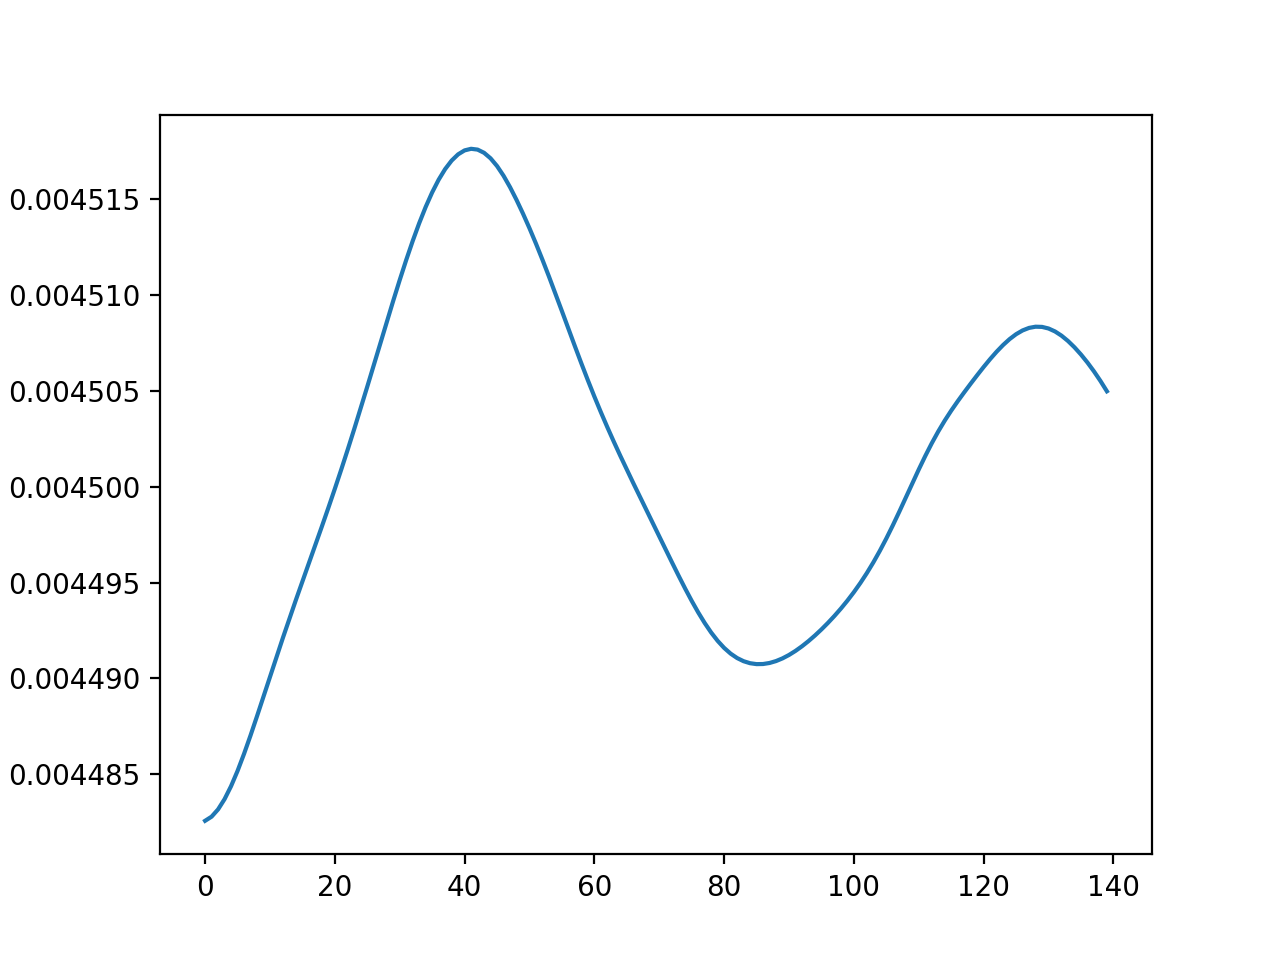

In [15]:
"""Create signal of length from trough-top-trough-top"""
B56_start = 530#query start
B56_stop = 670#query_stop
query1 = A14B56['pressure'].values[B56_start:B56_stop]

B56_start = 905#query start
B56_stop = 1045#query_stop
query2 = A14B56['pressure'].values[B56_start:B56_stop]

B56_start = 8080#query start
B56_stop = 8220#query_stop
query3 = A14B56['pressure'].values[B56_start:B56_stop]

B56_start = 1900#query start
B56_stop = B56_start+140#query_stop
query4 = A14B56['pressure'].values[B56_start:B56_stop]

B56_start = 3610#query start
B56_stop = B56_start+140#query_stop
query5 = A14B56['pressure'].values[B56_start:B56_stop]

B56_start = 8079#query start
B56_stop = B56_start+140#query_stop
query6 = A14B56['pressure'].values[B56_start:B56_stop]

query_synth = (query1+query2+query3+query4)/4

query = A14B56['pressure'].values[B56_start:B56_stop]
mp_A14_B56_2 = mp_query(A14B56,B56_start,B56_stop,query_synth,threshold = 8,features=steps_idx,data_viz = "on",show_query = "off")
mp_A14_B56_2 = mp_query(A14B56,B56_start,B56_stop,query6,threshold = 5.,features=steps_idx,data_viz = "on",show_query = "on")

fig,ax = plt.subplots()
ax.plot(query_synth)
plt.show()

# 3. query

<IPython.core.display.Javascript object>


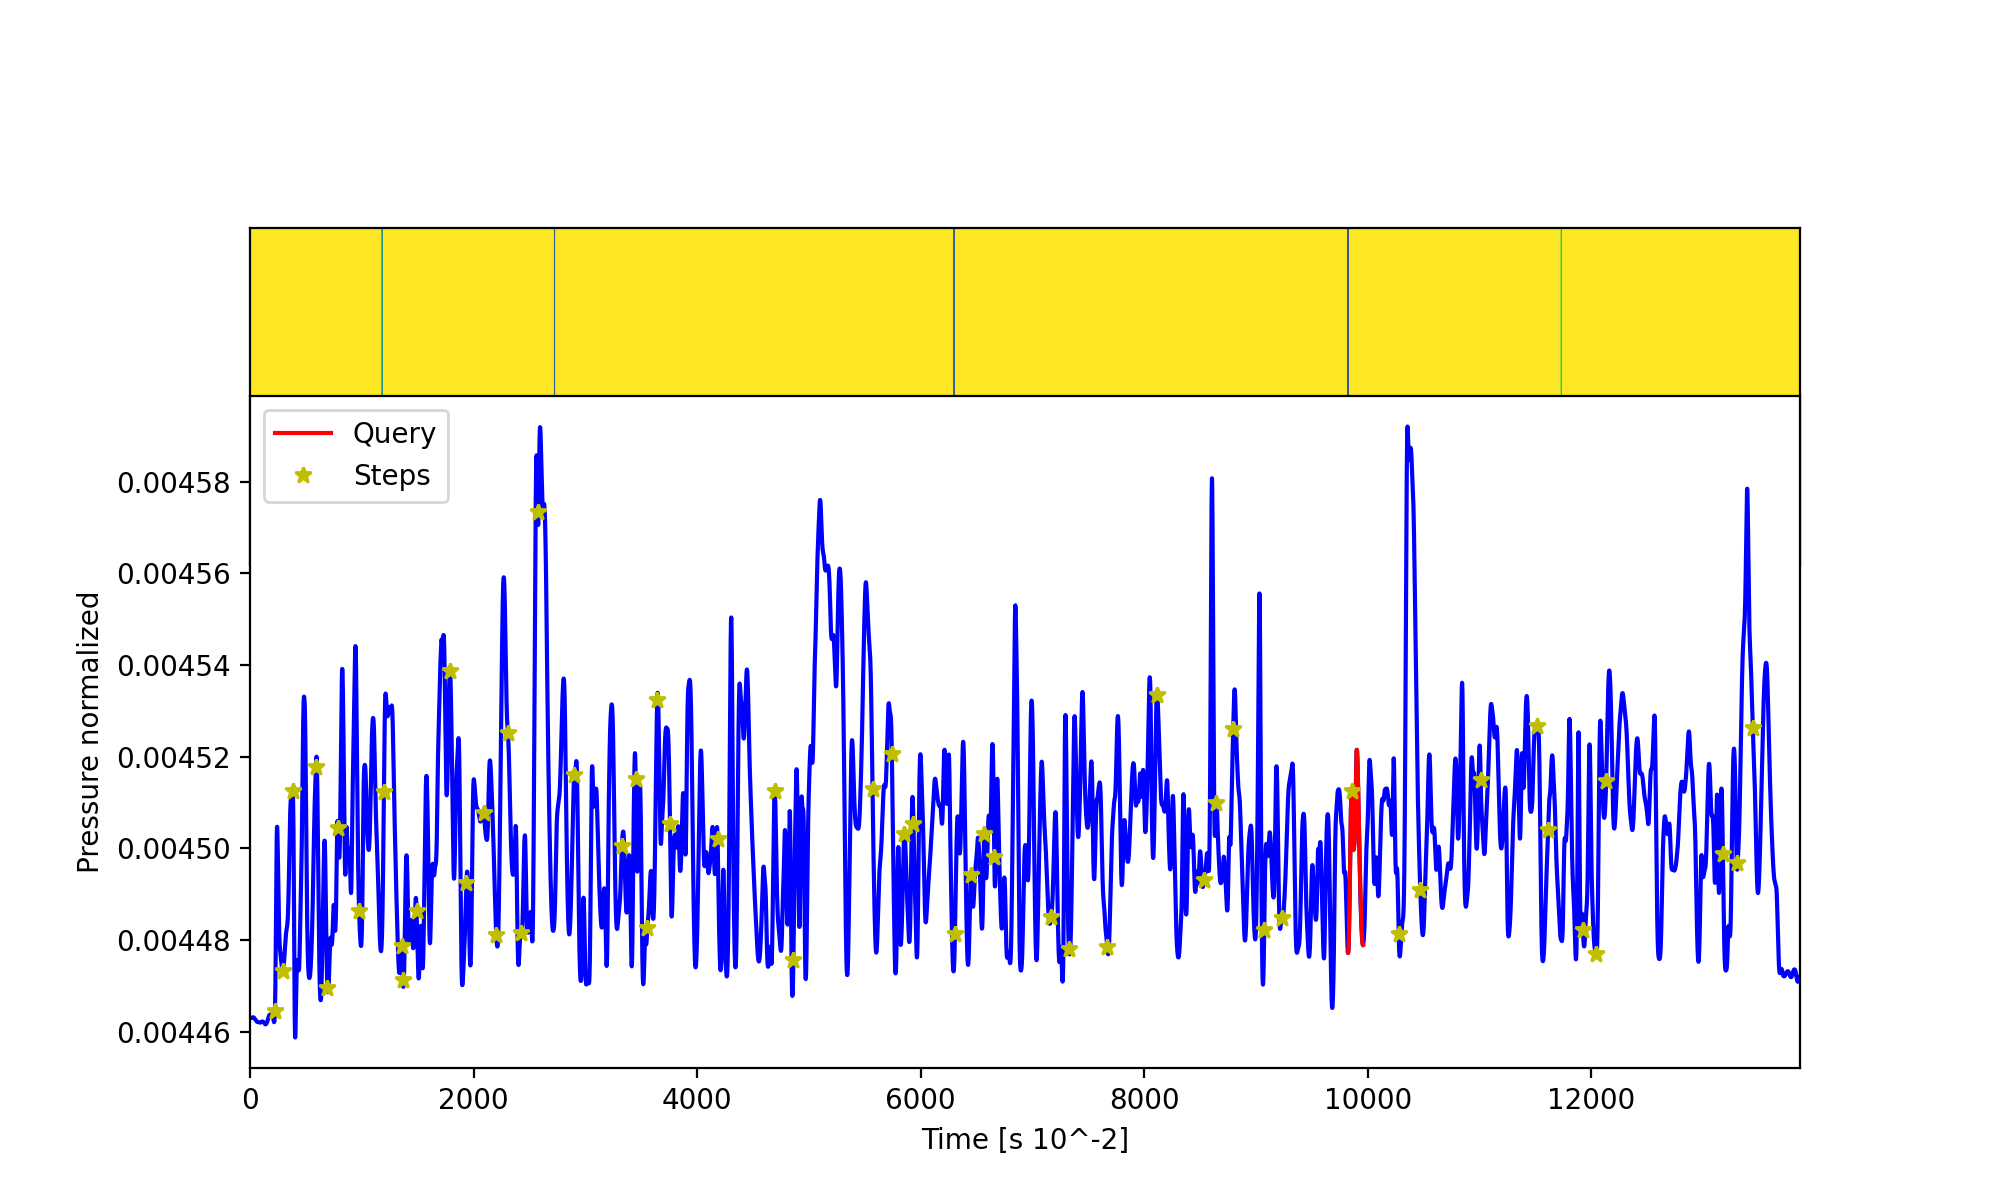

In [16]:
B56_start = 9822#query start
B56_stop = 9957#query_stop
query = A14B56['pressure'].values[B56_start:B56_stop]
mp_A14_B56 = mp_query(A14B56,B56_start,B56_stop,query,threshold = 5,features=steps_idx,data_viz = "on",show_query = "on")



In [17]:
"""This one is worth saving"""

#query = A14B56['pressure'].values[q_start:q_stop]
#query_profile_B56 = mp.compute(A14B56['pressure'].values, windows=(q_stop-q_start),query = query)

B56_start = 9823#query start
B56_stop = 9955#query_stop
#mp1 = mp_query(A14B56,B56_start,B56_stop,threshold = 4,features=A14_HF_idx,data_viz = "off")
mp1 = mp_query(A14B56,B56_start,B56_stop,threshold = None,features=A14_HF_idx,data_viz = "off")


B56_start = 3607#query start
B56_stop = 3772#query_stop
#mp2 = mp_query(A14B56,B56_start,B56_stop,threshold = 7,features=A14_HF_idx,data_viz = "off")
mp2 = mp_query(A14B56,B56_start,B56_stop,threshold = None,features=A14_HF_idx,data_viz = "off")



B56_start = 6191#query start
B56_stop = 6425#query_stop
#mp3 = mp_query(A14B56,B56_start,B56_stop,threshold = 10,features=A14_HF_idx,data_viz = "off")
mp3 = mp_query(A14B56,B56_start,B56_stop,threshold = None,features=A14_HF_idx,data_viz = "off")



B56_start = 9155#query start
B56_stop = 9300#query_stop
#mp4 = mp_query(A14B56,B56_start,B56_stop,threshold = 5,features=A14_HF_idx,data_viz = "off")
mp4 = mp_query(A14B56,B56_start,B56_stop,threshold = None,features=A14_HF_idx,data_viz = "off")


B56_start = 4852#query start
B56_stop = 4972#query_stop
mp5 = mp_query(A14B56,B56_start,B56_stop,threshold = None,features=A14_HF_idx,data_viz = "off")

B56_start = 2211#query start
B56_stop = 2400#query_stop
mp6 = mp_query(A14B56,B56_start,B56_stop,threshold = None,features=A14_HF_idx,data_viz = "off")

B56_start = 534#query start
B56_stop = 697#query_stop
mp7 = mp_query(A14B56,B56_start,B56_stop,threshold = None,features=A14_HF_idx,data_viz = "off")

B56_start = 13305#query start
B56_stop = 13490#query_stop
mp8 = mp_query(A14B56,B56_start,B56_stop,threshold = None,features=A14_HF_idx,data_viz = "off")
full_mp = (mp1[:13767]+mp2[:13767]+mp3[:13767]+mp4[:13767]+mp5[:13767]+mp6[:13767]+mp7[:13767]+mp7[:13767])/8

tl = 15.0

for i in range(len(full_mp)):
    if full_mp[i]>tl:
        full_mp[i] = 1000

plot_full_mp(A14B56,full_mp,features=A14_HF_idx)






TypeError: mp_query() missing 1 required positional argument: 'query'

# Query search acceleration data
In this section i will show the results obtained from the vertical acceleration of the drifters. The accelerometers onboard the drifters are rotated to an NED reference frame using pre calculated euler angles provided by the sensor. The Sensor creates the euler angles by referencing the acceleration to magnetometer readings. By integrating the acceleration we get the drifter velocities. The drifters accelerate as they move over steps so this should be visible in the velocity. The drifters movement in steps is primarily in the vertical direction. Rapid changes in the vertical velocity are charecteristic of steps and there are not many other channel features that produce this behaviour. Therfore, this might create a charecteristic signal in the vertical velocity that can be detected using a query search.   

In [18]:
#load acceleration data
rotated_path = "/Users/georgecowie/Documents/Master/Masteroppgave/data/2020/processed_drifter_data/rotated_data/"
acc_A14_B56 = pd.read_csv(rotated_path+"/A14_B56_rotated.csv",names = ["acc_z"],header = 0)

<IPython.core.display.Javascript object>


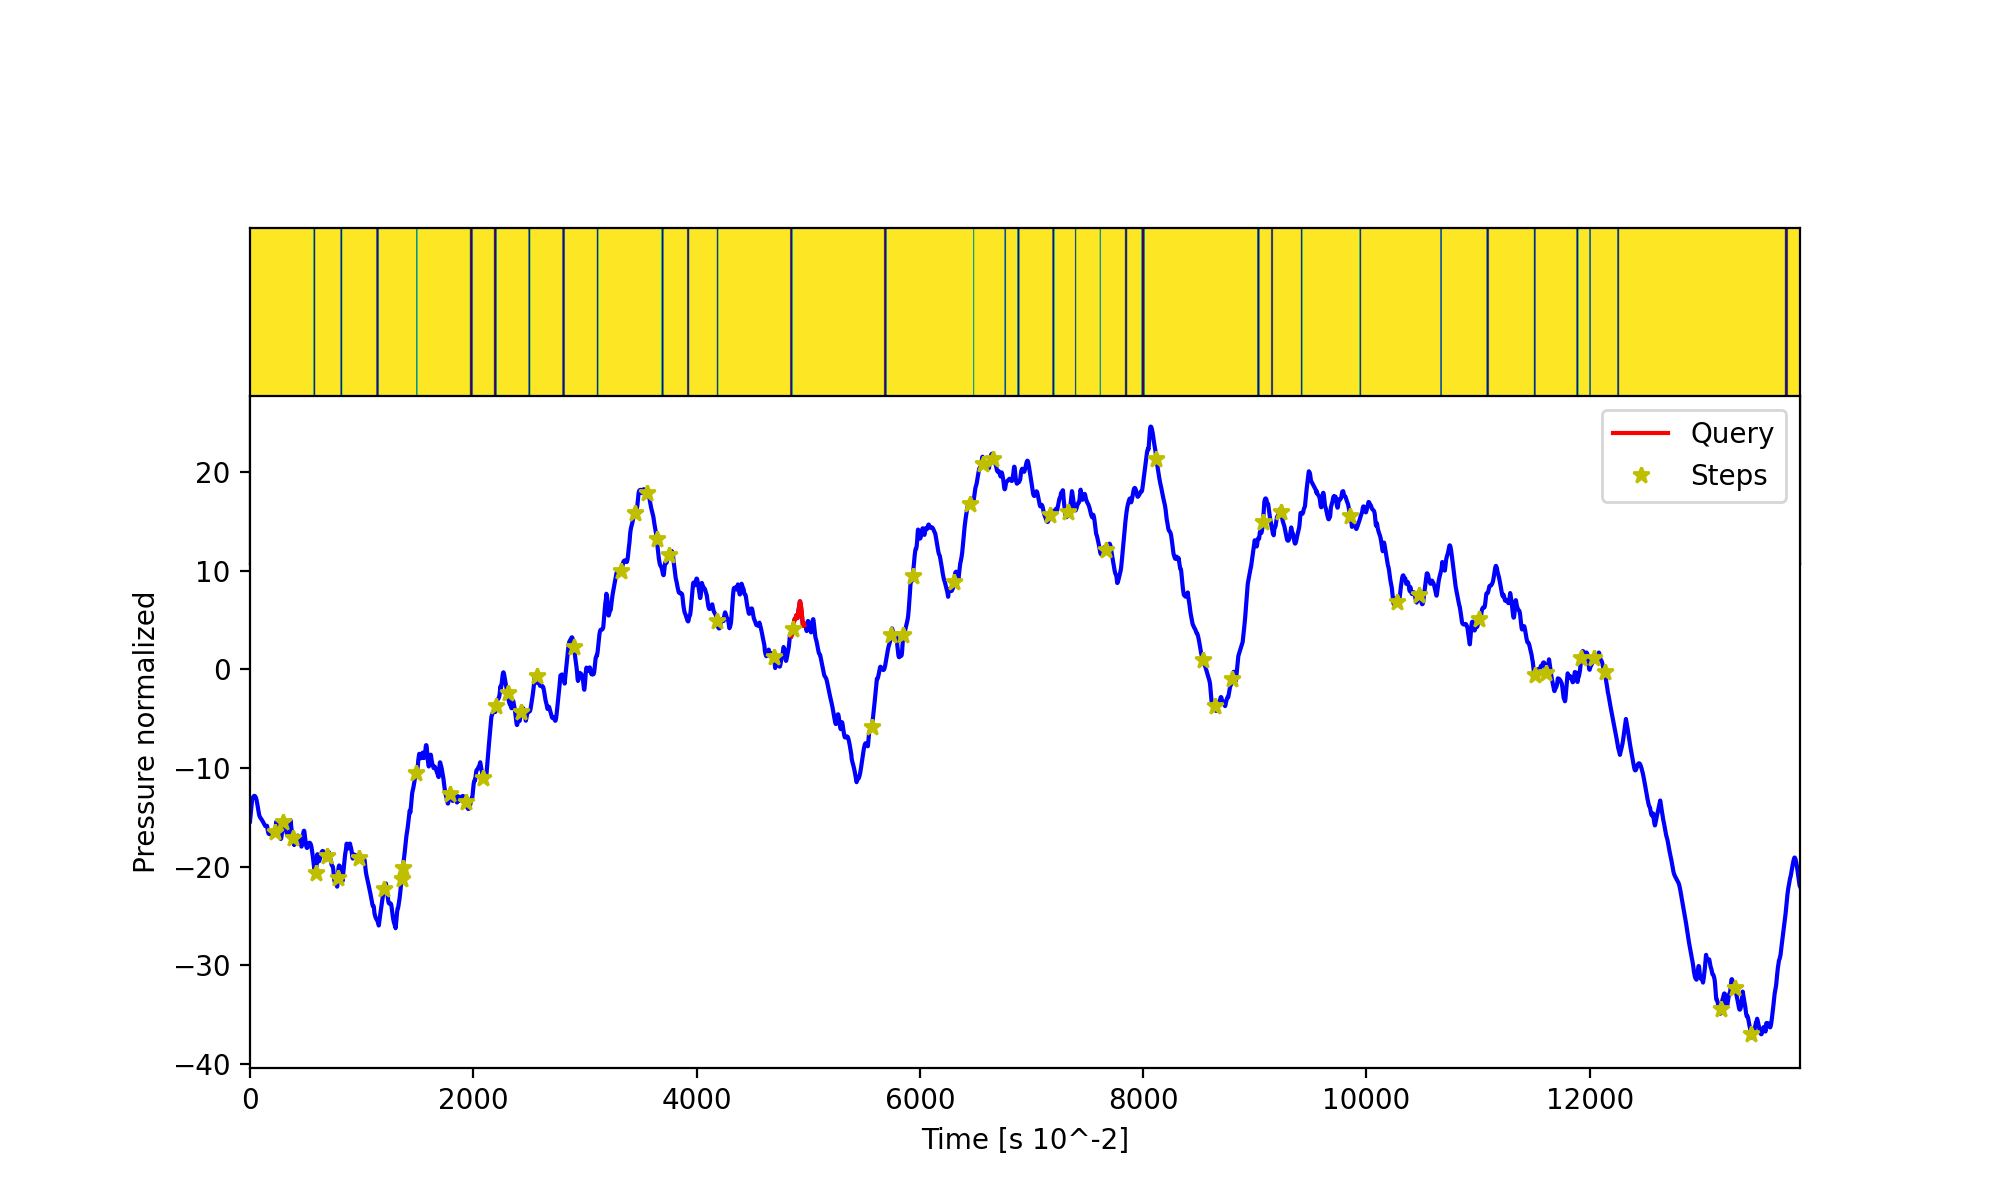

56


In [91]:

#28/48 steps
#B56_start = 2230#query start
#B56_stop = 2310#query_stop

#29/50
#B56_start = 10247#query start
#B56_stop = 10360#query_stop


#21/30 thershold 10
#B56_start = 10450#query start
#B56_stop = 10627#query_stop


#26/42 thershold 3.7
#B56_start = 13150#query start
#B56_stop = 13222#query_stop


#25/46 threshold 11
#B56_start = 618#query start
#B56_stop = 730#query_stop

#27/47 theshold 9
#B56_start = 277#query start
#B56_stop = 362#query_stop

#24/32 threshold 7
B56_start = 4848#query start
B56_stop = 4965#query_stop



query = acc_A14_B56['acc_z'].values[B56_start:B56_stop]
mp_A14_B56_1 = mp_query(acc_A14_B56,B56_start,B56_stop,query,threshold = 7,features=steps_idx,data_viz = "on",show_query = "on",var = "acc_z")
print(len(steps_idx))